Jump to [Part 1](#Step1)


# Objectives:

Buying a house is a stressful process. We want to use machine learning to provide additional information. In this notebook, we want to build a model to predict the prices of residential homes in Ames, Iowa. This model will provide buyers with a rough estimate of what the houses are actually worth.


## This notebook is divided into 4 sections:
* Data Description
* Exploratory Data Analyis or EDA (in short)
    * Load and understand the data using pandas
    * Variable identification
    * Univariate analysis
        * Target variable analysis
        * Deal with Missing values
        * Generating new features
        * Transforming Categorical Variables using Scikit-Learn
        * Check skewness or distribution of numeric variables
        * Getting dummy categorical features.
    * Multivariate analysis
        * Correlation matrix
        * Relation Exploration for Few Numerical Variables and categorical features
        * Dealing with Outliers
* Feature selection using Wrapper Methods
    * Forward selection
* Preditct house prices (linear regression and XGBOOSTER)
    * About Linear Regression
    * Linear Regression using Statsmodels
    * Interpreting the Regression Results
    * Making Predictions based on the Regression Results
    * Predict house price using sklearn linear regression and XGBRegressor
        * Splitting the dataset into training and testing
        * Build models (Linear Regression and XGBRegressor)


# Data Description
The files given are:

1. train.csv: This is the dataset that we are gonna use to train our model to give predictions. SalePrice is theproperty's sale price in dollars. This is the target variable that we are trying to predict.
2. test.csv: The test set will be used to see how well our model performs on unseen data. For the test set, we do not provide the Target variable i.e, SalePrice. It is our job to predict these outcomes. For each passenger in the house, we use the model that we trained to predict the price of the house.
3. data_description.txt: This gives us the full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here.
4. sample_submission.csv: a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms. This serves as an example of how our submission should look like.

You can find all the files in the "House Prices - Advanced Regression Techniques" Kaggle competition url: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

# Exploratory Data Analyis (EDA)

## Importing the Libraries

In [1]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats            # for some statistics
from scipy.stats import norm, skew # for some statistics
import seaborn as sns              # plot
import matplotlib.pyplot as plt    # plot
%matplotlib inline

## Load and understand the dataset using pandas

This is how we assign the datasets to variables in python using pandas.

In [2]:
# load train data
df_train = pd.read_csv("https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_1/main/assets/train.csv")
# display data
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
# Load Test data
df_test = pd.read_csv("https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_1/main/assets/test.csv")
# display test data
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

***Print the first five rows of the dataset***

In [4]:
# We will use the .head() function to display the first five columns of the dataset to get a feel of the dataset.
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

***Print last 5 rows of the dataset***

In [5]:
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

***Find out the total number of rows and columns of the data set***

In [6]:
df_train.shape

(1460, 81)

***Find out the columns, data types, and presence of null values or missing values in the data set***

In [7]:
#info gives us information about index and column data types.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

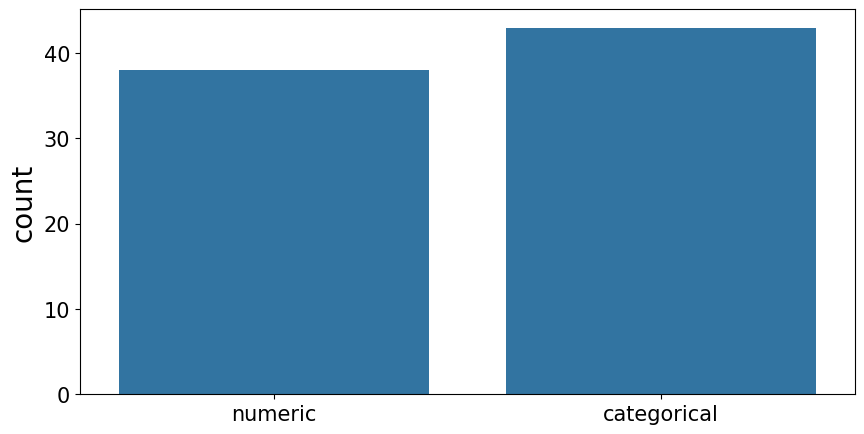

In [8]:
# Checking how many column have a categorical and numerical data type
column_data_type = []
for col in df_train.columns:
    data_type = df_train[col].dtype
    if df_train[col].dtype in ['int64','float64']:
        column_data_type.append('numeric')
    else:
        column_data_type.append('categorical')
plt.figure(figsize=(10,5))
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
sns.countplot(x=column_data_type)
plt.show()

In [9]:
print("{} numbers of columns have a numerical data type" .format(column_data_type.count('numeric')))
print("{} numbers of columns have a categorical data type" .format(column_data_type.count('categorical')))

38 numbers of columns have a numerical data type
43 numbers of columns have a categorical data type


## Variable identification

***The goal is to predict house prices, so the target variable (or dependent variable) is "SalePrice", where the rest of the columns might be considered as predictor variables (independent variables).***


### Deal with Missing values

In [10]:
# check the number of missing values in each column
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Let us look at the percentage of the missing values of the dataset.

In [11]:
# another way to present missing values in each column
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
missing_values
NAN_col = list(missing_values.to_dict().keys())
missing_values_data = pd.DataFrame(missing_values)
missing_values_data.reset_index(level=0, inplace=True)
missing_values_data.columns = ['Feature','Number of Missing Values']
missing_values_data['Percentage of Missing Values'] = (100.0*missing_values_data['Number of Missing Values'])/len(df_train)
missing_values_data

Feature  Number of Missing Values  Percentage of Missing Values
0         PoolQC                      1453                     99.520548
1    MiscFeature                      1406                     96.301370
2          Alley                      1369                     93.767123
3          Fence                      1179                     80.753425
4     MasVnrType                       872                     59.726027
5    FireplaceQu                       690                     47.260274
6    LotFrontage                       259                     17.739726
7     GarageType                        81                      5.547945
8    GarageYrBlt                        81                      5.547945
9   GarageFinish                        81                      5.547945
10    GarageQual                        81                      5.547945
11    GarageCond                        81                      5.547945
12  BsmtExposure                        38                      2.602740
13  BsmtFinType2                        38                      2.602740
14      BsmtQual                        37                      2.534247
15      BsmtCond                        37                      2.534247
16  BsmtFinType1                        37                      2.534247
17    MasVnrArea                         8                      0.547945
18    Electrical                         1                      0.068493

### impute the missing values onto the features

***1. We will impute the Nan or null values of 'PoolQC' with None because there are about 99.5% null values, which means that most houses don't have a Pool.***



In [12]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")

***2 We will impute the Nan or null values of 'MiscFeature' with None because there are about 96.3% null values, which means that most houses don't contain miscellaneous Features.***

In [13]:
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

***3.We will impute the Nan or null values of 'Alley' which refers to type of Alley access with None as null values signify that the house does not contain any Alley access.***

In [14]:
df_train["Alley"] = df_train["Alley"].fillna("None")

***4.We will impute the Nan or null values of 'Fence' with None as null values signify that the house does not contain any Fences.***

In [15]:
df_train["Fence"] = df_train["Fence"].fillna("None")

***5.We will impute the Nan or null values of 'FireplaceQu' with None as null values signify that the house does not contain any fireplace.***

In [16]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

***6.We will impute the Nan or null values of 'LotFrontage' with median values taking into consideration that the area of each street connected to the house property is most likely similar to other houses of the Neighborhood.***

In [17]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

***7.We replace the 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond' missing values into None signifying that those homes most likely don't have any garage for vehicles.***

In [18]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

***8.We replace the null values of 'GarageYrBlt', 'GarageArea', 'GarageCars' as no garage equals no cars.***

In [19]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

***9. The missing values of 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' are filled with zero because the null values most likely signifies no basement.***

In [20]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

***10.The missing values'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2 are filled with Nonne as NaN values signifies no basement.***

In [21]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

***11.The NA values of "MasVnrType" and "MasVnrArea" refer to no masonry veneer for these houses. Therefore the Area can be imputed with zero and the type can be imputed with None.***

In [22]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

***12. The 'MSZoning' refers to the general zoning classification. We fill the NaN values with 'RL' which is the most occurring value.***

In [23]:
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

***13.Most of the values of this feature are "AllPub" except for one "NoSeWa" and 2 NA. Since the house with "NoSewa' is present in the training set, this feature is not helpful in predictive modeling so we drop it.***

In [24]:
df_train = df_train.drop(['Utilities'], axis=1)

***14.The NA values means typical which is mentioned in the data description.***

In [25]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

***15.There is only one NA value present here in "Electrical" so we impute it 'SBrkr' since it is the most occurring value.***

In [26]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

***16.There is only one NA value present here in "KitchenQual" so we impute it 'TA' since it is the most occurring value.***

In [27]:
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

***17.There is only one NA value present in both Exterior1st and Exterior2nd so we fill it with the most frequent string.***

In [28]:
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

***18.Fill it again with the most frequent which is "WD" in this case.***

In [29]:
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

***19.The NA values here refers to No Building class so we fill it with None.***

In [30]:
df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")

In [31]:
# Checking the maximum of null variable it have
df_train.isnull().sum().max()

0

The result 0 above shows we no longer have any missing values.

### Generating new features

We can generate some new features from existing ones.

***1. the total square feet of the house can be computed as: Total_Square_Feet = BsmtFinSF1 + BsmtFinSF2 + 1stFlrSF + 2ndFlrSF + TotalBsmtSF***

In [32]:
df_train['Total_Square_Feet'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] + df_train['1stFlrSF'] +
                                                                 df_train['2ndFlrSF'] + df_train['TotalBsmtSF'])

***2.Total number of Baths in the house can be computed as: Total_Bath = FullBath + 0.5 * HalfBath + BsmtFullBath + 0.5*BsmtHalfBath***

In [33]:
df_train['Total_Bath'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) + df_train['BsmtFullBath'] +
                                                                  (0.5 * df_train['BsmtHalfBath']))

***3.Total_Porch_Area can be computed as: Total_Porch_Area = OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF***

In [34]:
df_train['Total_Porch_Area'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                                df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF'])

***4.the size of per room in the house can be computed as: SqFtPerRoom =  GrLivArea/(TotRmsAbvGrd + FullBath + HalfBath + KitchenAbvGr***

In [35]:
df_train['SqFtPerRoom'] = df_train['GrLivArea'] / (df_train['TotRmsAbvGrd'] + df_train['FullBath'] +
                                                       df_train['HalfBath'] + df_train['KitchenAbvGr'])

### Transforming Categorical Variables using Scikit-Learn



In [36]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df_train[c].values))
    df_train[c] = lbl.transform(list(df_train[c].values))

# shape
print('Shape all_data: {}'.format(df_train.shape))

Shape all_data: (1460, 84)


In [38]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1           9       RL         65.0     8450       1      1   
1        2           4       RL         80.0     9600       1      1   
2        3           9       RL         68.0    11250       1      1   
3        4          10       RL         60.0     9550       1      1   
4        5           9       RL         84.0    14260       1      1   
...    ...         ...      ...          ...      ...     ...    ...   
1455  1456           9       RL         62.0     7917       1      1   
1456  1457           4       RL         85.0    13175       1      1   
1457  1458          10       RL         66.0     9042       1      1   
1458  1459           4       RL         68.0     9717       1      1   
1459  1460           4       RL         75.0     9937       1      1   

      LotShape LandContour LotConfig  ...  MiscVal MoSold YrSold SaleType  \
0            3         Lvl    Inside  ...        0      4      2       WD   
1            3         Lvl       FR2  ...        0      7      1       WD   
2            0         Lvl    Inside  ...        0     11      2       WD   
3            0         Lvl    Corner  ...        0      4      0       WD   
4            0         Lvl       FR2  ...        0      3      2       WD   
...        ...         ...       ...  ...      ...    ...    ...      ...   
1455         3         Lvl    Inside  ...        0     10      1       WD   
1456         3         Lvl    Inside  ...        0      4      4       WD   
1457         3         Lvl    Inside  ...     2500      7      4       WD   
1458         3         Lvl    Inside  ...        0      6      4       WD   
1459         3         Lvl    Inside  ...        0      8      2       WD   

     SaleCondition SalePrice  Total_Square_Feet  Total_Bath  Total_Porch_Area  \
0           Normal    208500               3272         3.5                61   
1           Normal    181500               3502         2.5               298   
2           Normal    223500               3192         3.5                42   
3          Abnorml    140000               2689         2.0               307   
4           Normal    250000               3998         3.5               276   
...            ...       ...                ...         ...               ...   
1455        Normal    175000               2600         2.5                40   
1456        Normal    210000               4568         3.0               349   
1457        Normal    266500               3767         2.0                60   
1458        Normal    142125               3234         2.0               478   
1459        Normal    147500               3632         2.5               804   

      SqFtPerRoom  
0      142.500000  
1      140.222222  
2      178.600000  
3      190.777778  
4      169.076923  
...           ...  
1455   149.727273  
1456   207.300000  
1457   195.000000  
1458   154.000000  
1459   139.555556  

[1460 rows x 84 columns]

### Check skewness or distribution of numeric variables

In [39]:
# find all the columsn of numeric variables
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

In [40]:
numeric_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice', 'Total_Square_Feet', 'Total_Bath',
       'Total_Porch_Area', 'SqFtPerRoom'],
      dtype='object')

In [41]:
# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
MiscVal       24.451640
PoolArea      14.813135
LotArea       12.195142
3SsnPorch     10.293752
LowQualFinSF   9.002080
LandSlope      4.808735
KitchenAbvGr   4.483784
BsmtFinSF2     4.250888
ScreenPorch    4.117977
BsmtHalfBath   4.099186

***We find the skewed features and then perform Box Cox Transformation of highly skewed features.***

In [42]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)


There are 64 skewed numerical features to Box Cox transform


### Getting dummy categorical features

In [43]:
#Getting dummy categorical features.
df_train = pd.get_dummies(df_train)
print(df_train.shape)

(1460, 226)


In [44]:
df_train.head()

Id  MSSubClass  LotFrontage    LotArea    Street     Alley  LotShape  \
0  0.730463    2.750250     5.831328  19.212182  0.730463  0.730463  1.540963   
1  1.194318    1.820334     6.221214  19.712205  0.730463  0.730463  1.540963   
2  1.540963    2.750250     5.914940  20.347241  0.730463  0.730463  0.000000   
3  1.820334    2.885846     5.684507  19.691553  0.730463  0.730463  0.000000   
4  2.055642    2.750250     6.314735  21.325160  0.730463  0.730463  0.000000   

   LandSlope  OverallQual  OverallCond  ...  SaleType_ConLw  SaleType_New  \
0        0.0     2.440268     1.820334  ...           False         False   
1        0.0     2.259674     2.440268  ...           False         False   
2        0.0     2.440268     1.820334  ...           False         False   
3        0.0     2.440268     1.820334  ...           False         False   
4        0.0     2.602594     1.820334  ...           False         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0         False         True                  False                  False   
1         False         True                  False                  False   
2         False         True                  False                  False   
3         False         True                   True                  False   
4         False         True                  False                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                  True   

   SaleCondition_Partial  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 226 columns]

## Univariate Analysis

***Target Variable Analysis***

***Check the distribution of the target variable***

/tmp/ipython-input-45-1837863280.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'] , fit=norm);



 mu = 33.88 and sigma = 2.44



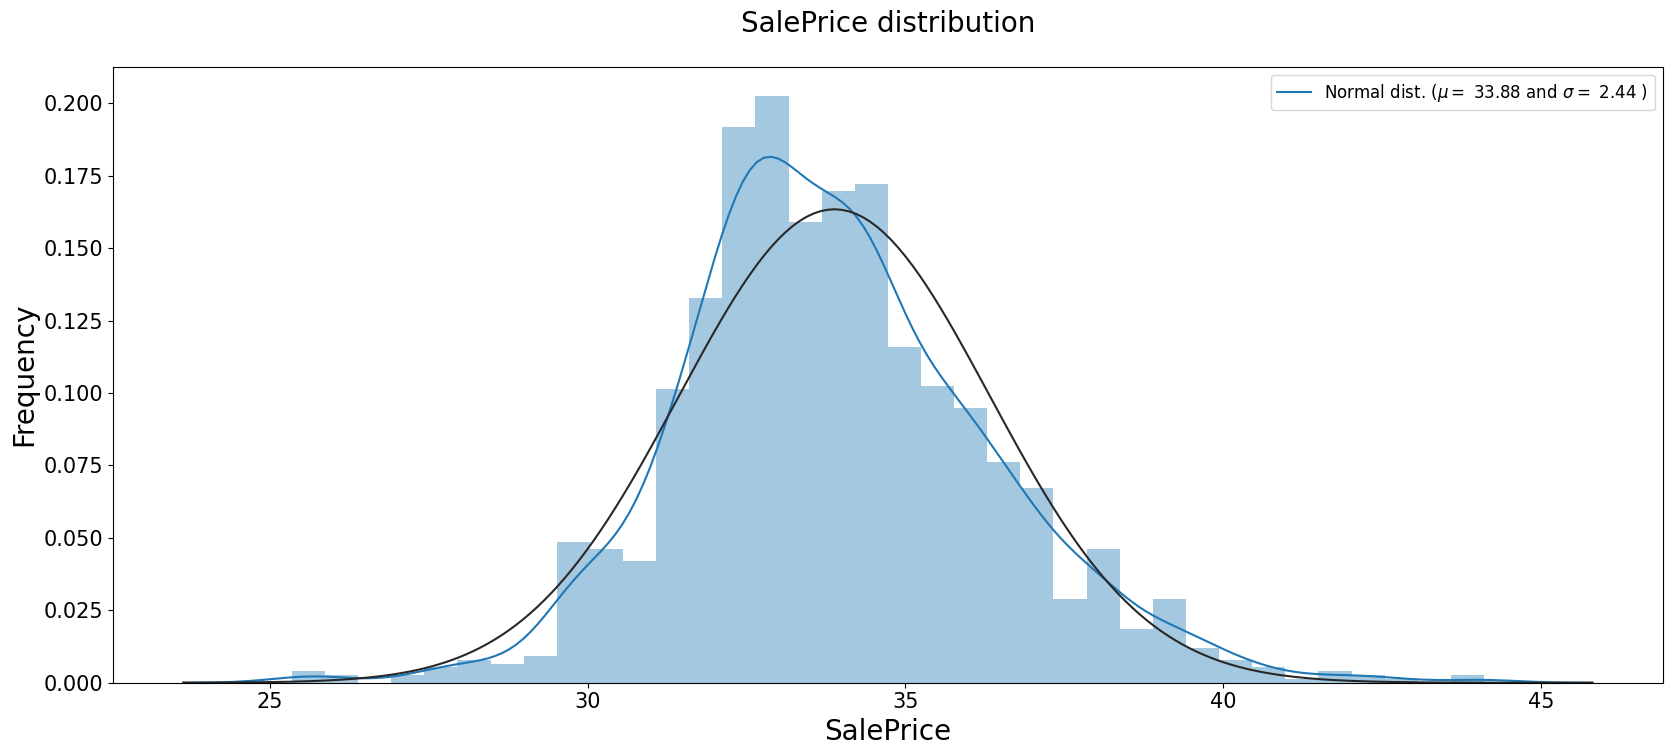

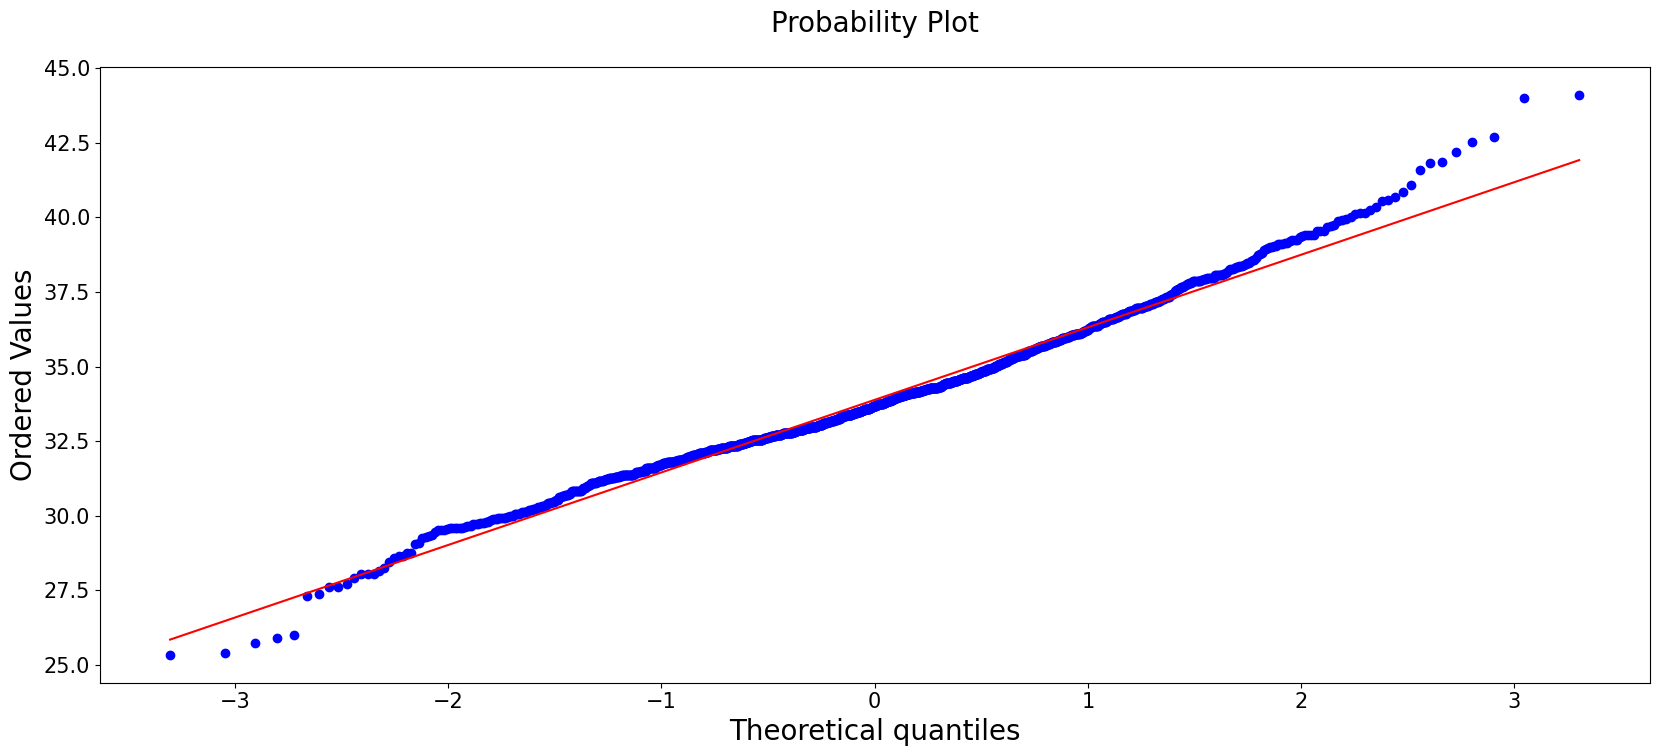

In [45]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. For purposes of this assignment, we will transform our target variable to a  normal distribution.
***Log-transformation of the target variable***

/tmp/ipython-input-46-1373379073.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'] , fit=norm);



 mu = 3.55 and sigma = 0.07



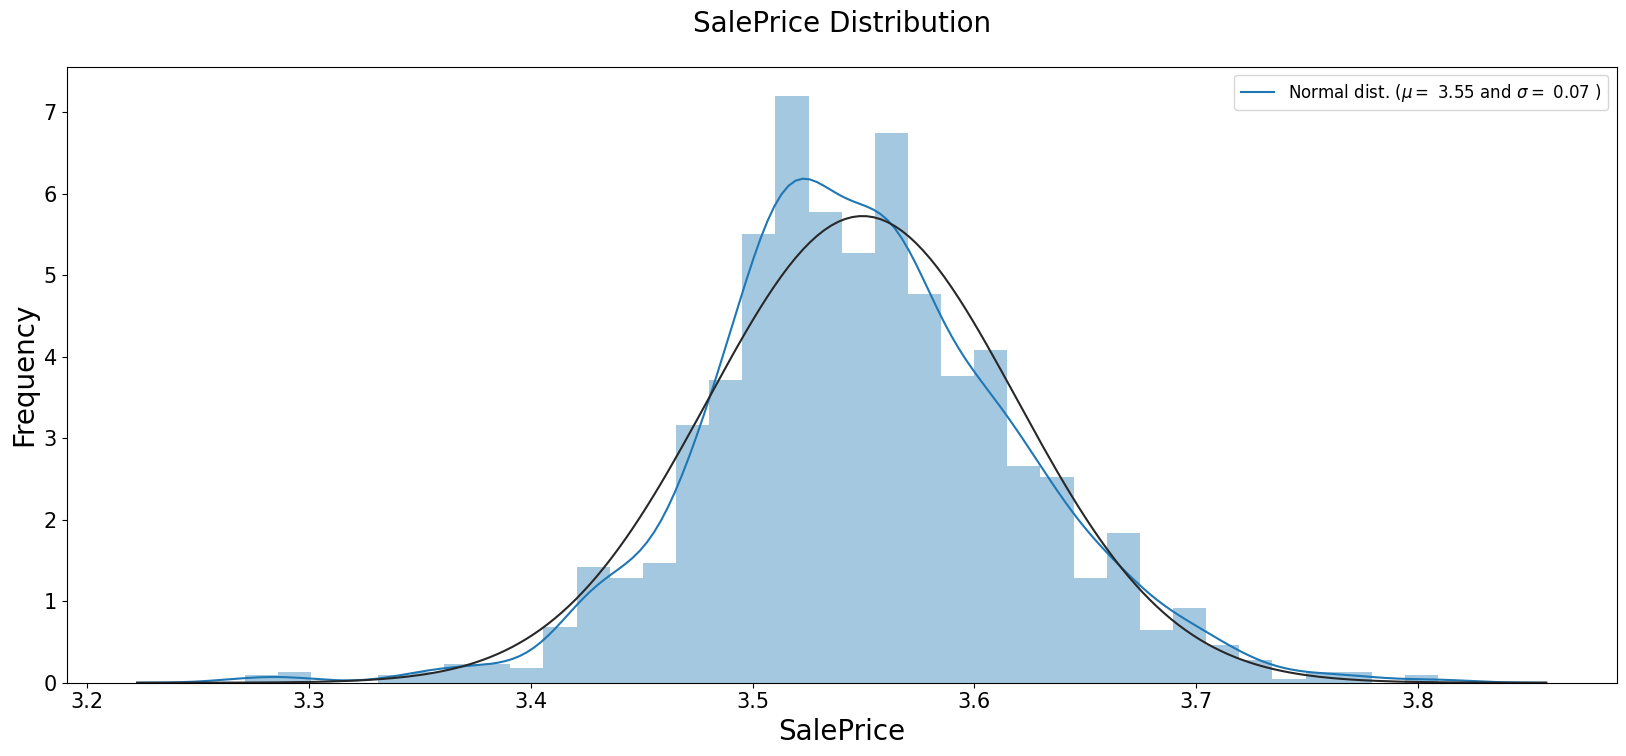

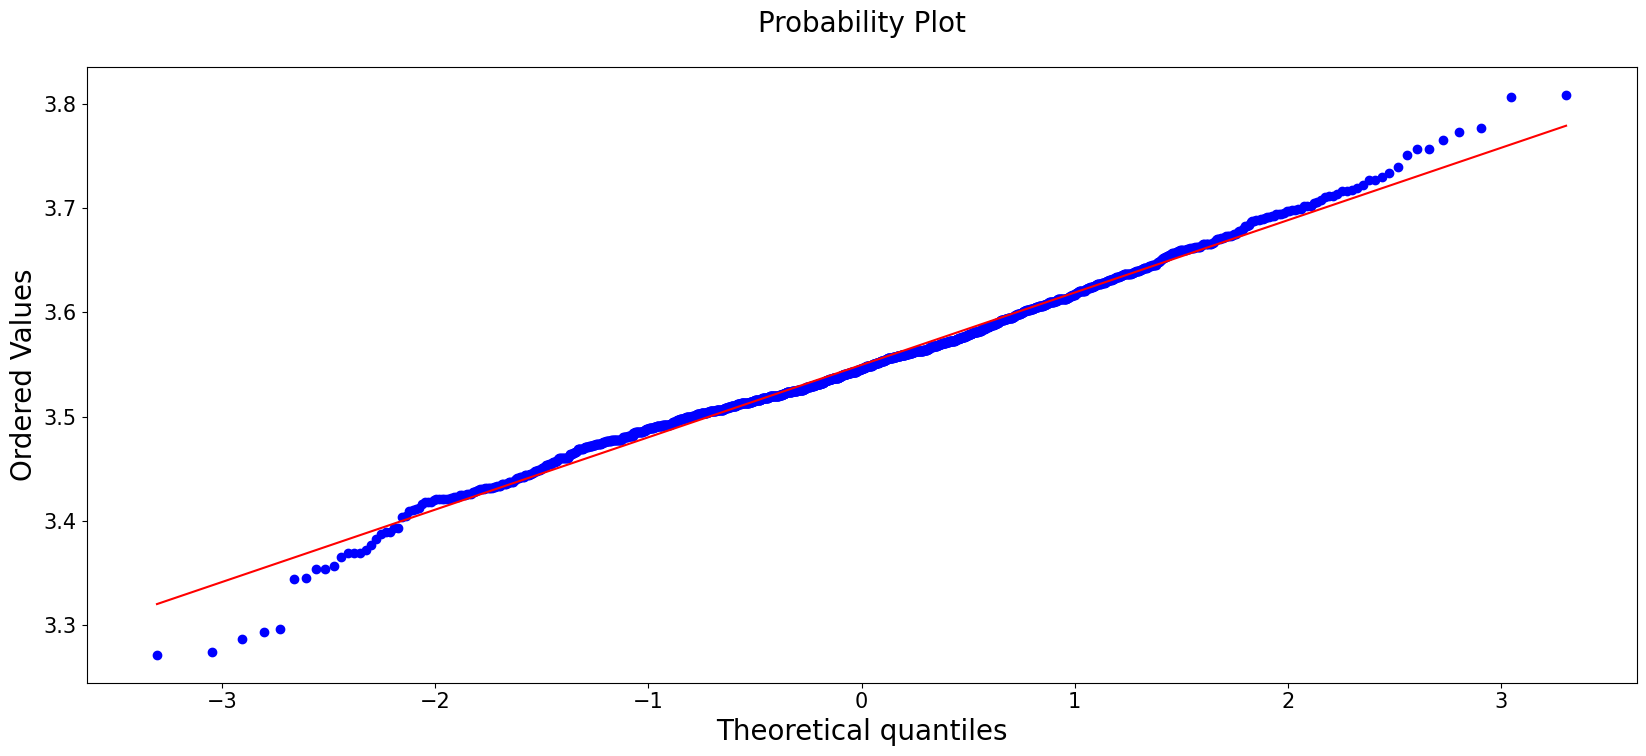

In [46]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.

# Multivariate Analysis

### Correlation matrix

<Axes: >

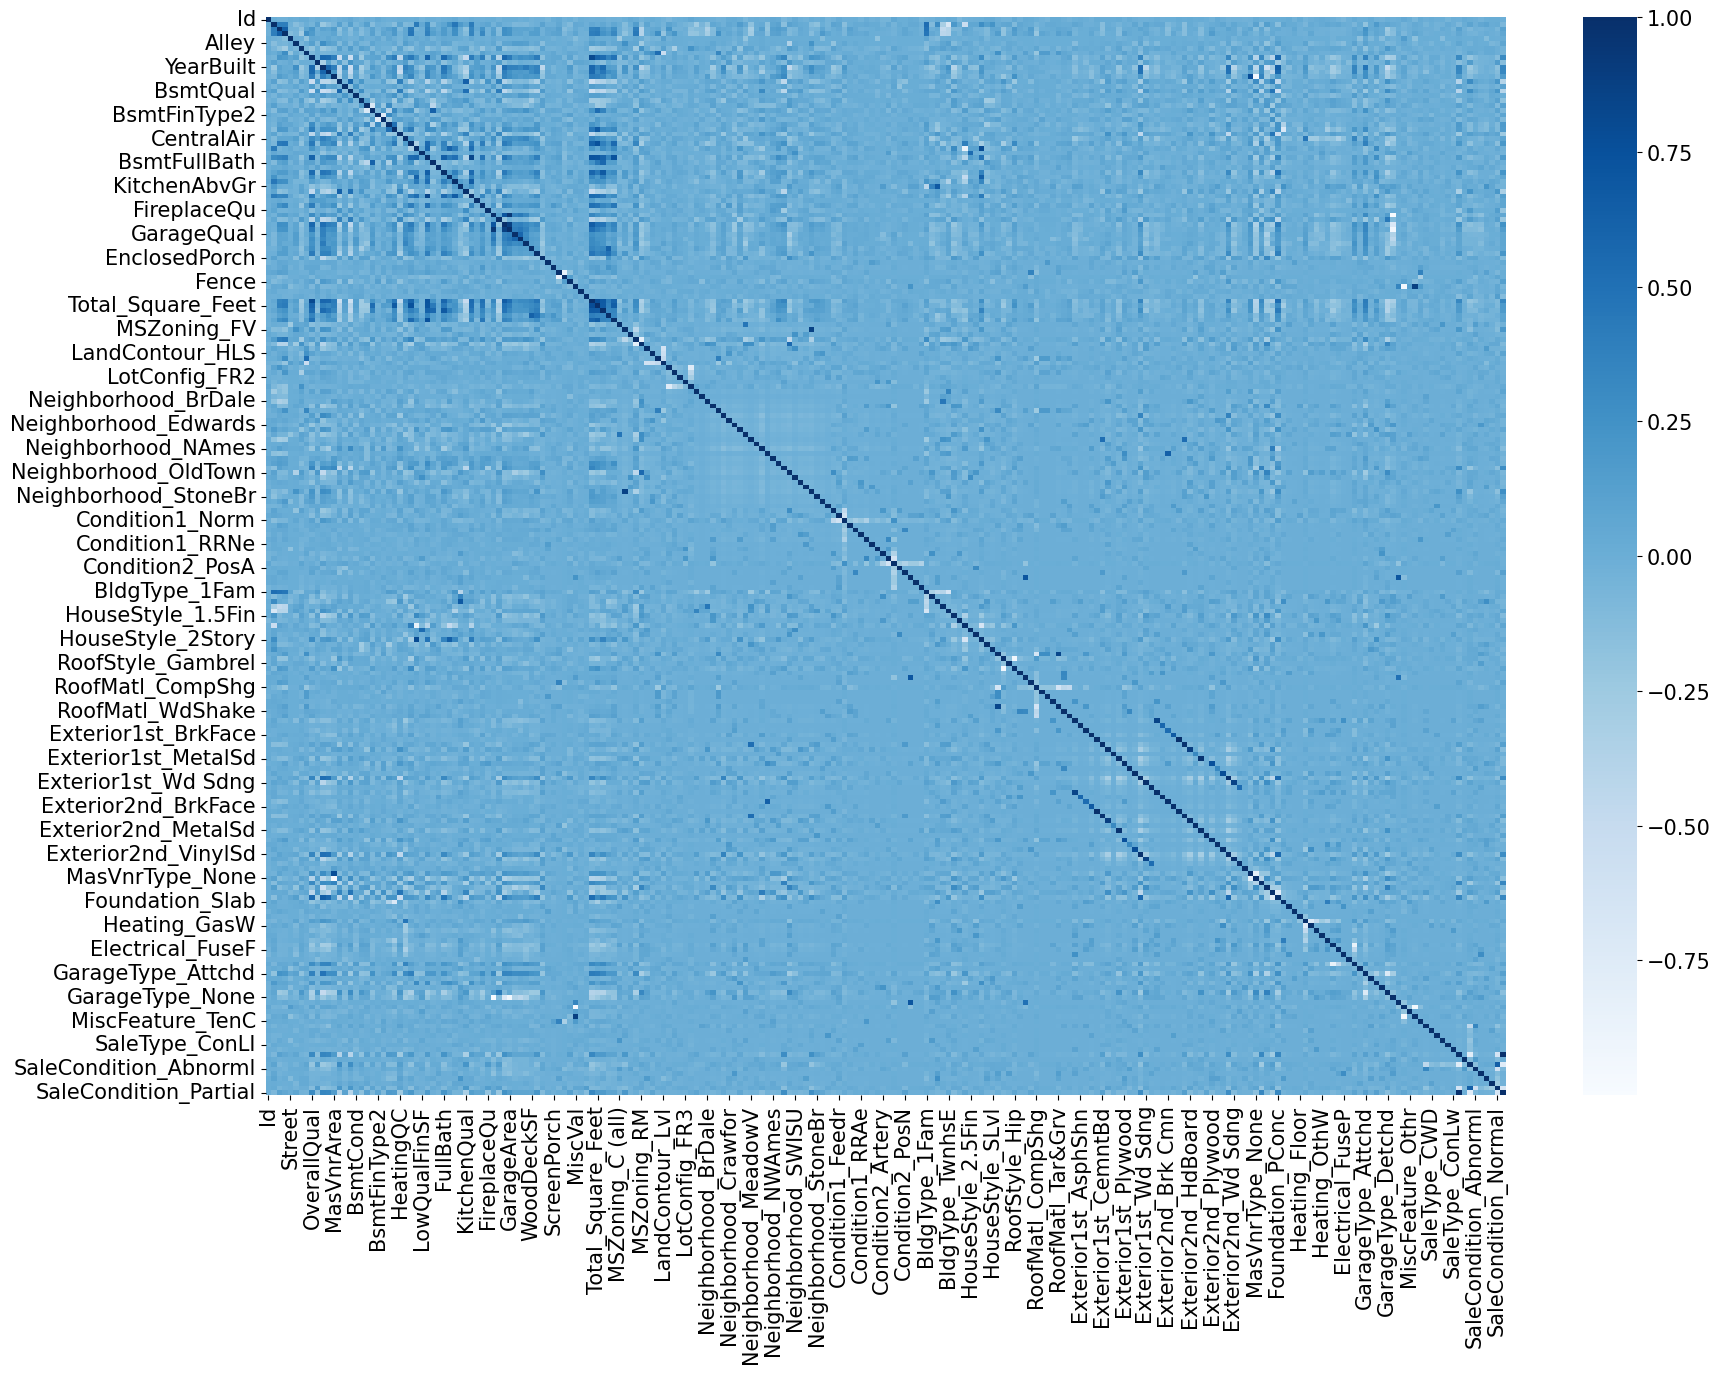

In [47]:
# compute and plot the correlation matrix
plt.figure(figsize=(20,14))
sns.heatmap(df_train.corr(),cmap='Blues',annot=False)

<Axes: >

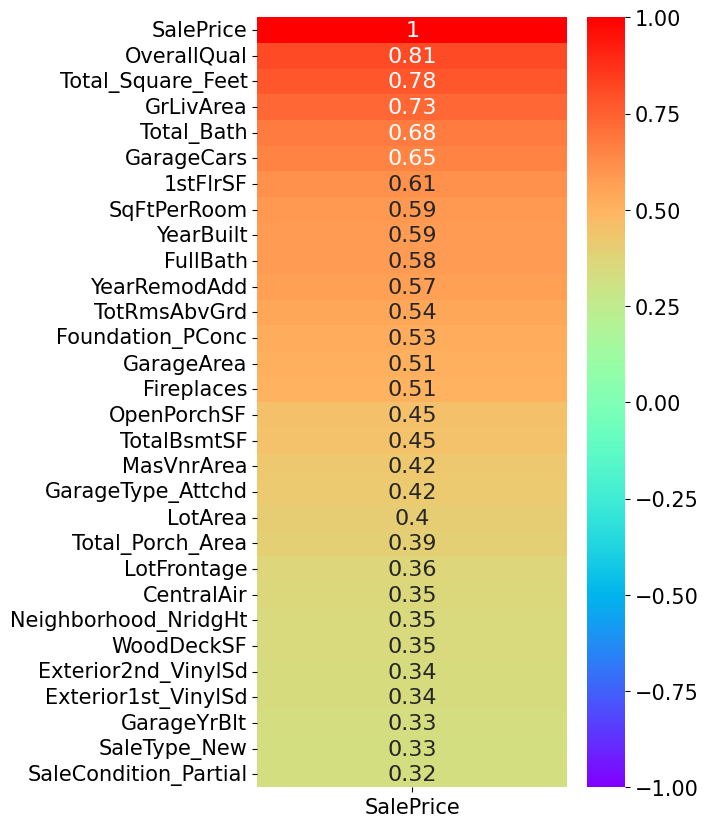

In [48]:
# Checking the corelation beetween the predicted and training column
top_features = df_train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

### Relation Exploration for Few Numerical Variables and categorical features

In [49]:
# Making Function for plotting and checking the relation between two columns
def plot_data(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.stripplot(x=col, y='SalePrice', data=df_train, ax=ax[0])
        sns.countplot(df_train[col], ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='SalePrice', data=df_train, ax=ax[0])
        sns.distplot(df_train[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')

#### Relation Exploration for Few Numerical Variables

/tmp/ipython-input-49-2346589752.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], kde=False, ax=ax[1])


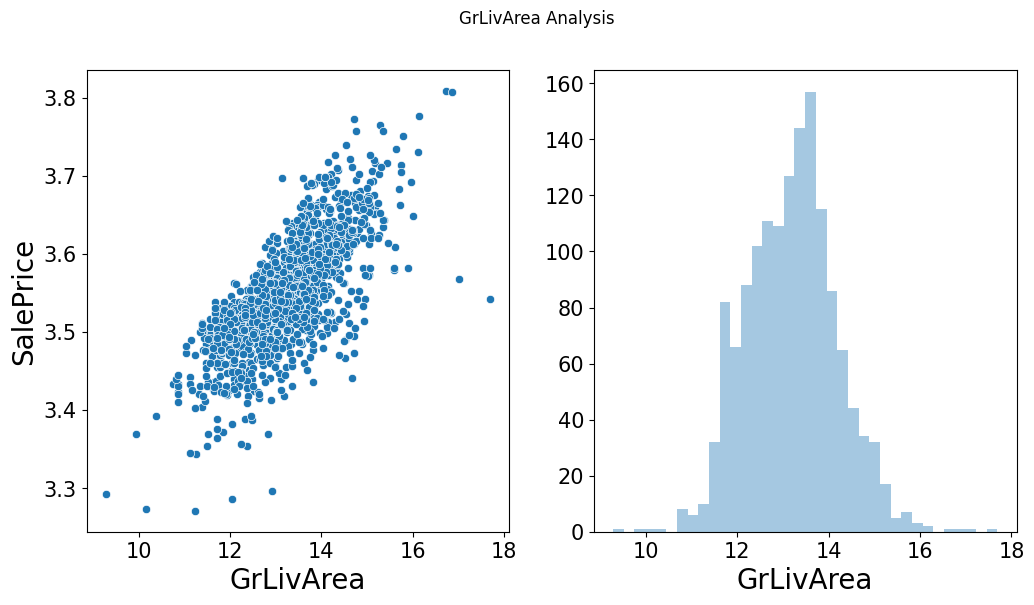

In [50]:
plot_data('GrLivArea')

'GrLivArea' seem to be linearly related with 'SalePrice'. The relationship is positive, which means that as one variable increases, the other also increases.

/tmp/ipython-input-49-2346589752.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], kde=False, ax=ax[1])


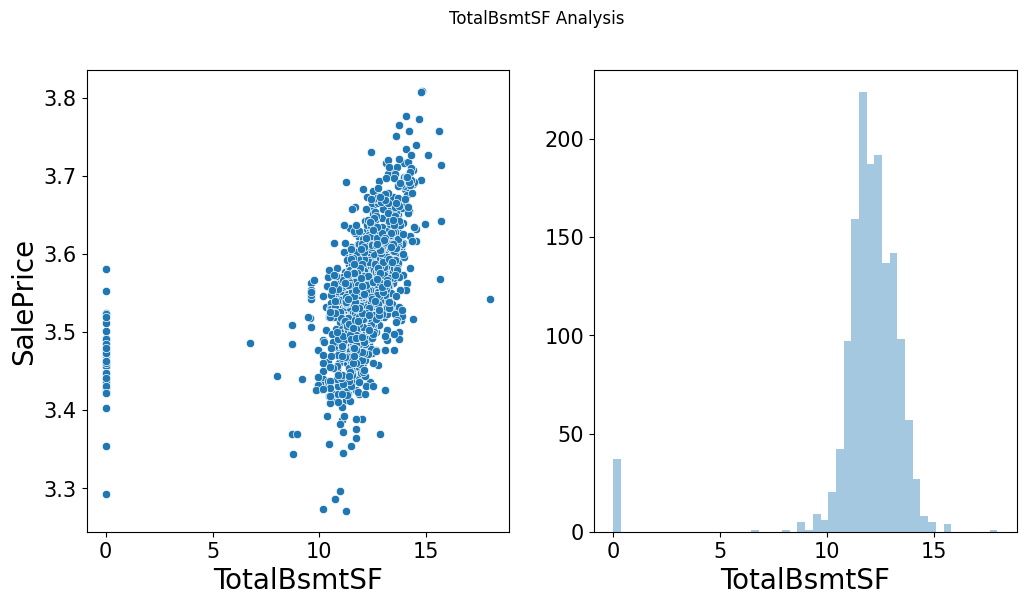

In [51]:
plot_data('TotalBsmtSF')

'TotalBsmtSF' also seem to be linearly related with 'SalePrice'. The relationship is positive, which means that as one variable increases, the other also increases. However, it has outliers so we need to move them.

In [52]:
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF'] > 3000) & (df_train['SalePrice'] < 400000)].index)

####  Relation Exploration for categorical features

Text(0.5, 0.98, 'BsmtFinType2 Analysis')

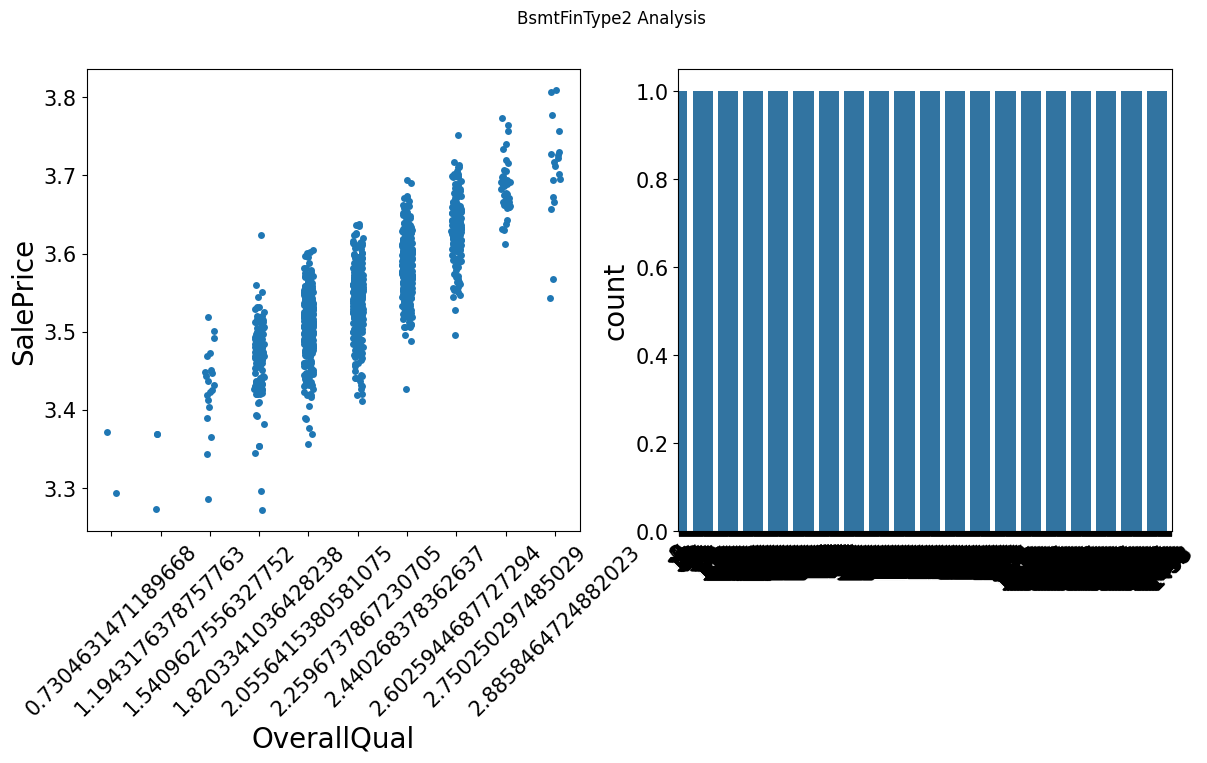

In [53]:
# plot saleprice vs. overallqual
fig, ax = plt.subplots(1,2,figsize=(14,6))
sns.stripplot(x='OverallQual', y='SalePrice', data=df_train, ax=ax[0])
ax[0].tick_params(axis='x', labelrotation = 45)
sns.countplot(df_train['OverallQual'], ax=ax[1])
ax[1].tick_params(axis='x', labelrotation = 45)
fig.suptitle(str(col) + ' Analysis')

In [54]:
# drop off the outliers
df_train = df_train.drop(df_train[(df_train['OverallQual'] == 10) & (df_train['SalePrice'] < 200000)].index)

/tmp/ipython-input-49-2346589752.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], kde=False, ax=ax[1])


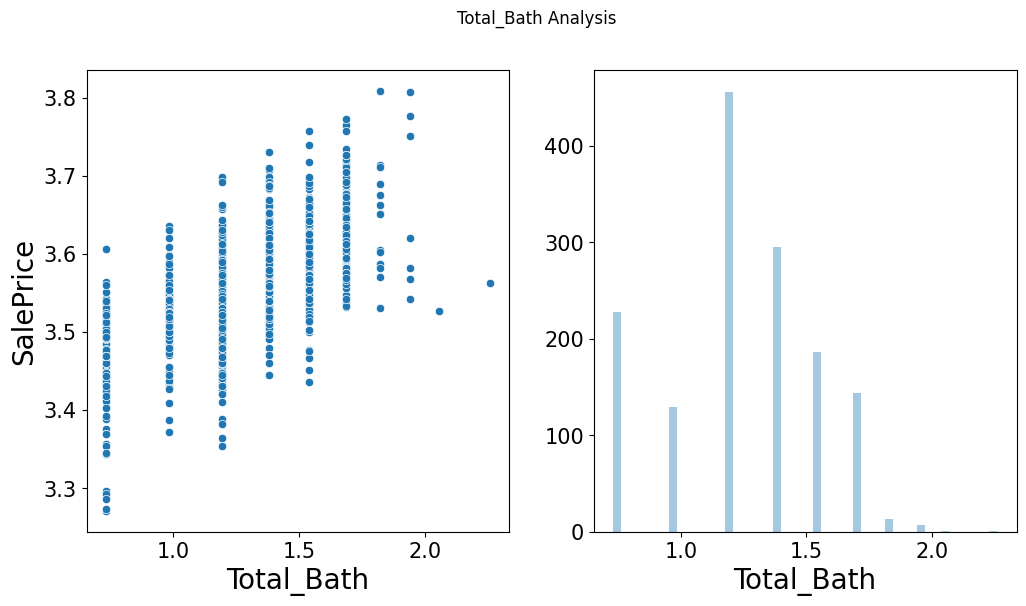

In [55]:
# plot saleprices vs total_bath
plot_data('Total_Bath')

In [56]:
# Dropping the outliers in the data
df_train = df_train.drop(df_train[(df_train['Total_Bath'] > 4) & (df_train['SalePrice'] < 200000)].index)

In [57]:
df_train.reset_index()

index         Id  MSSubClass  LotFrontage    LotArea    Street  \
0         0   0.730463    2.750250     5.831328  19.212182  0.730463   
1         1   1.194318    1.820334     6.221214  19.712205  0.730463   
2         2   1.540963    2.750250     5.914940  20.347241  0.730463   
3         3   1.820334    2.885846     5.684507  19.691553  0.730463   
4         4   2.055642    2.750250     6.314735  21.325160  0.730463   
...     ...        ...         ...          ...        ...       ...   
1455   1455  13.213850    2.750250     5.744420  18.960528  0.730463   
1456   1456  13.215896    1.820334     6.337529  20.994868  0.730463   
1457   1457  13.217941    2.885846     5.859551  19.476345  0.730463   
1458   1458  13.219985    1.820334     5.914940  19.760176  0.730463   
1459   1459  13.222028    1.820334     6.098626  19.849063  0.730463   

         Alley  LotShape  LandSlope  OverallQual  ...  SaleType_ConLw  \
0     0.730463  1.540963        0.0     2.440268  ...           False   
1     0.730463  1.540963        0.0     2.259674  ...           False   
2     0.730463  0.000000        0.0     2.440268  ...           False   
3     0.730463  0.000000        0.0     2.440268  ...           False   
4     0.730463  0.000000        0.0     2.602594  ...           False   
...        ...       ...        ...          ...  ...             ...   
1455  0.730463  1.540963        0.0     2.259674  ...           False   
1456  0.730463  1.540963        0.0     2.259674  ...           False   
1457  0.730463  1.540963        0.0     2.440268  ...           False   
1458  0.730463  1.540963        0.0     2.055642  ...           False   
1459  0.730463  1.540963        0.0     2.055642  ...           False   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0            False         False         True                  False   
1            False         False         True                  False   
2            False         False         True                  False   
3            False         False         True                   True   
4            False         False         True                  False   
...            ...           ...          ...                    ...   
1455         False         False         True                  False   
1456         False         False         True                  False   
1457         False         False         True                  False   
1458         False         False         True                  False   
1459         False         False         True                  False   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
1455                  False                 False                 False   
1456                  False                 False                 False   
1457                  False                 False                 False   
1458                  False                 False                 False   
1459                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
0                     True                  False  
1                     True                  False  
2                     True                  False  
3                    False                  False  
4                     True                  False  
...                    ...                    ...  
1455                  True                  False  
1456                  True                  False  
1457                  True    

In [58]:
import scipy.stats as st

In [59]:
# keep this line of code
housing = pd.read_csv("https://raw.githubusercontent.com/bloominstituteoftechnology/ds_code_along_unit_1/main/assets/train.csv")
# display data
housing.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

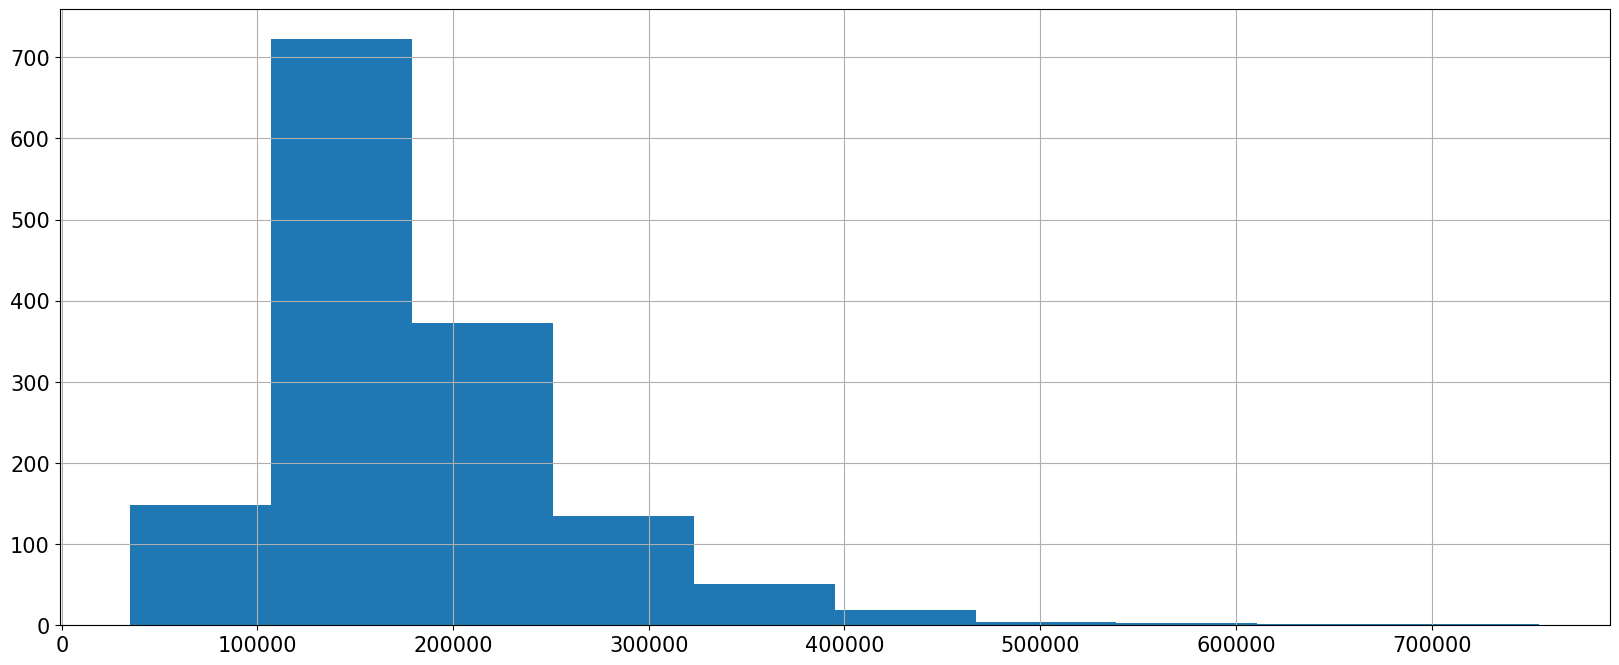

In [60]:
housing['SalePrice'].hist()

Source for
Reference value for national average for housing:
[Statista](https://www.statista.com/statistics/240991/average-sales-prices-of-new-homes-sold-in-the-us/)

In [61]:
st.ttest_1samp(housing['SalePrice'], 222900)

TtestResult(statistic=np.float64(-20.190802084757888), pvalue=np.float64(3.836863842804523e-80), df=np.int64(1459))

In [62]:
housing.groupby(['Neighborhood'])['SalePrice'].mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [63]:
st.ttest_1samp(housing[housing['Neighborhood']== 'Edwards']['SalePrice'], housing['SalePrice'].mean())

TtestResult(statistic=np.float64(-12.196987594087203), pvalue=np.float64(1.948997311546059e-21), df=np.int64(99))

In [64]:
housing[housing['Neighborhood']== 'Edwards']['SalePrice'].mean()

np.float64(128219.7)

In [65]:
housing['SalePrice'].mean()

np.float64(180921.19589041095)

In [66]:
ridge = housing[housing['Neighborhood'] == 'NoRidge']
ames = housing[housing['Neighborhood'] == 'NAmes']

In [67]:
st.ttest_ind(ridge['SalePrice'], ames['SalePrice'])

TtestResult(statistic=np.float64(19.84136920411451), pvalue=np.float64(2.984467224632914e-54), df=np.float64(264.0))

In [68]:
ridge['SalePrice'].mean(), ames['SalePrice'].mean()

(np.float64(335295.31707317074), np.float64(145847.08))

In [69]:
for i in housing.select_dtypes('O').columns:
    display(housing[i].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

CentralAir
Y    1365
N      95
Name: count, dtype: int64

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [70]:
housing['Foundation'].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [71]:
pconc = housing[housing['Foundation'] == 'PConc']['SalePrice']
cblock= housing[housing['Foundation'] == 'CBlock']['SalePrice']

In [72]:
t, p = st.ttest_ind(pconc, cblock)
t, p


(np.float64(19.153684100959705), np.float64(4.295762040126887e-72))

In [73]:
pconc.mean(), cblock.mean()

(np.float64(225230.44204018547), np.float64(149805.714511041))

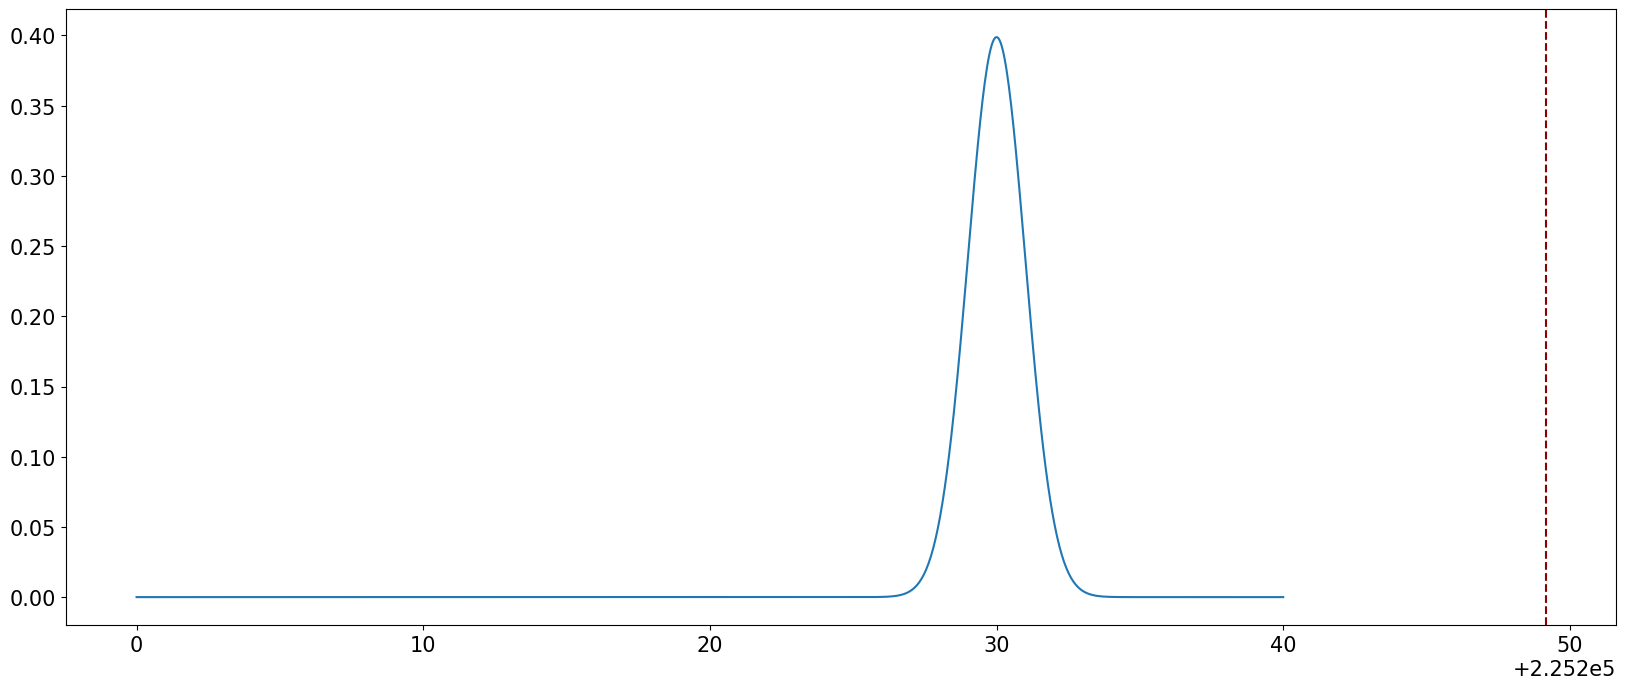

In [74]:
#example of t distribution
points = np.linspace(225200, 225240, 1000)
ypoints= st.t.pdf(x = points, loc= 225230, df= len(pconc) + len(cblock) - 2)


plt.axvline(225230+ t, color= 'darkred', linestyle= '--')
plt.plot(points, ypoints)

In [75]:
pvalues = {}
for i in housing['Foundation'].unique():
    for j in housing['Foundation'].unique():
        pvalues.update({f"{i} to {j}": st.ttest_ind(housing[housing['Foundation'] == i]['SalePrice'], housing[housing['Foundation']== j]['SalePrice'])[1]})

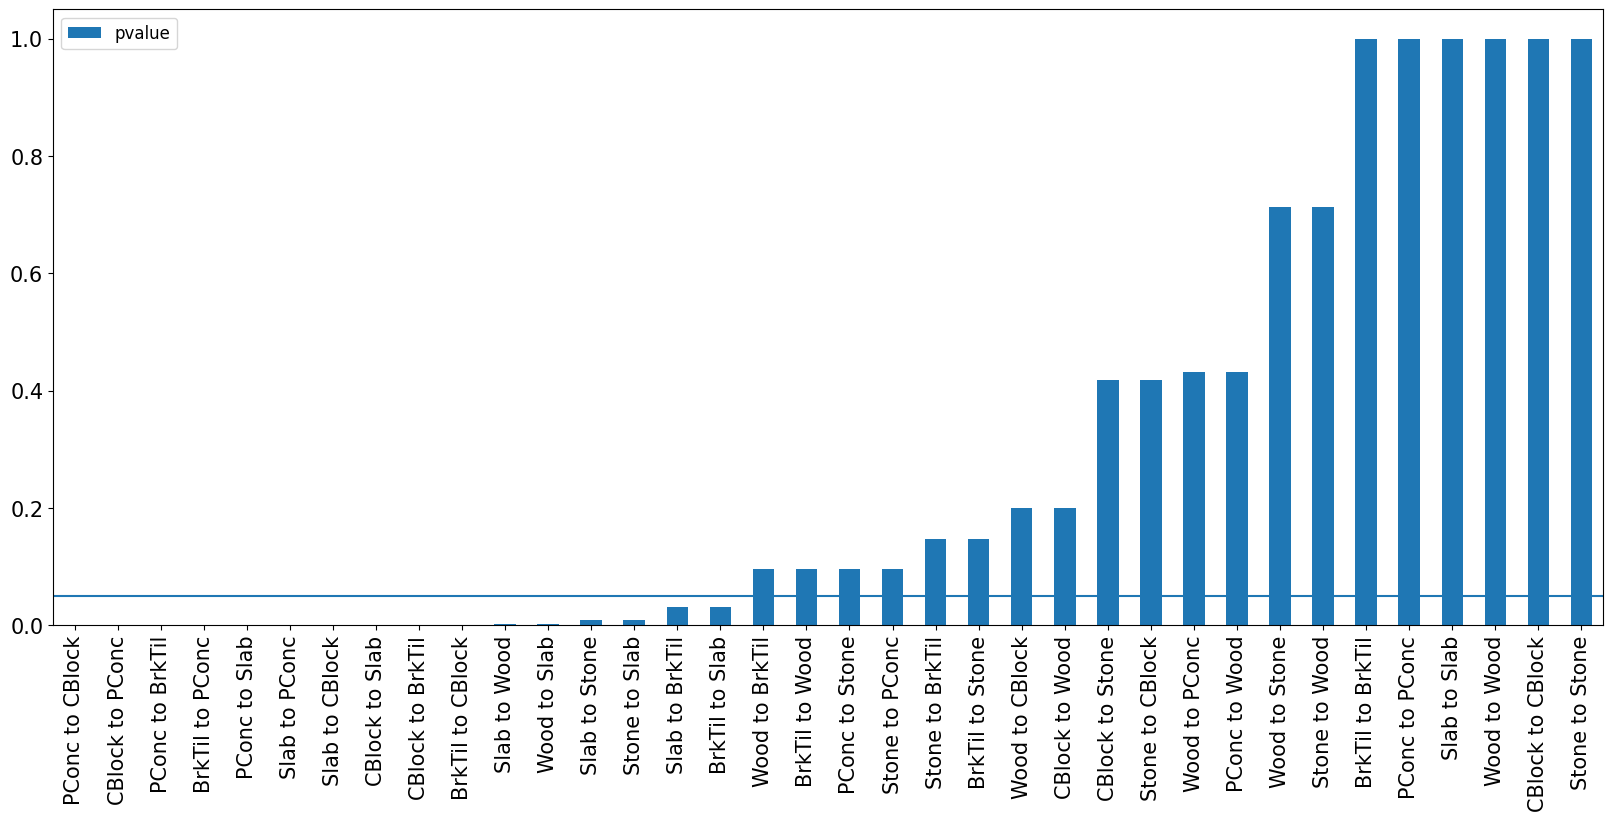

In [76]:
pvalues_df = pd.DataFrame.from_dict(pvalues, orient= 'index').rename({0:'pvalue'}, axis = 1)
pvalues_df.sort_values(by='pvalue').plot(kind='bar')
plt.axhline(0.05)

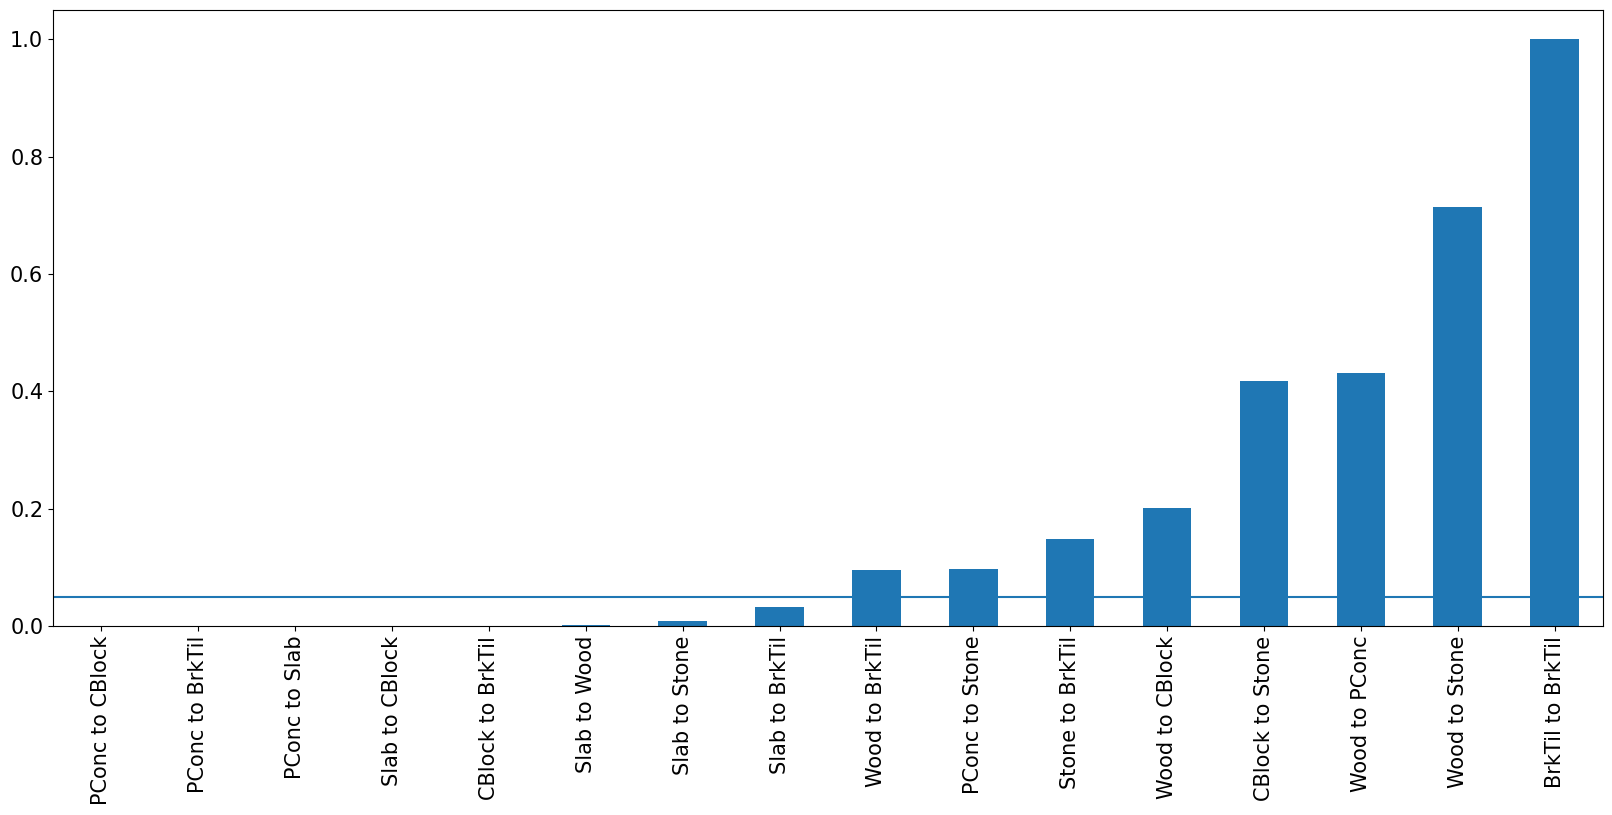

In [77]:
#drop the duplicates
pvalues_df.sort_values(by='pvalue')['pvalue'].drop_duplicates().plot(kind='bar')
plt.axhline(0.05)

<hr style="border:2px solid gray">


<font color='orange'>


<a name= "Step1"></a>
    
## Ensure you've properly connected your dataset and run the previous cells in this notebook.


### [Ames, Iowa Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [95]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [101]:
housing.loc[:, housing.isnull().sum() > 0].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [102]:
#for management purposes, let's drop columns with null values in them and select only categorical values
nom_housing = housing.dropna(axis = 1).select_dtypes('O')
nom_housing

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... ExterCond Foundation Heating  \
0         CollgCr       Norm       Norm  ...        TA      PConc    GasA   
1         Veenker      Feedr       Norm  ...        TA     CBlock    GasA   
2         CollgCr       Norm       Norm  ...        TA      PConc    GasA   
3         Crawfor       Norm       Norm  ...        TA     BrkTil    GasA   
4         NoRidge       Norm       Norm  ...        TA      PConc    GasA   
...           ...        ...        ...  ...       ...        ...     ...   
1455      Gilbert       Norm       Norm  ...        TA      PConc    GasA   
1456       NWAmes       Norm       Norm  ...        TA     CBlock    GasA   
1457      Crawfor       Norm       Norm  ...        Gd      Stone    GasA   
1458        NAmes       Norm       Norm  ...        TA     CBlock    GasA   
1459      Edwards       Norm       Norm  ...        TA     CBlock    GasA   

     HeatingQC CentralAir KitchenQual Functional PavedDrive SaleType  \
0           Ex          Y          Gd        Typ          Y       WD   
1           Ex          Y          TA        Typ          Y       WD   
2           Ex          Y          Gd        Typ          Y       WD   
3           Gd          Y          Gd        Typ          Y       WD   
4           Ex          Y          Gd        Typ          Y       WD   
...        ...        ...         ...        ...        ...      ...   
1455        Ex          Y          TA        Typ          Y       WD   
1456        TA          Y          TA       Min1          Y       WD   
1457        Ex          Y          Gd        Typ          Y       WD   
1458        Gd          Y          Gd        Typ          Y       WD   
1459        Gd          Y          TA        Typ          Y       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1455        Normal  
1456        Normal  
1457        Normal  
1458        Normal  
1459        Normal  

[1460 rows x 27 columns]

In [103]:
#what columns do we have
nom_housing.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

MSZoning


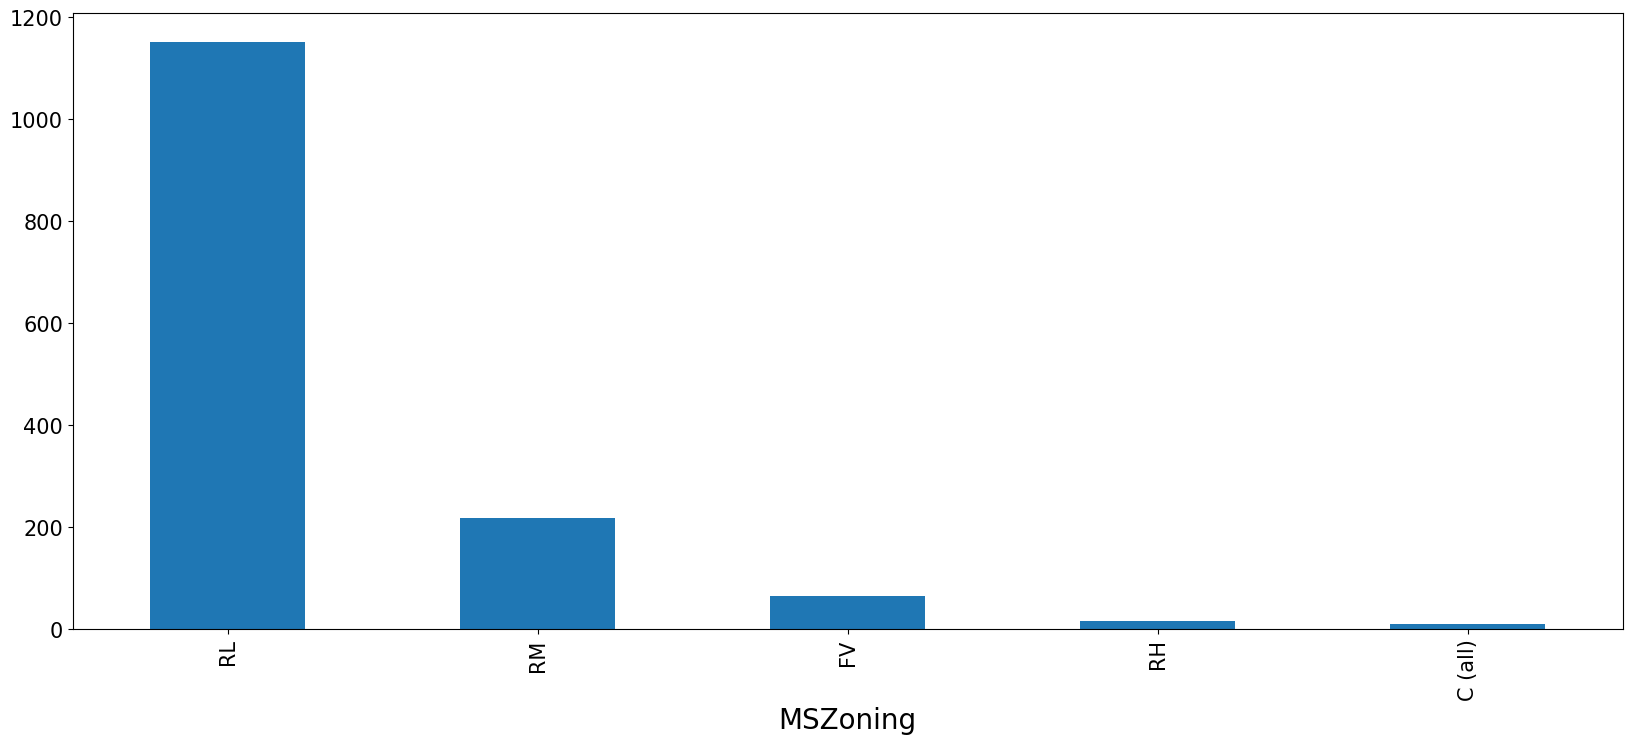

Street


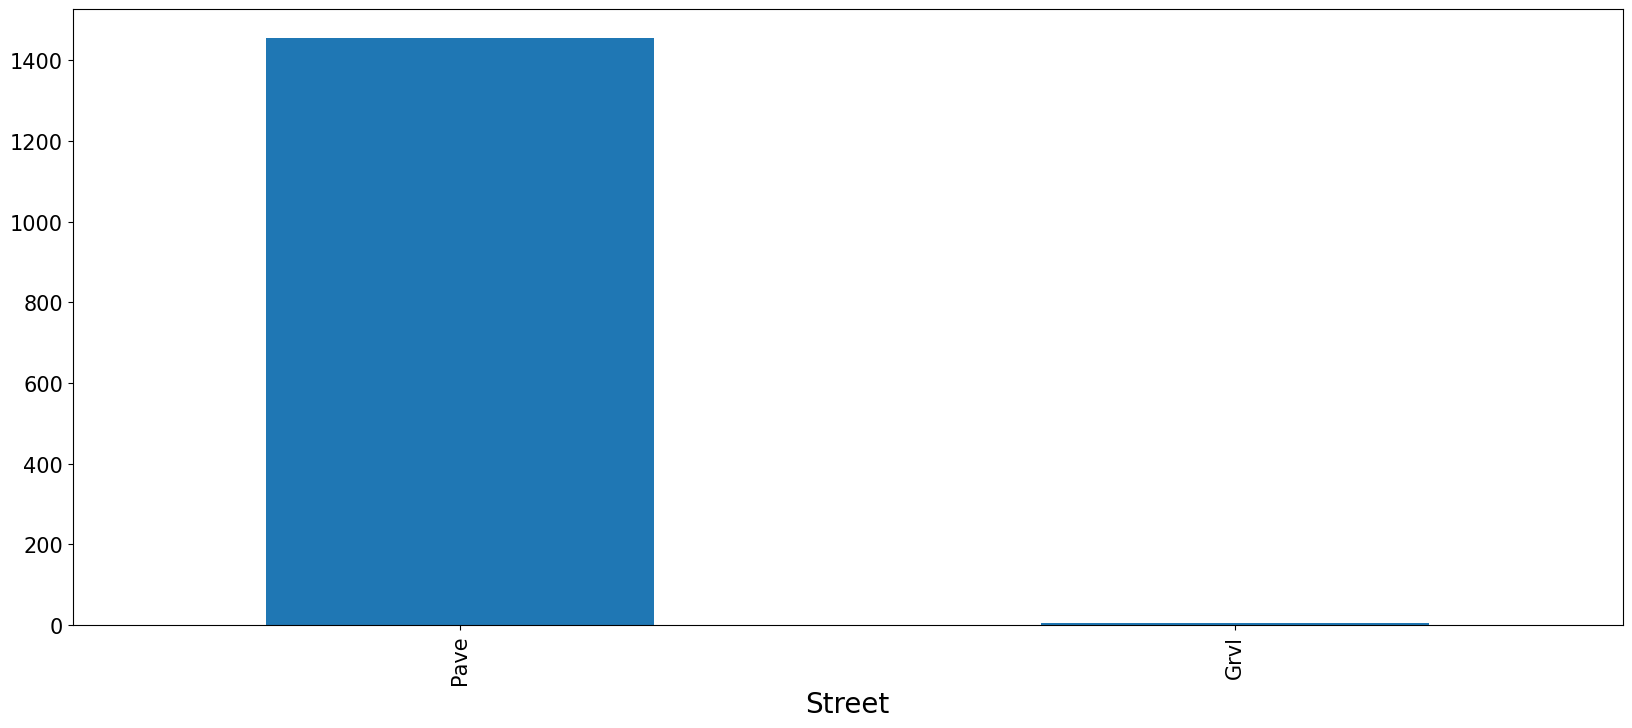

LotShape


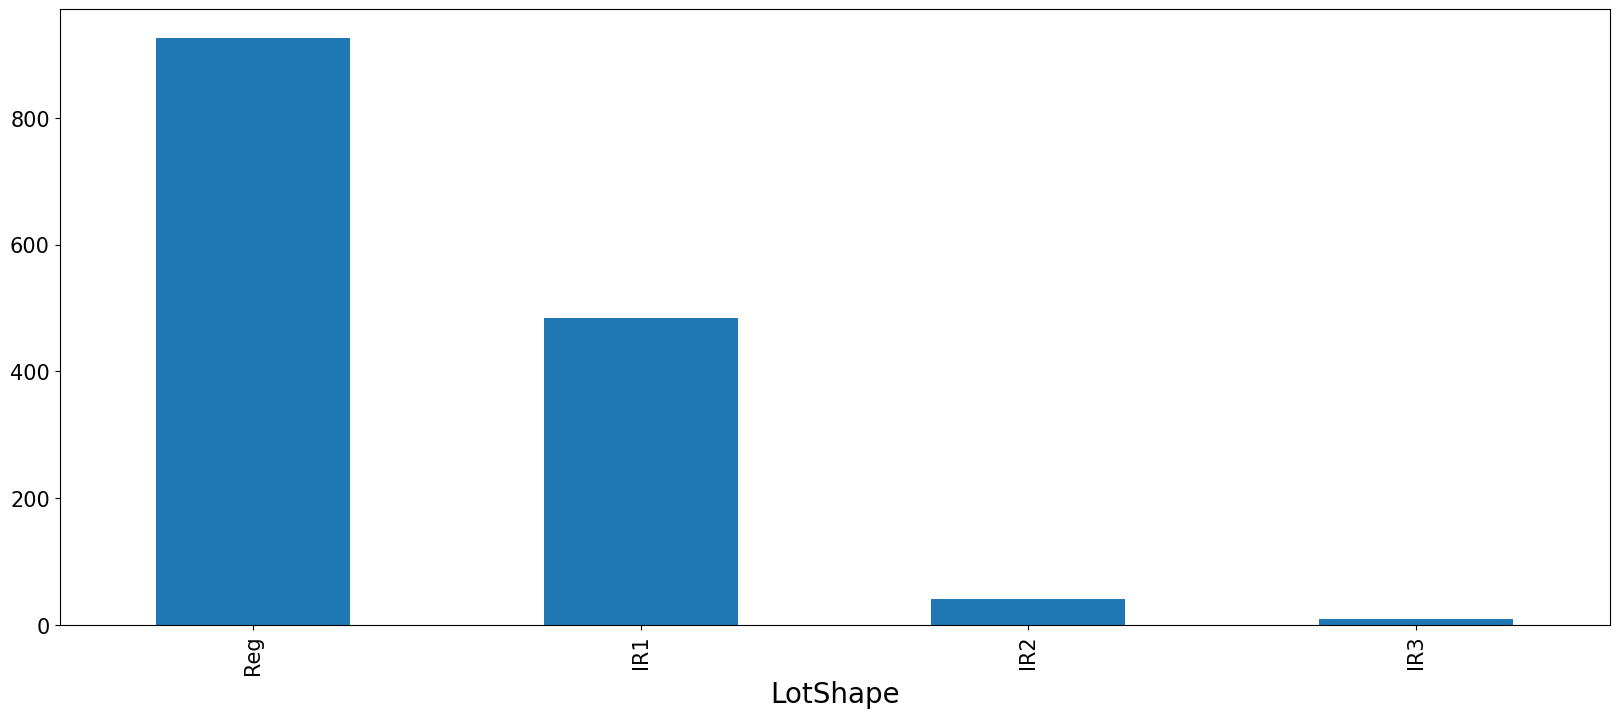

LandContour


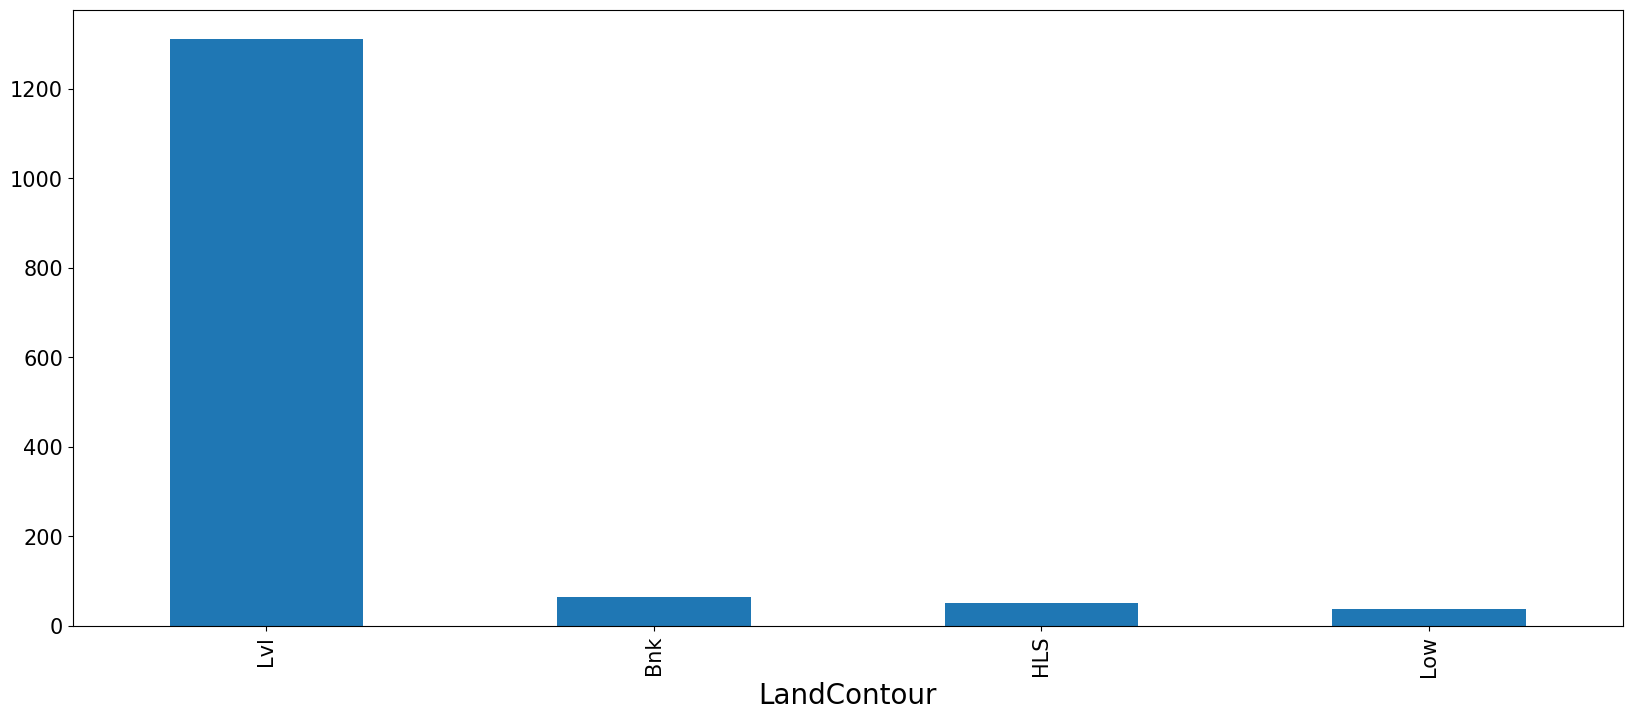

Utilities


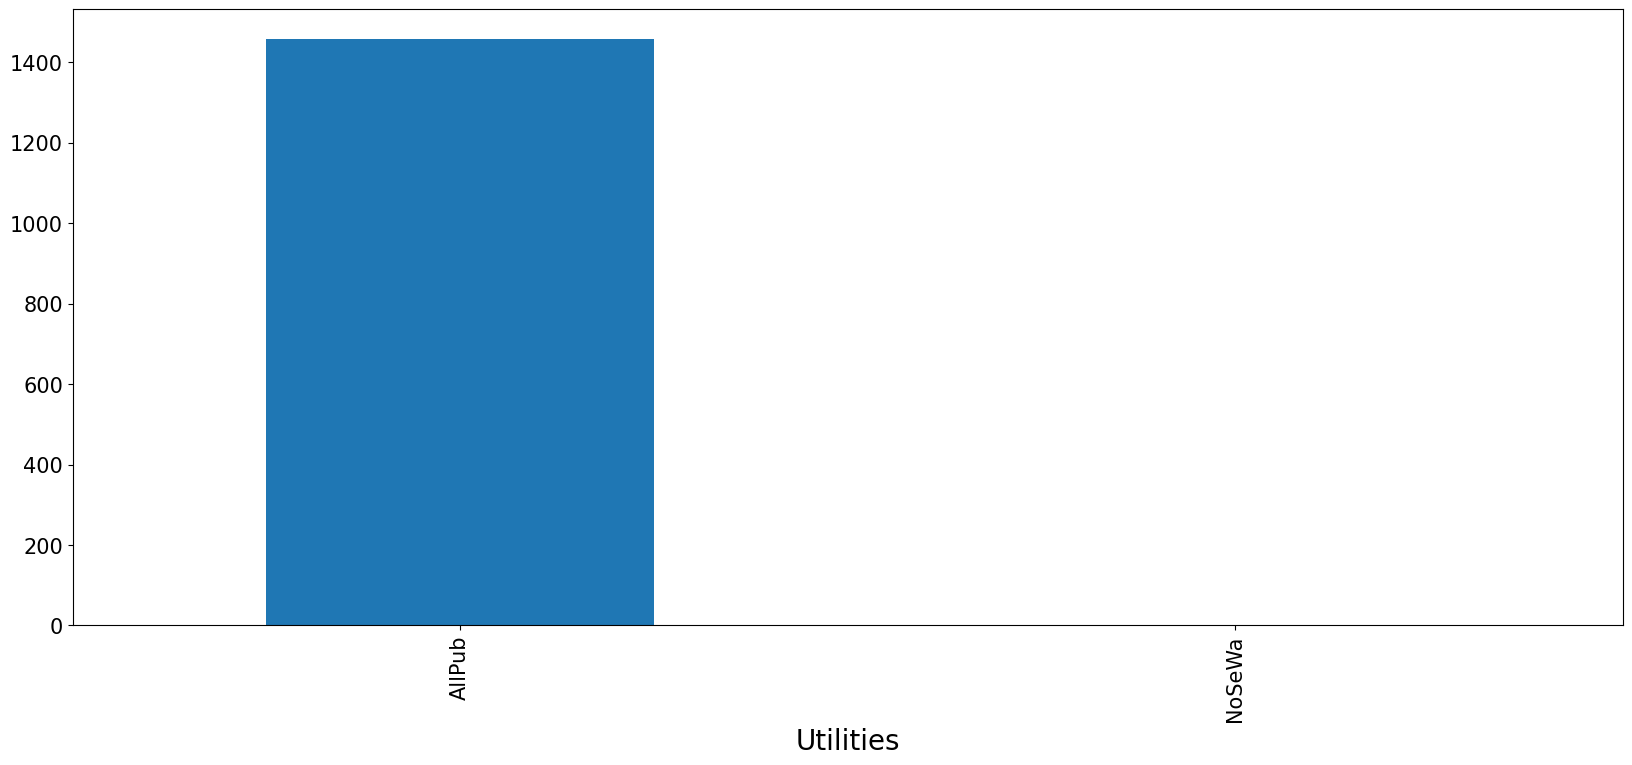

LotConfig


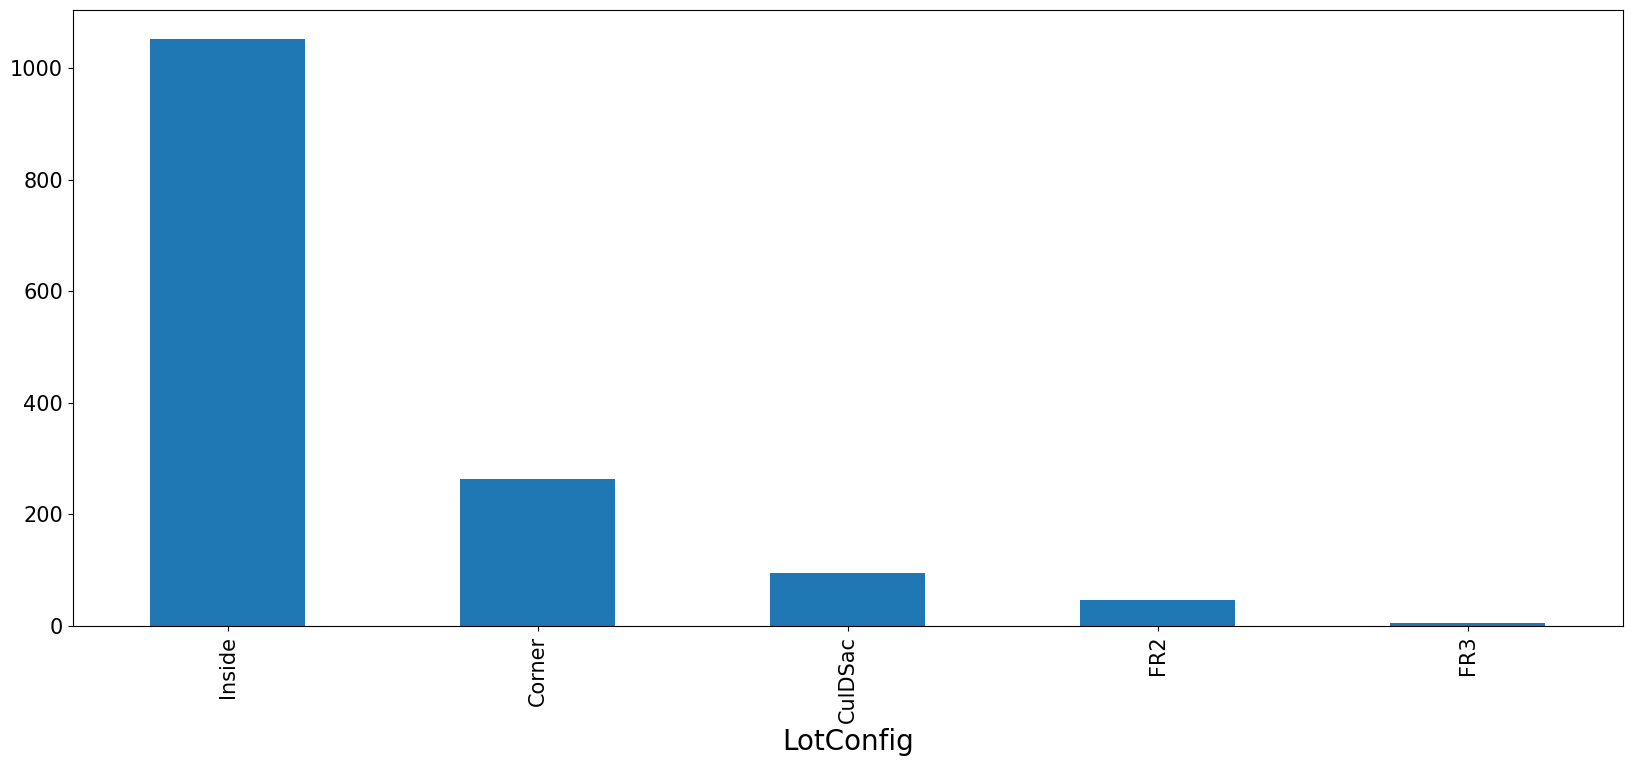

LandSlope


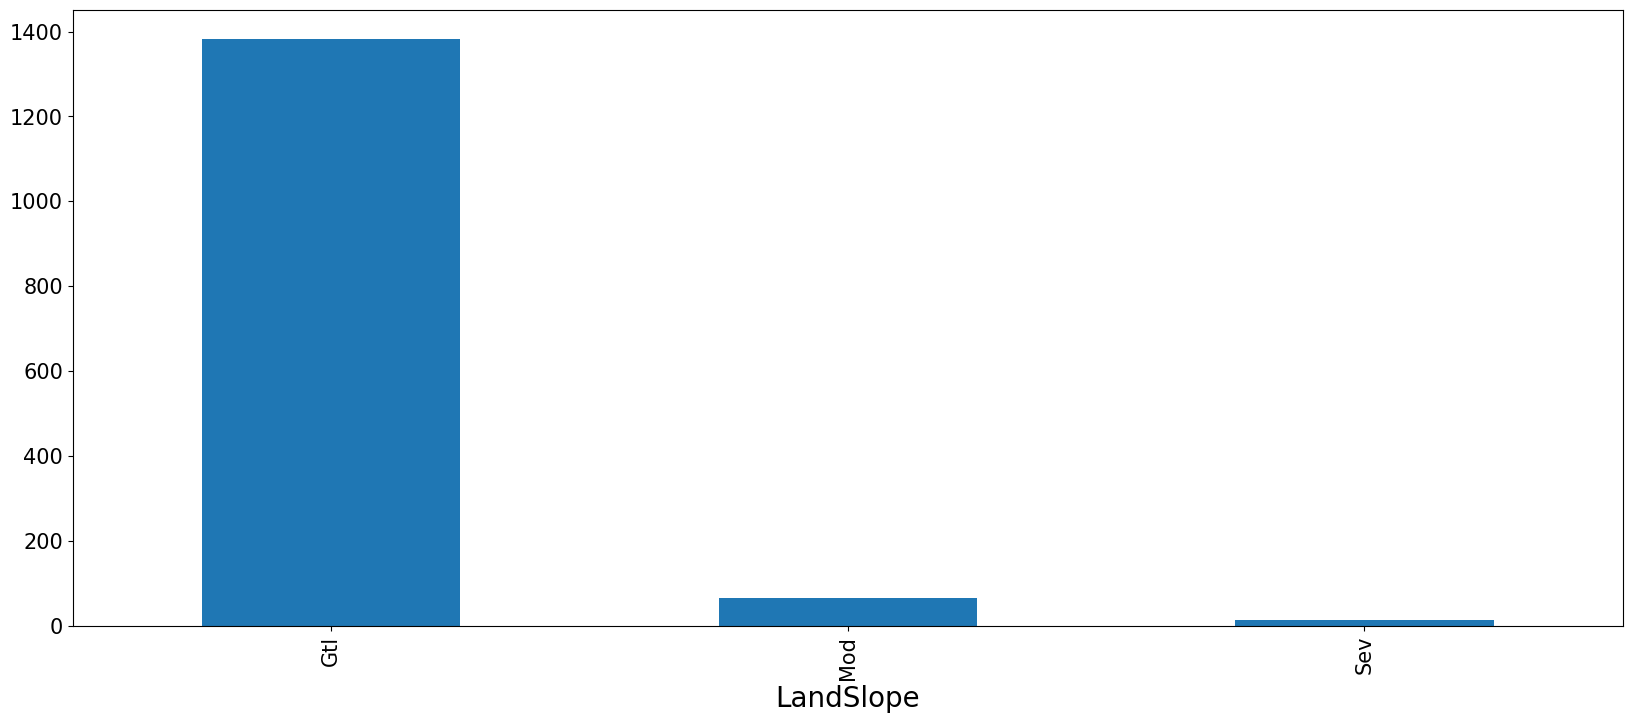

Neighborhood


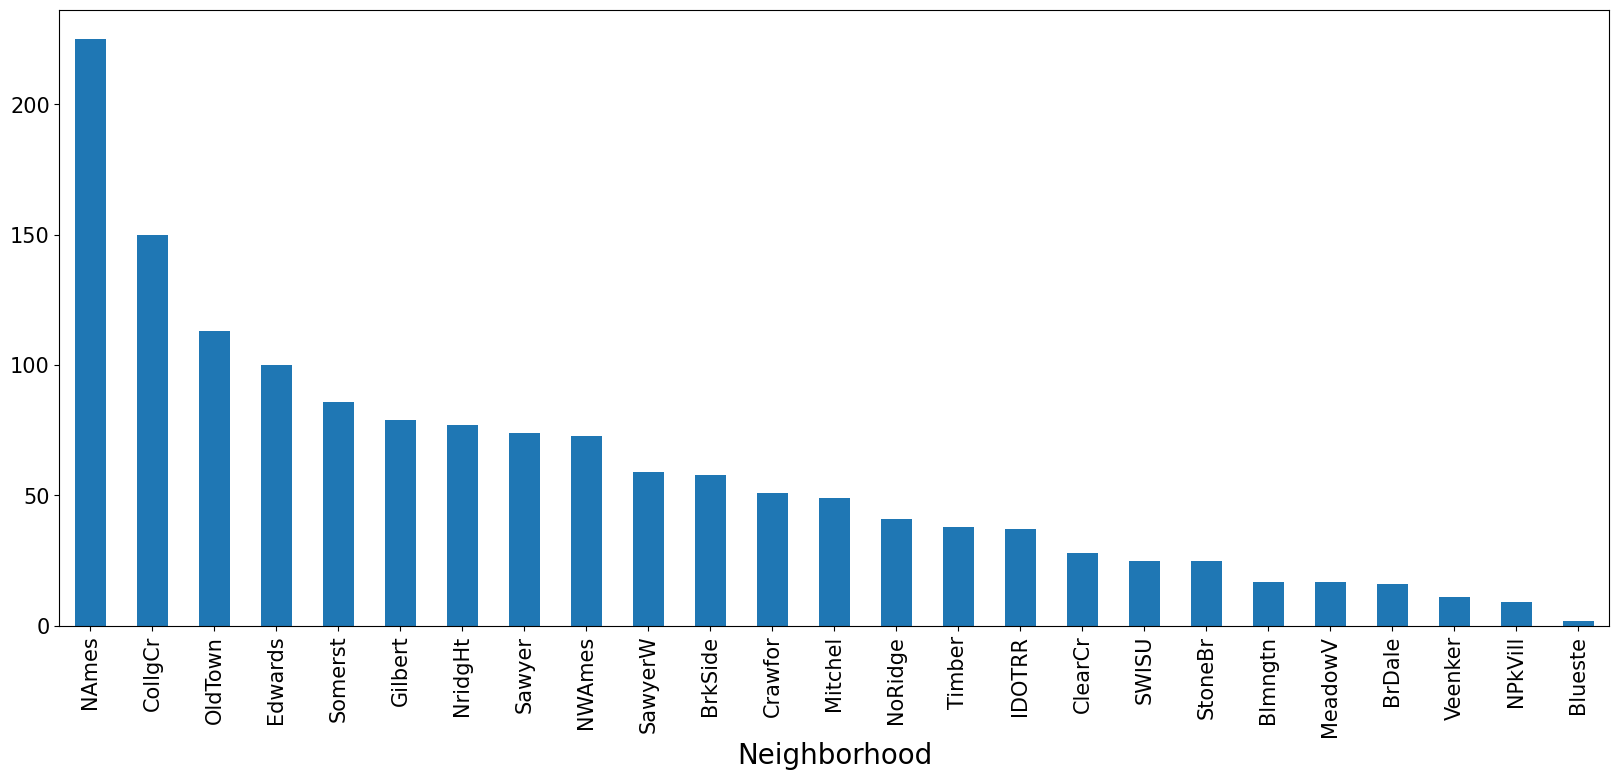

Condition1


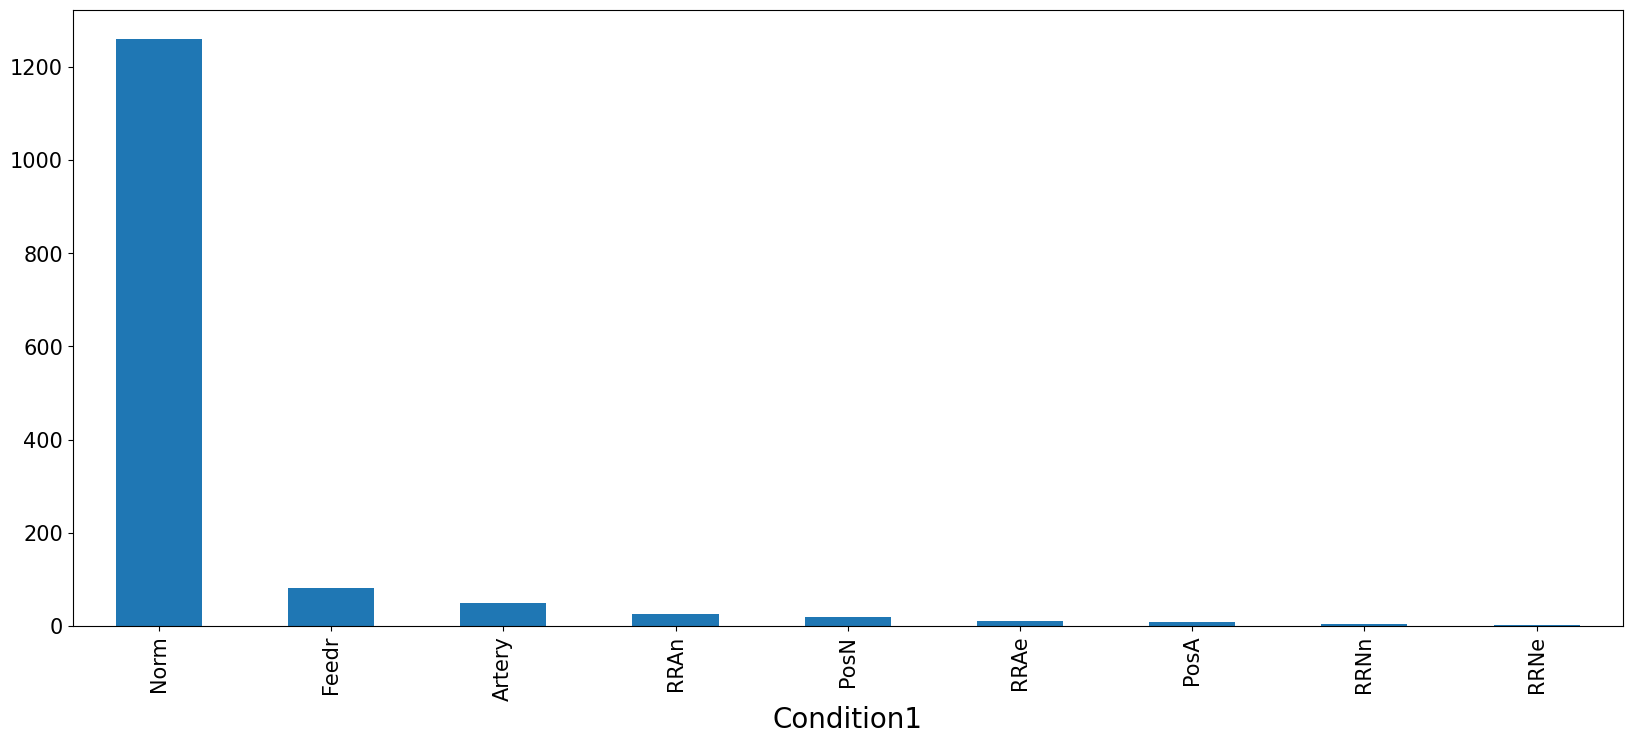

Condition2


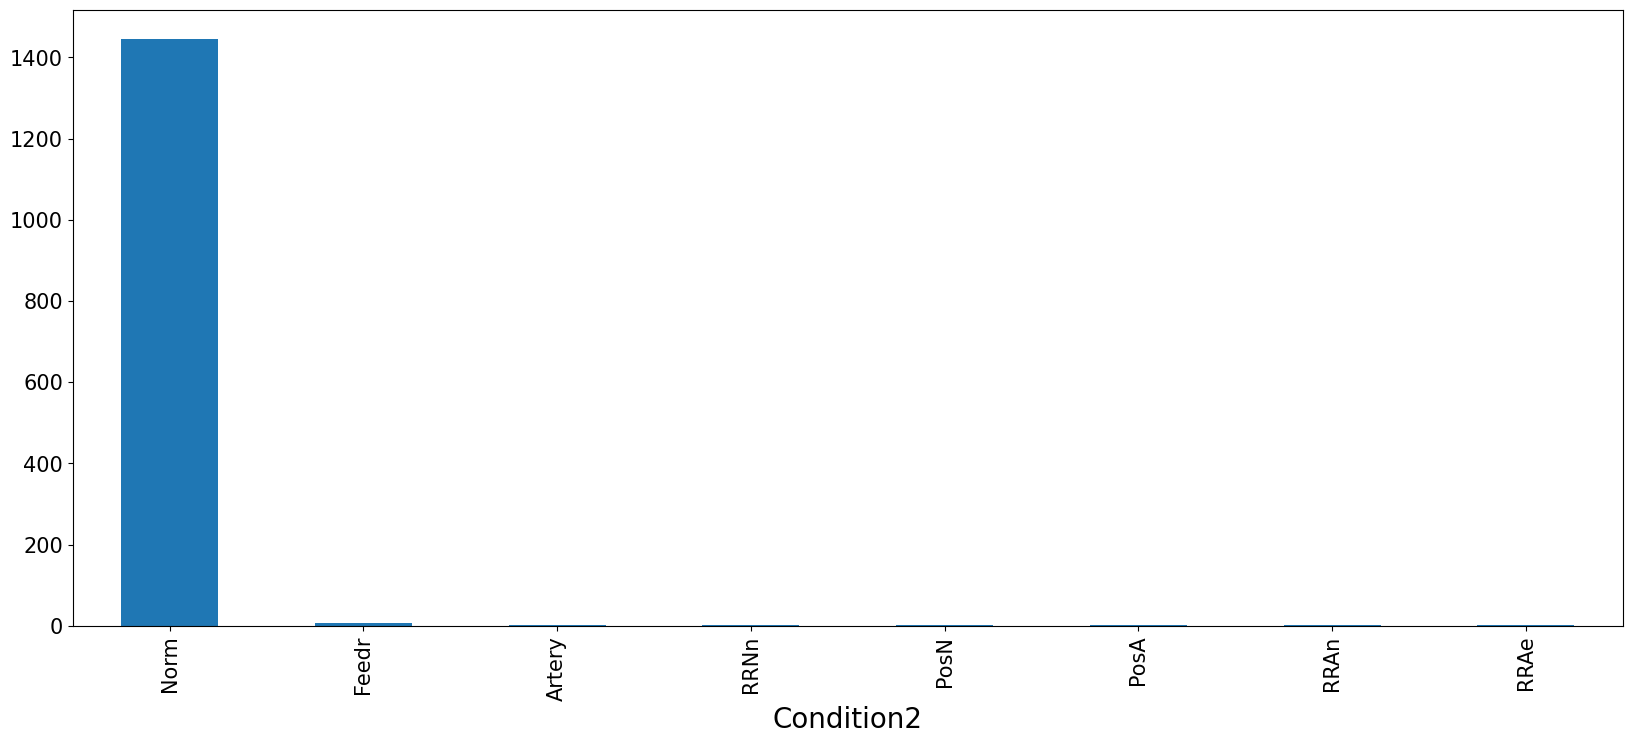

BldgType


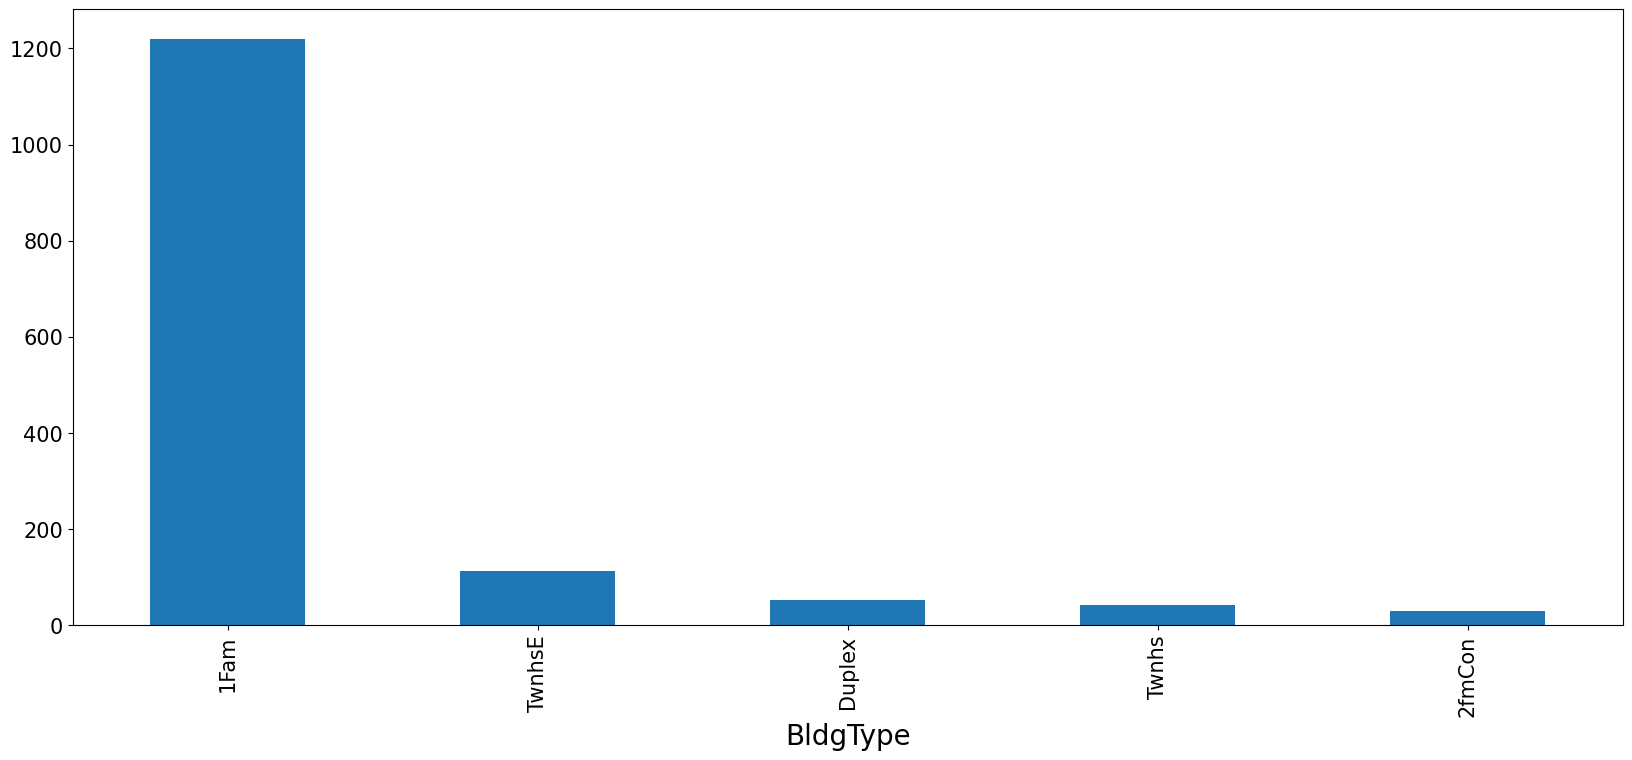

HouseStyle


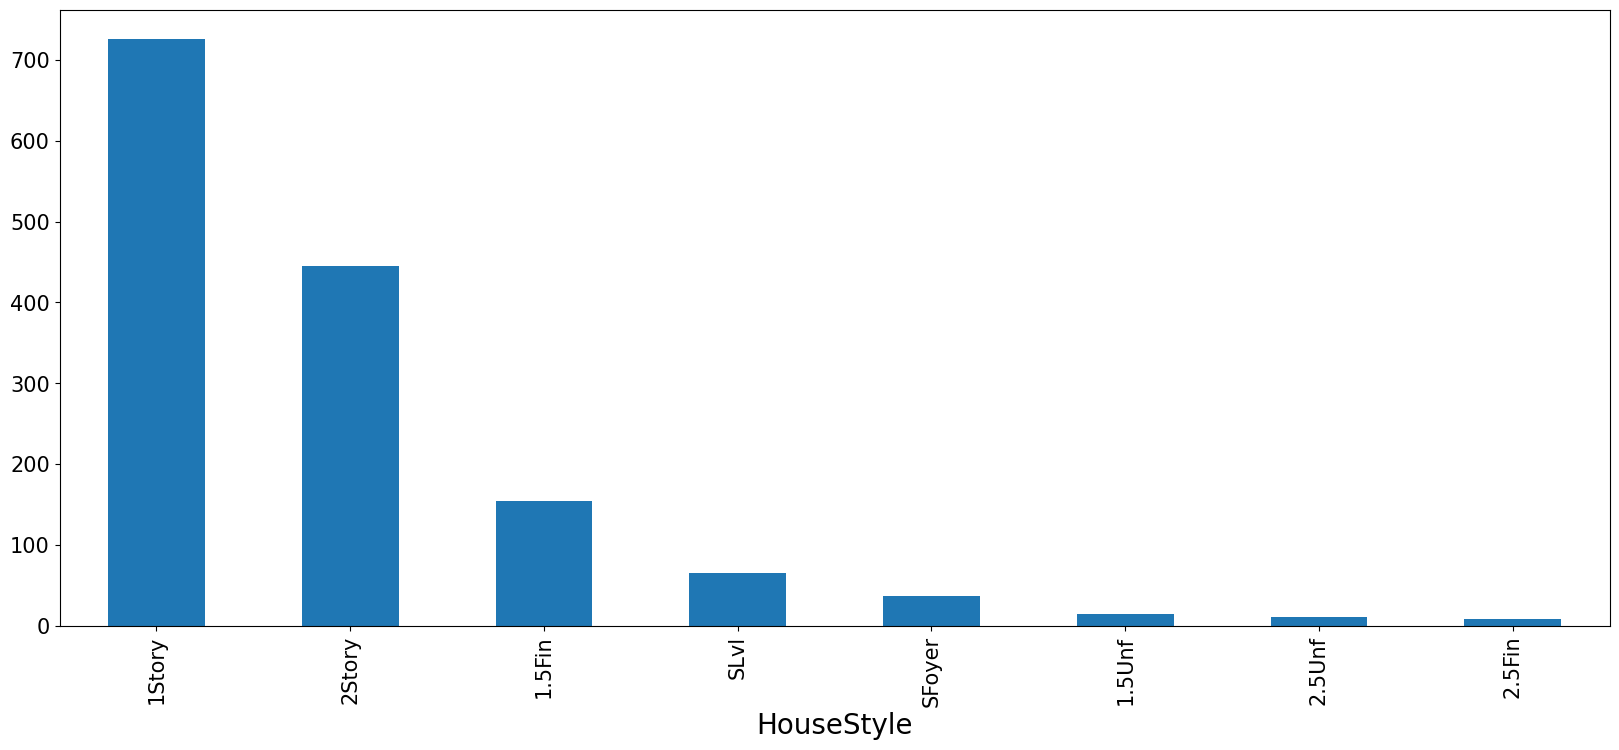

RoofStyle


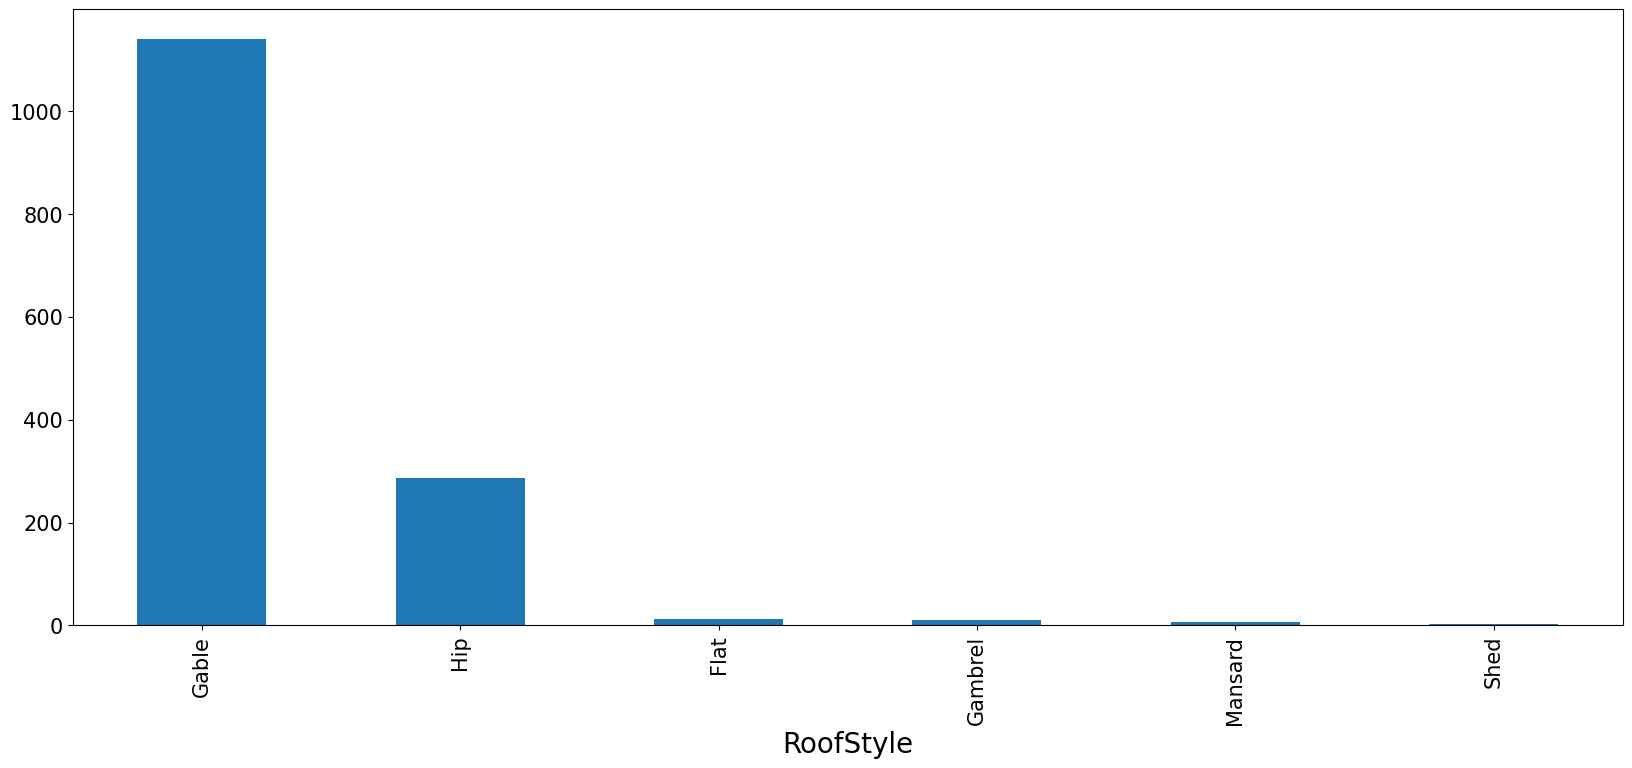

RoofMatl


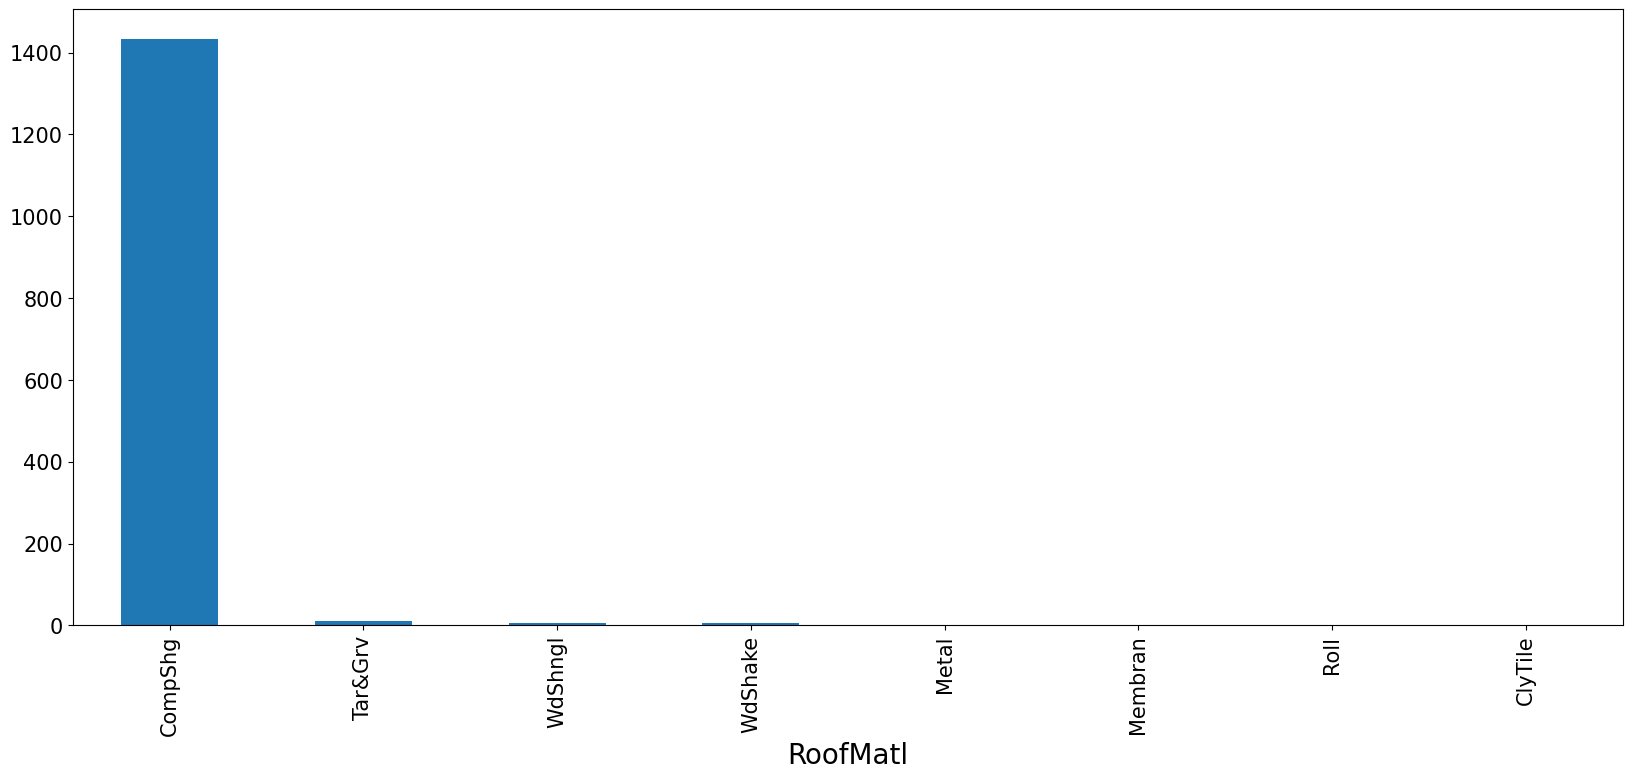

Exterior1st


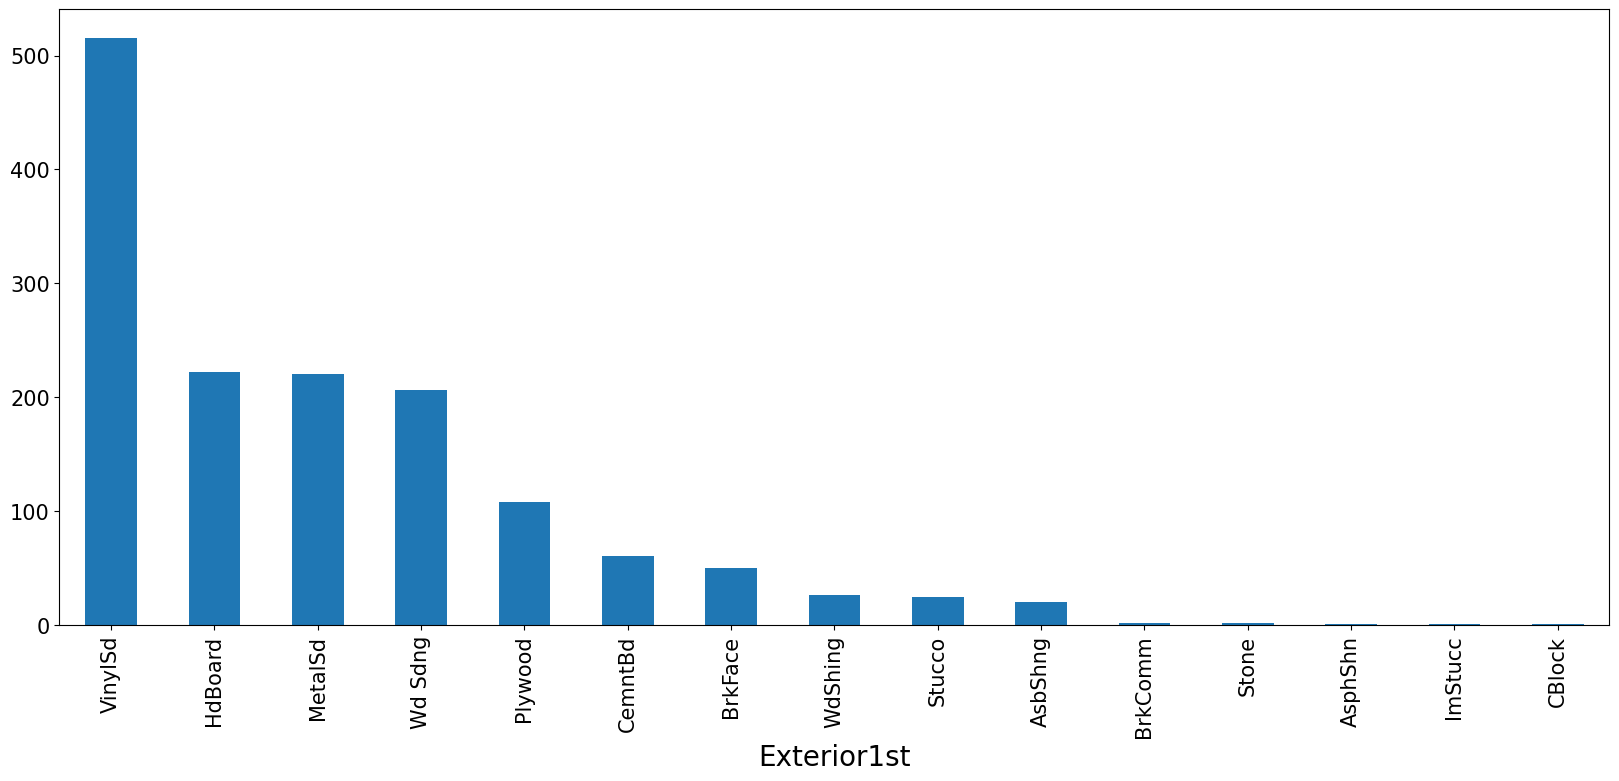

Exterior2nd


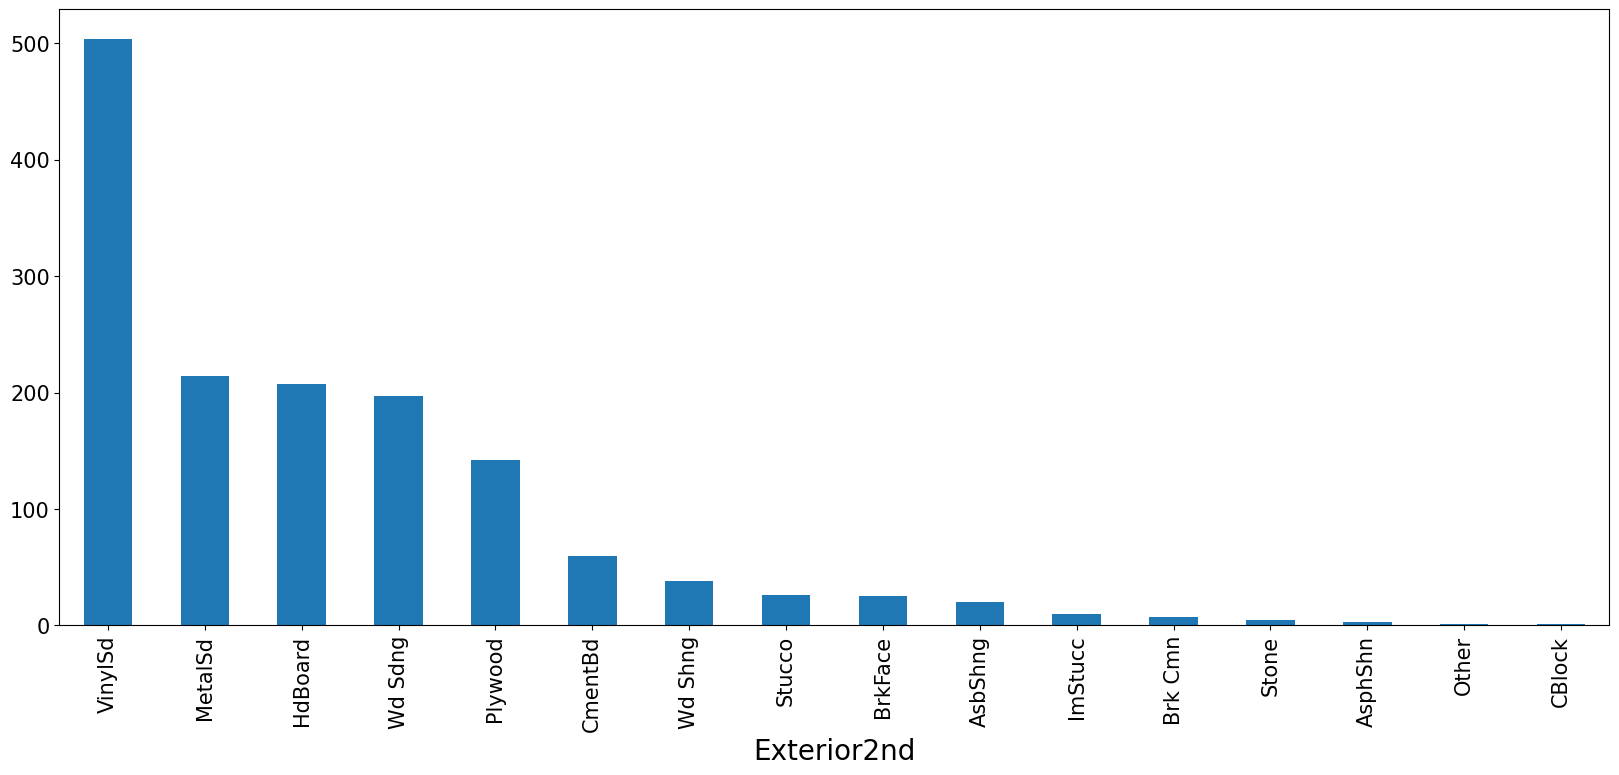

ExterQual


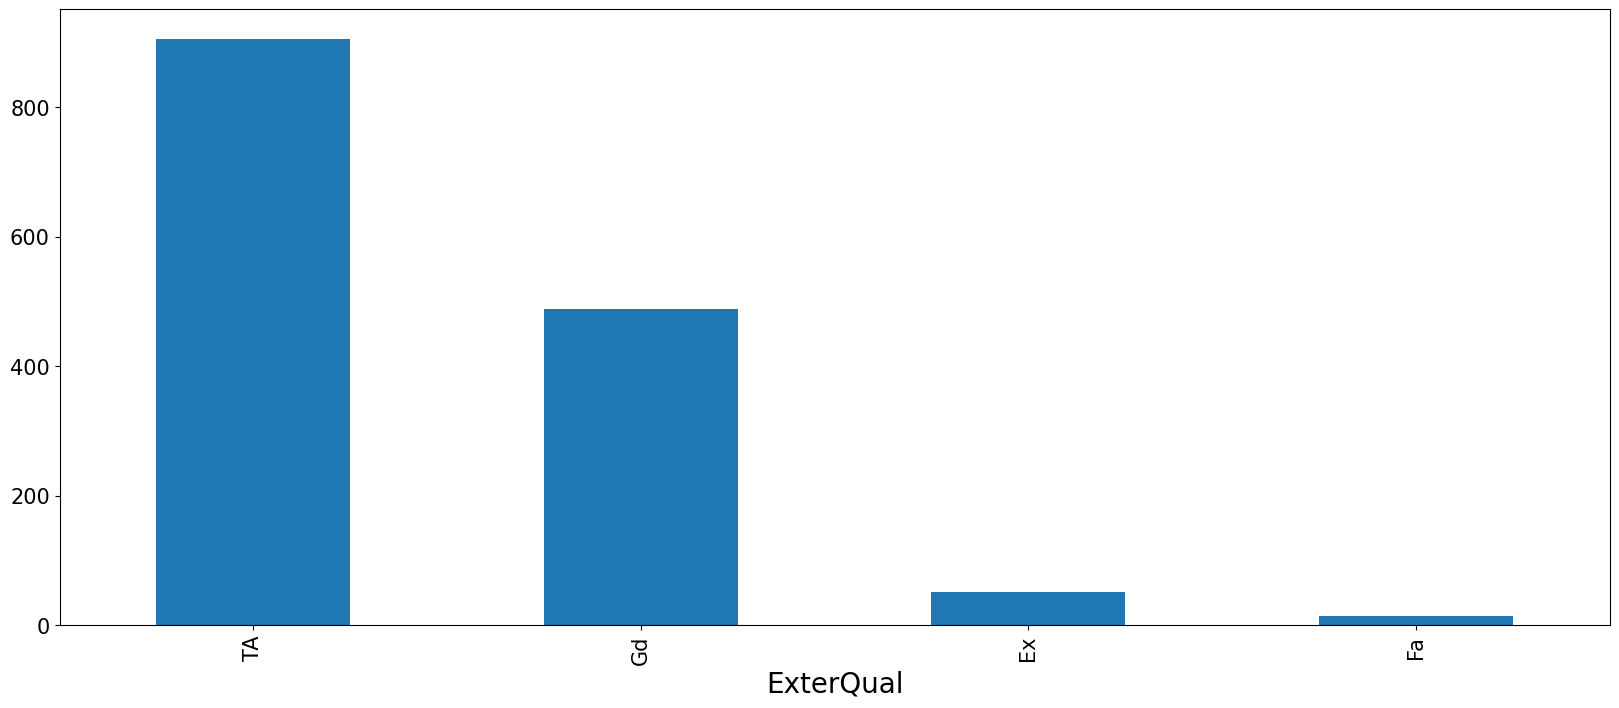

ExterCond


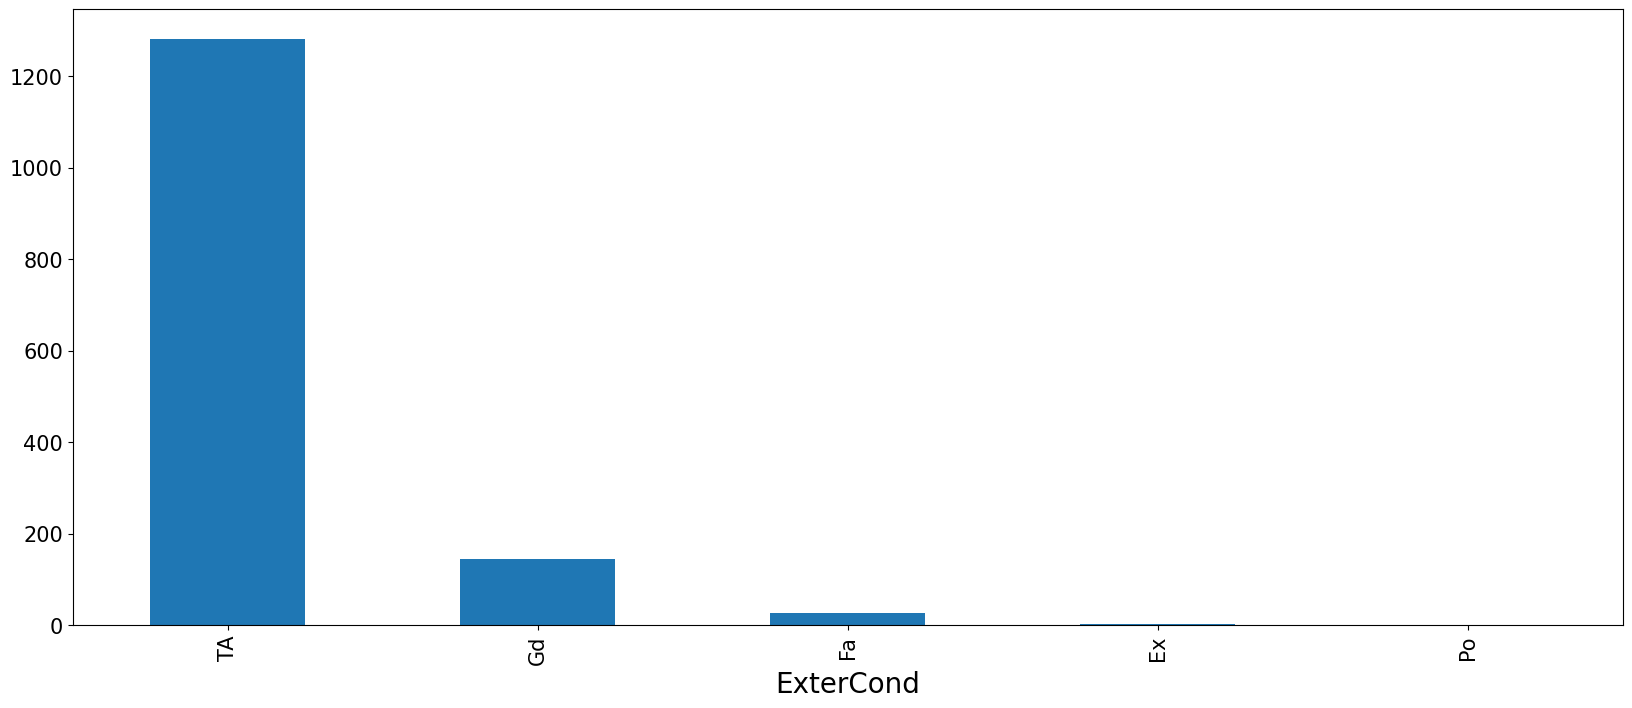

Foundation


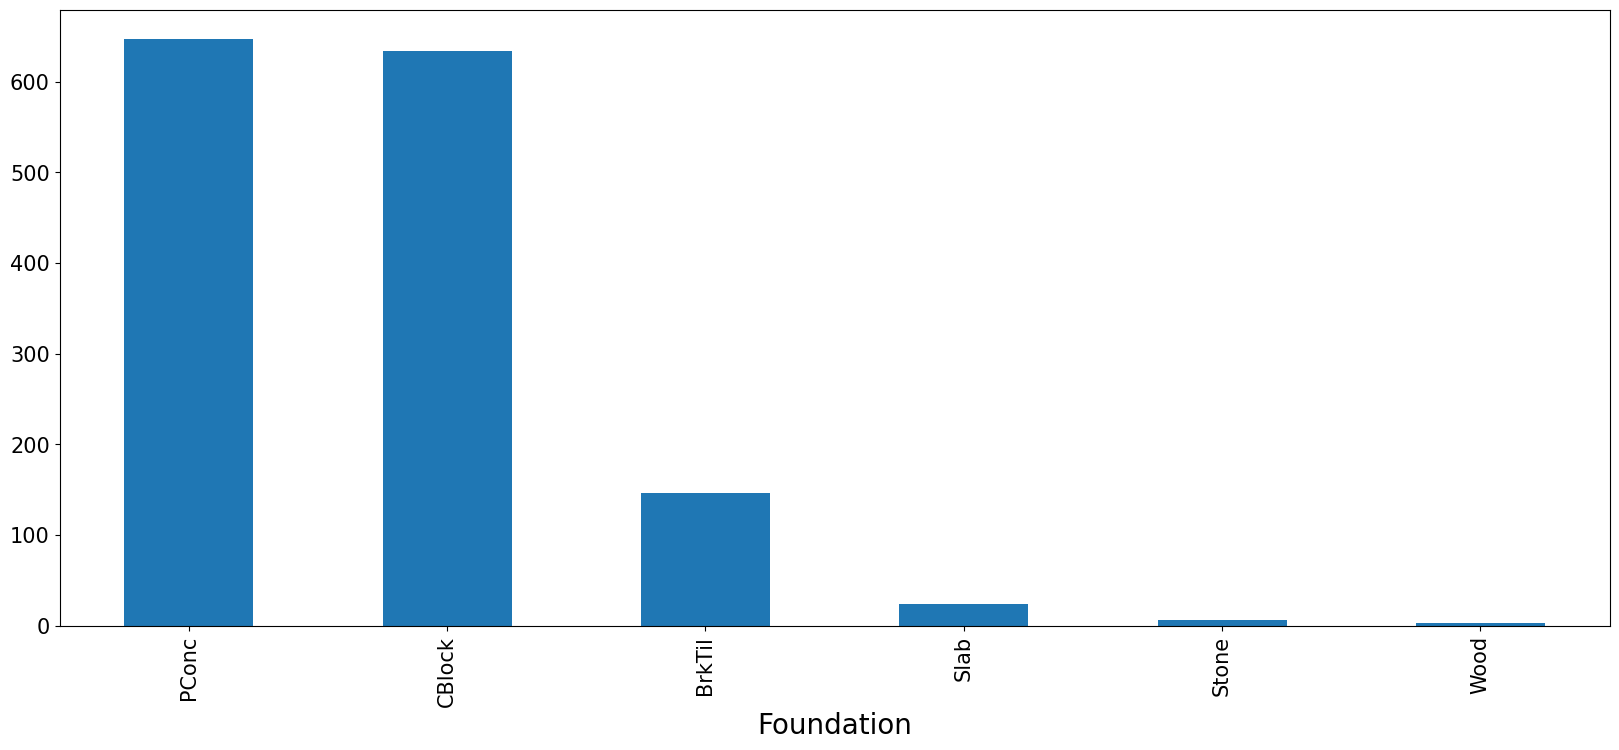

Heating


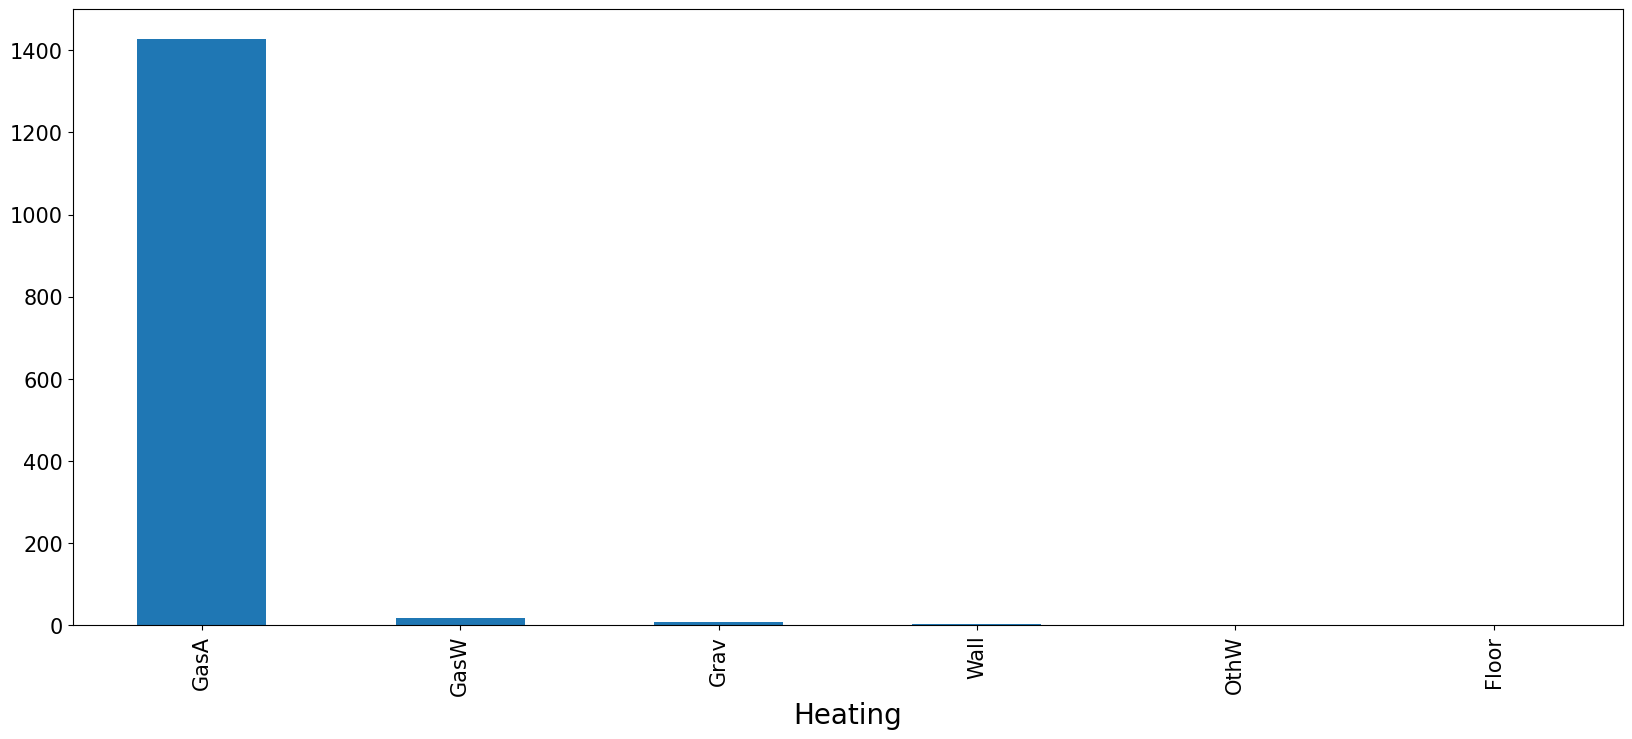

HeatingQC


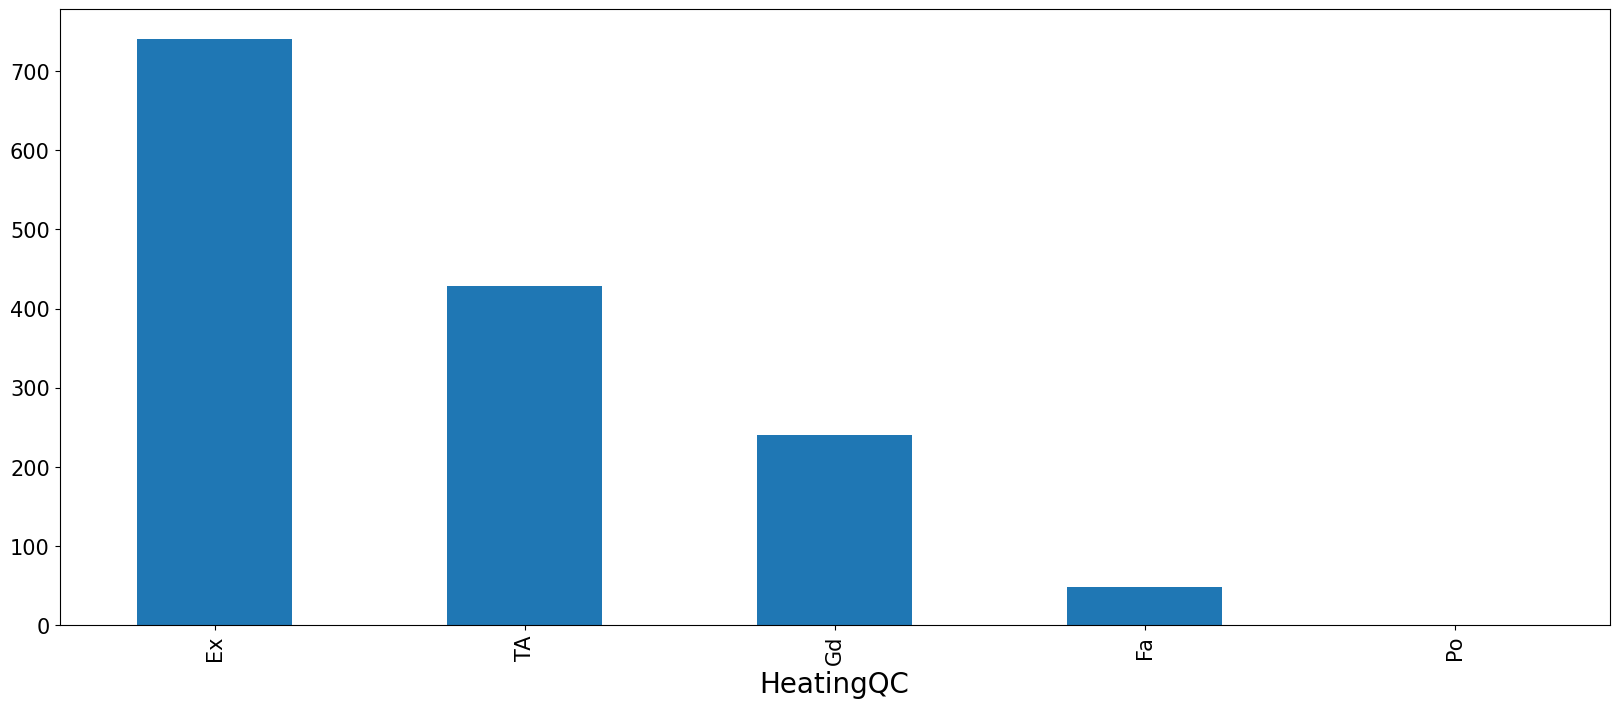

CentralAir


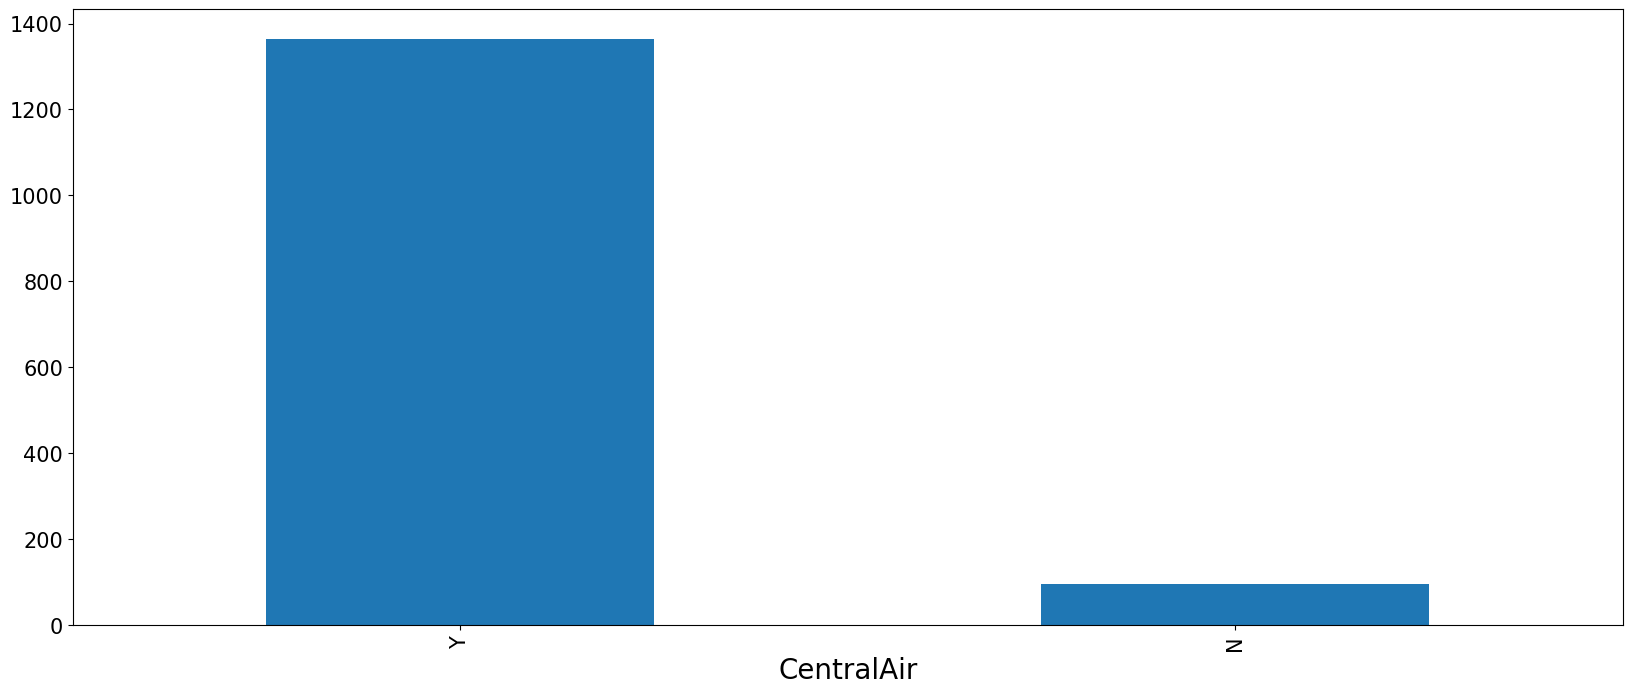

KitchenQual


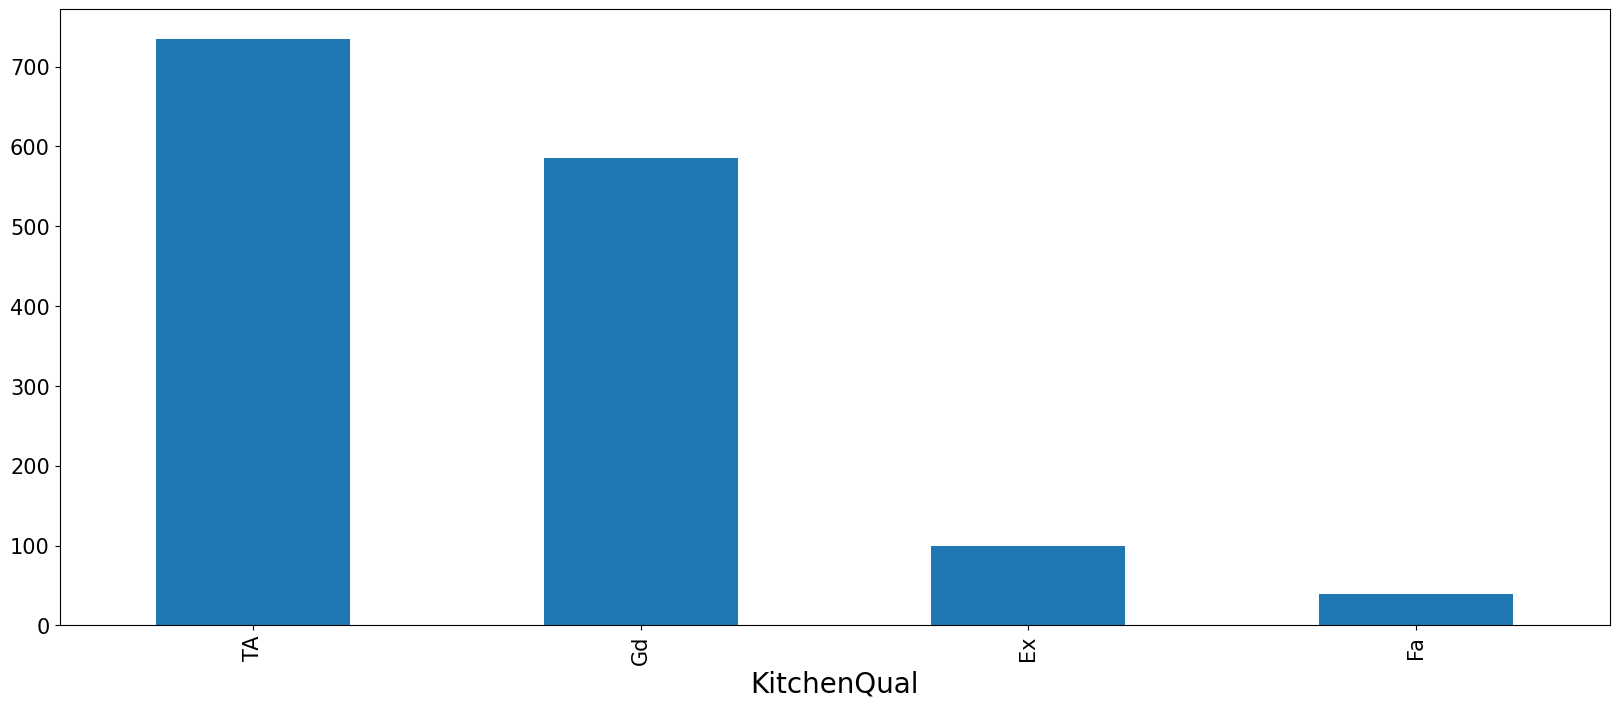

Functional


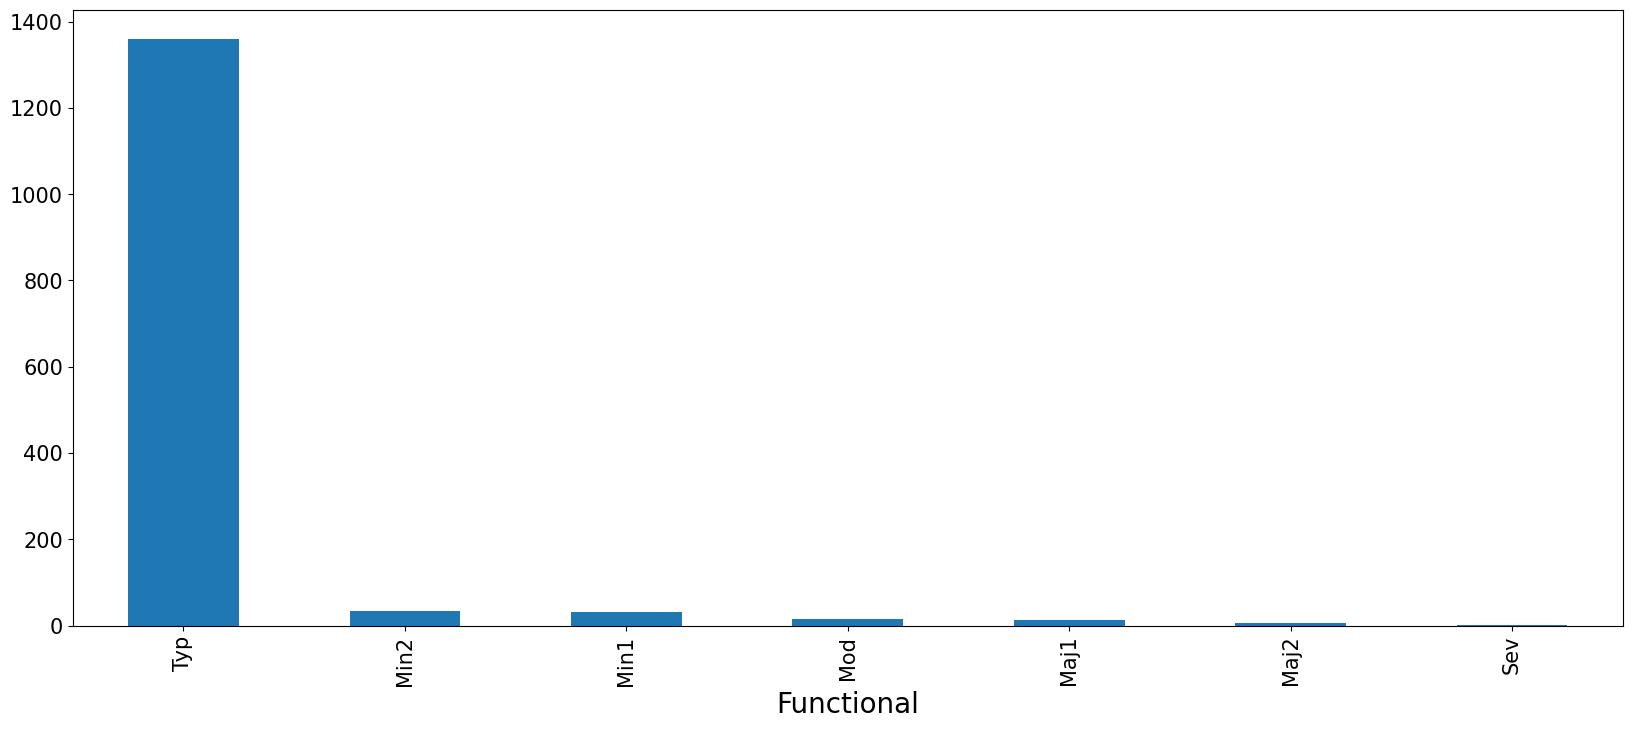

PavedDrive


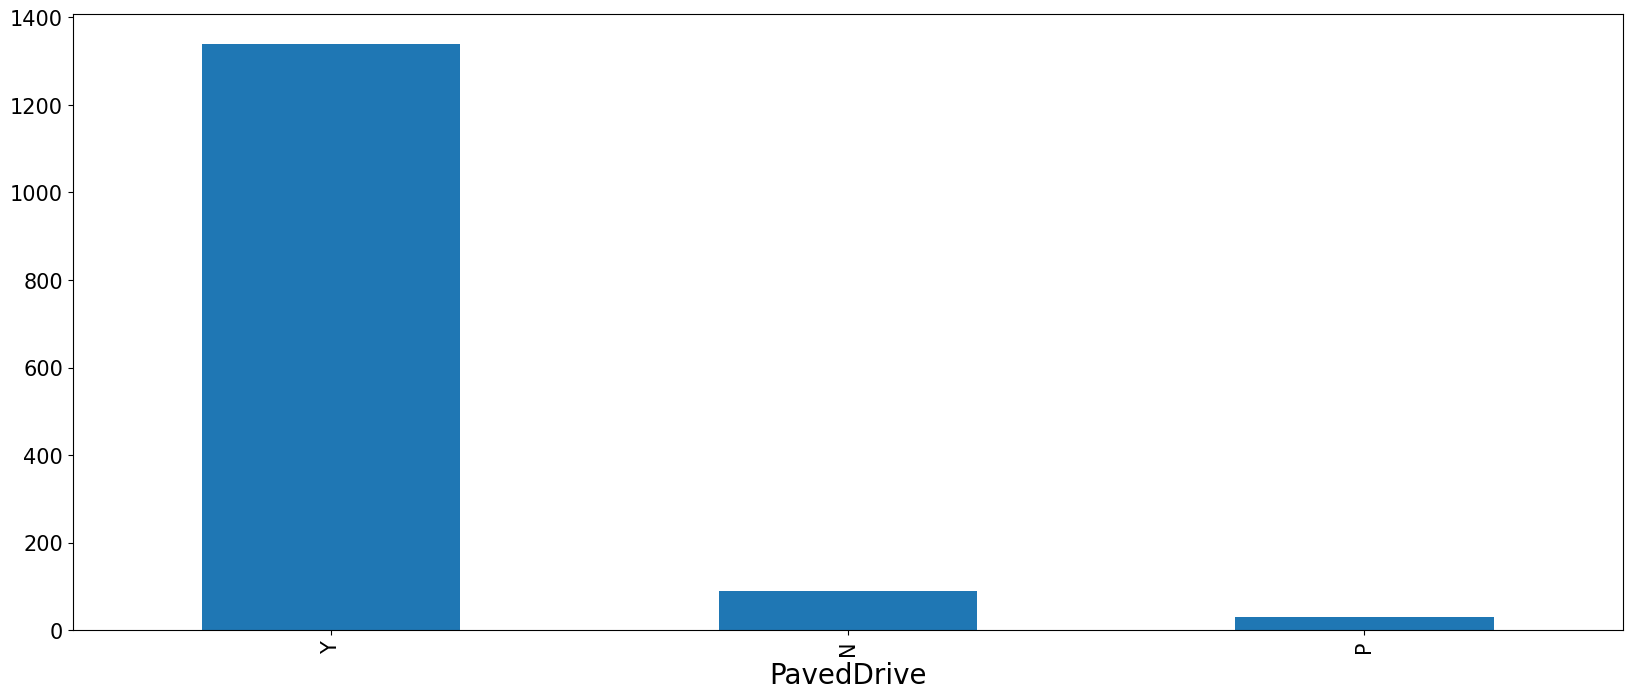

SaleType


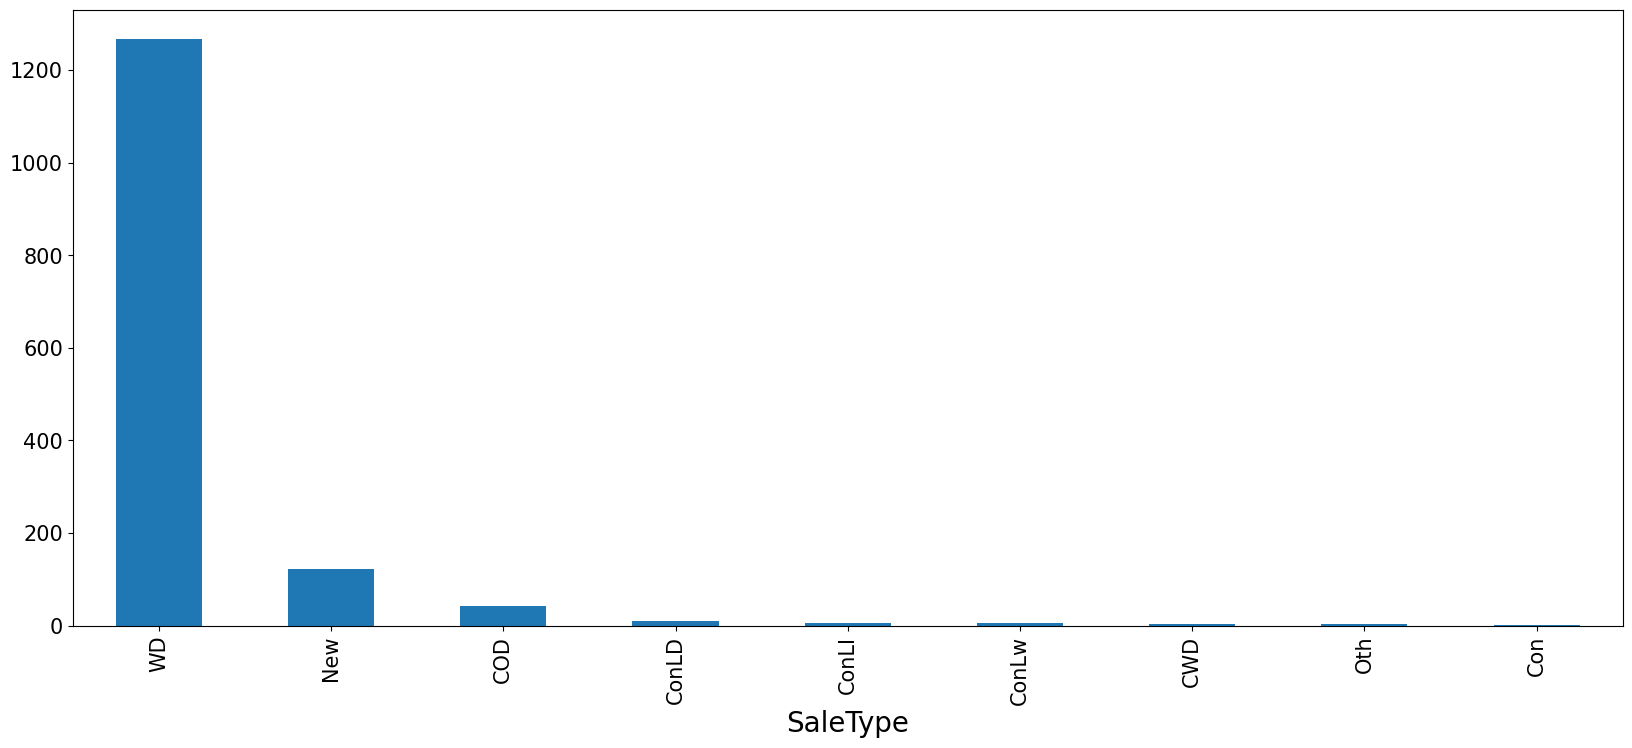

SaleCondition


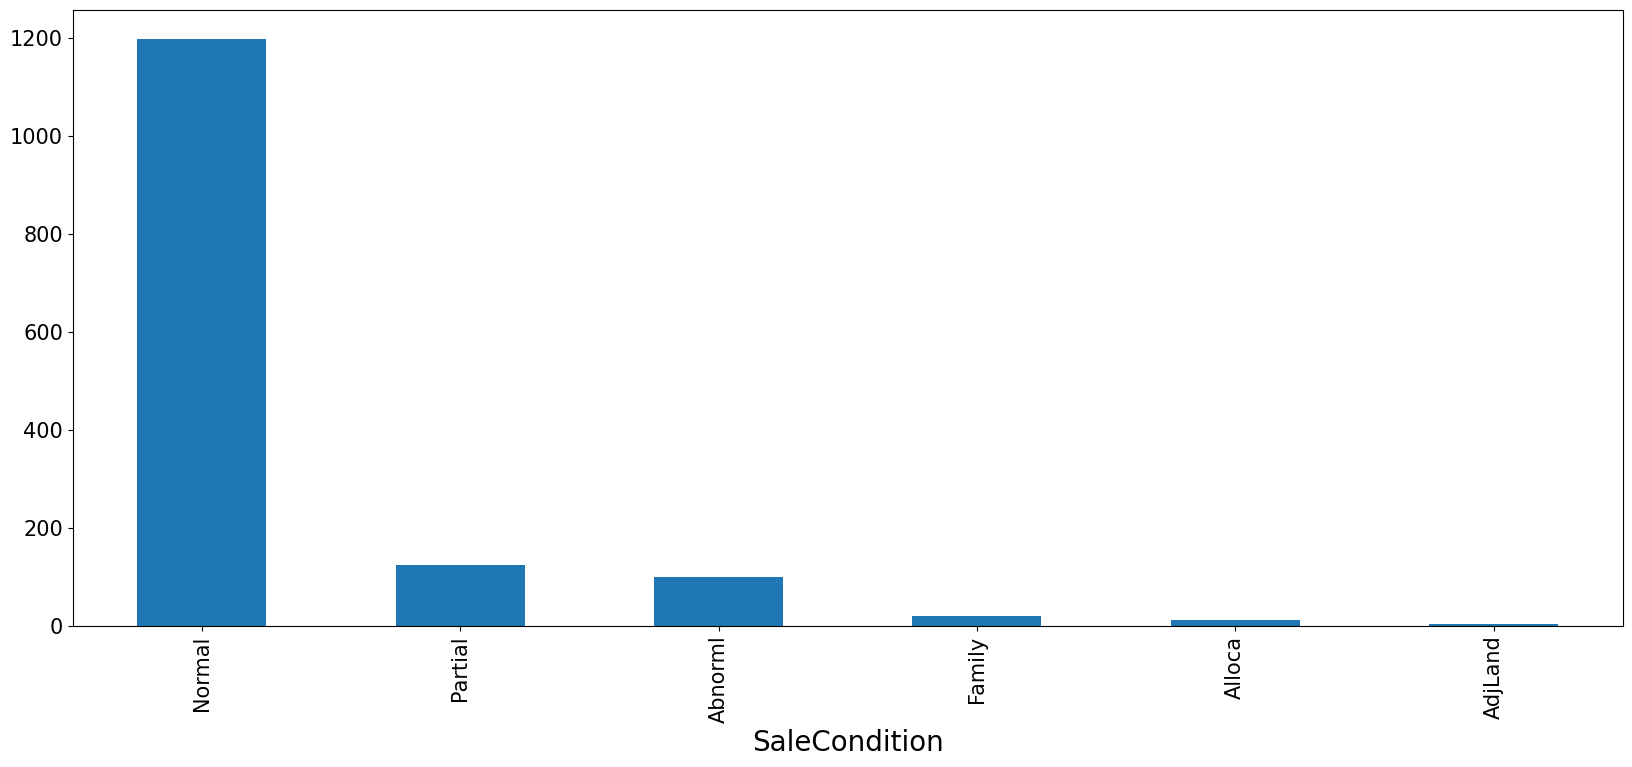

In [107]:
for i in nom_housing:
  nom_housing[i].value_counts().plot(kind='bar')
  print(i)
  plt.show()

In [112]:
cross = pd.crosstab(nom_housing['ExterQual'], nom_housing['ExterCond'])
cross

ExterCond  Ex  Fa   Gd  Po   TA
ExterQual                      
Ex          1   0    3   0   48
Fa          0   6    0   0    8
Gd          0   0   35   0  453
TA          2  22  108   1  773

<Axes: xlabel='ExterCond', ylabel='ExterQual'>

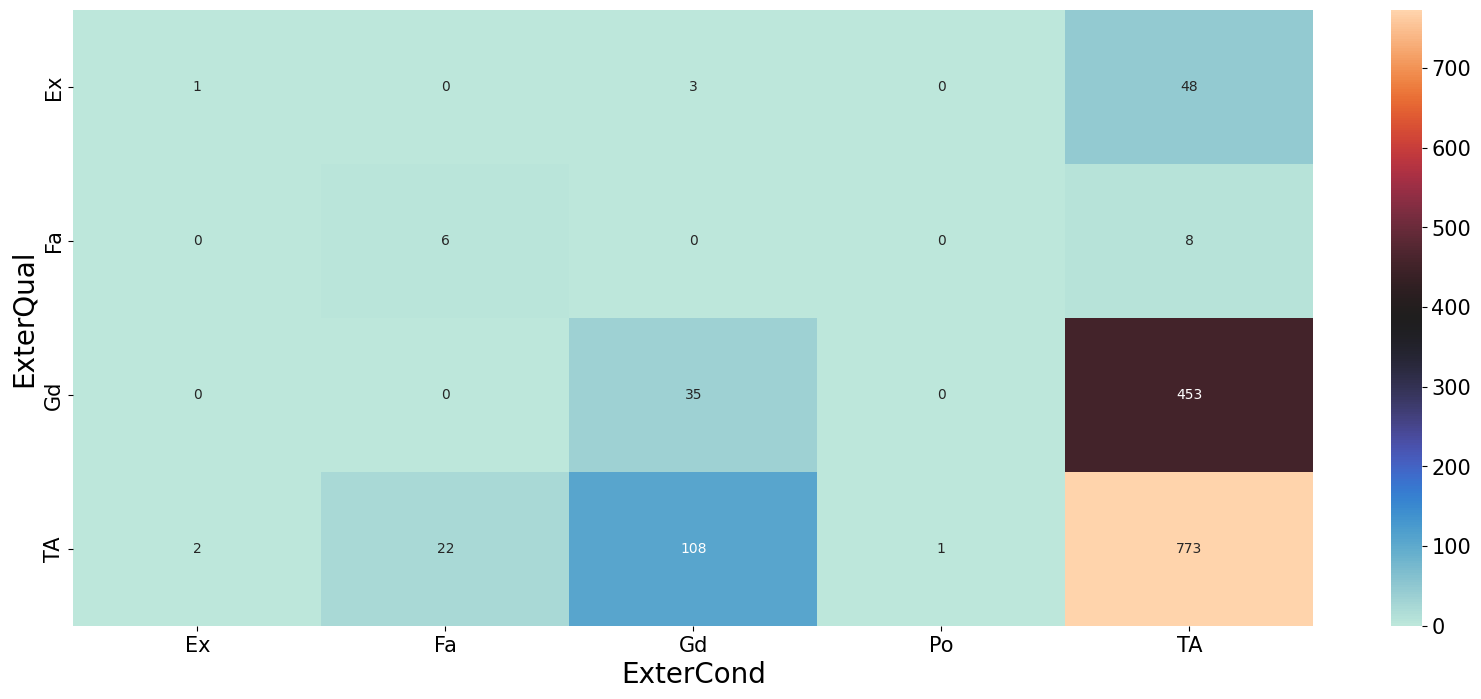

In [113]:
sns.heatmap(cross, annot=True, cmap='icefire', fmt='g')

In [114]:
cross = pd.crosstab(nom_housing['ExterQual'], nom_housing['ExterCond'])
st.chi2_contingency(cross)

Chi2ContingencyResult(statistic=np.float64(156.2895311162874), pvalue=np.float64(2.9908872405484838e-27), dof=12, expected_freq=array([[1.06849315e-01, 9.97260274e-01, 5.20000000e+00, 3.56164384e-02,
        4.56602740e+01],
       [2.87671233e-02, 2.68493151e-01, 1.40000000e+00, 9.58904110e-03,
        1.22931507e+01],
       [1.00273973e+00, 9.35890411e+00, 4.88000000e+01, 3.34246575e-01,
        4.28504110e+02],
       [1.86164384e+00, 1.73753425e+01, 9.06000000e+01, 6.20547945e-01,
        7.95542466e+02]]))

<Axes: >

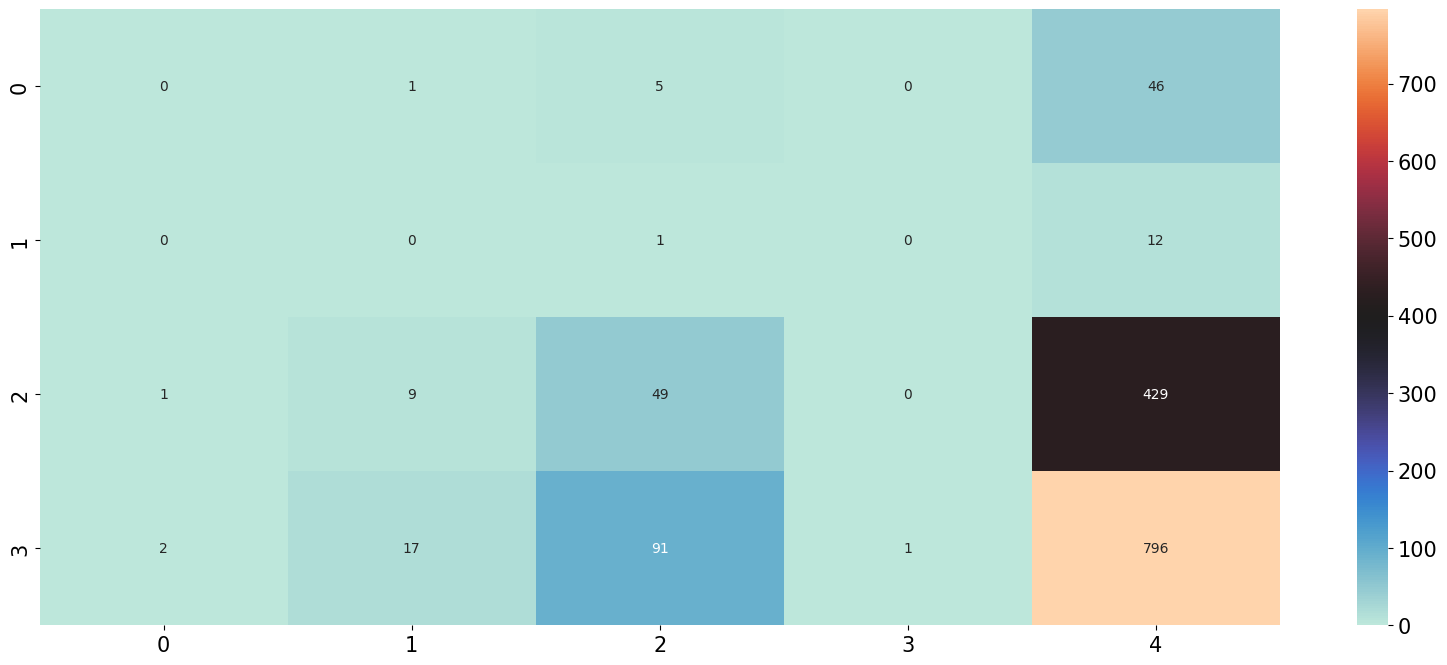

In [116]:
# showcase the result in a heatmap as well
cross_results = pd.DataFrame(st.chi2_contingency(cross)[3]).round()
# cross_results
sns.heatmap(cross_results, cmap='icefire', fmt='g', annot=True)

In [117]:
round(2.9908872405484838e-27)


0

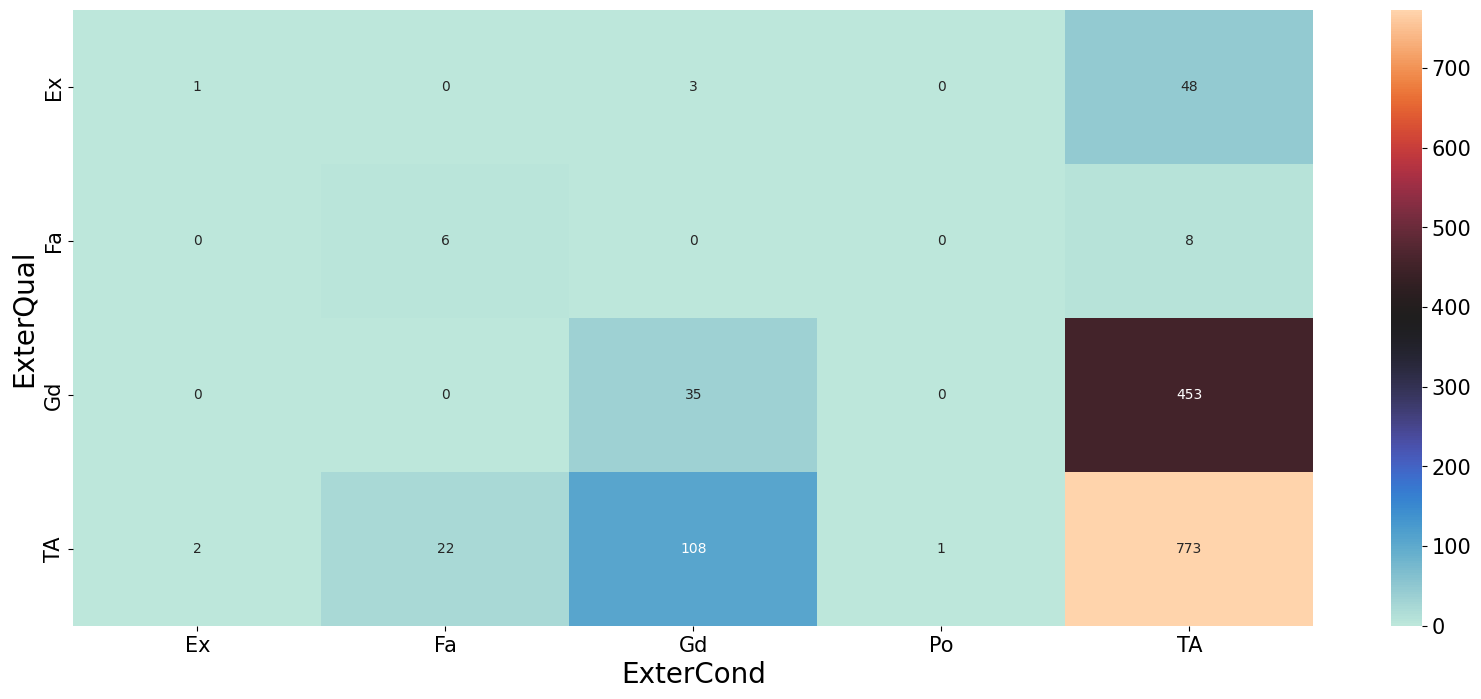

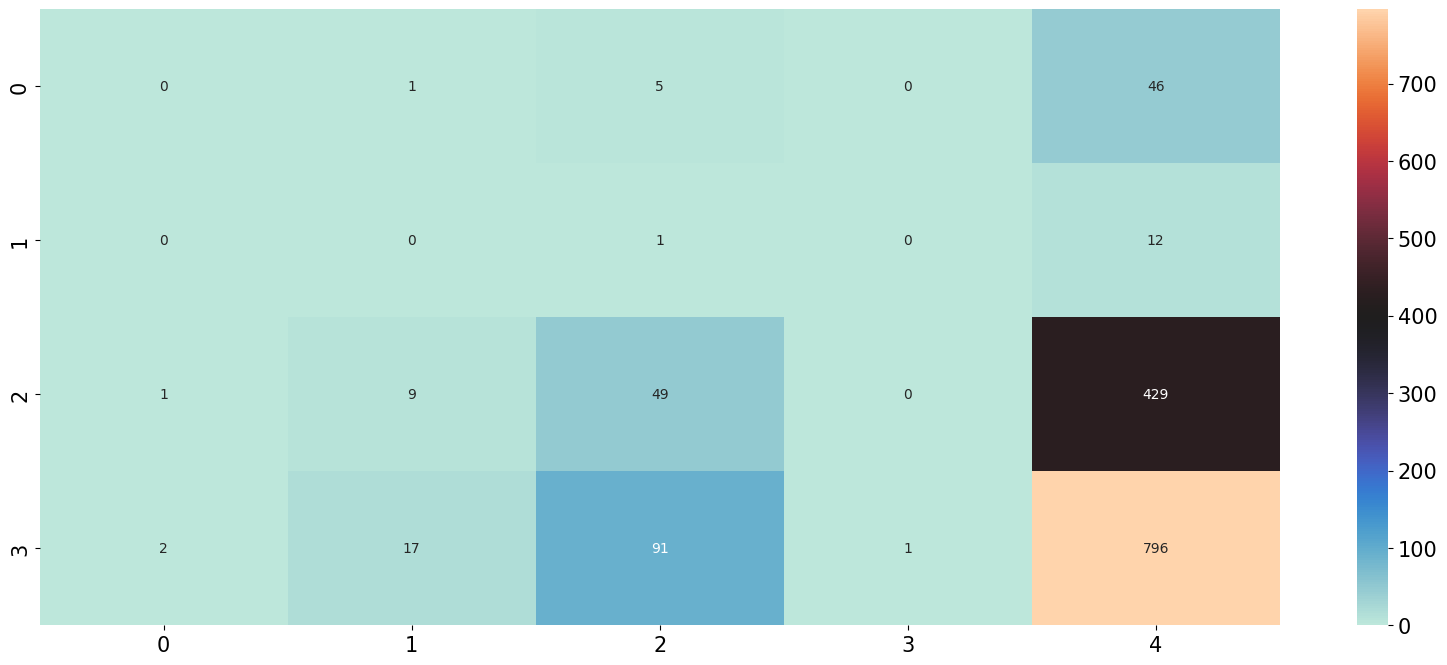

Features ExterQual & ExterCond are not independent of each other.


In [119]:
#build function
def contigency_tester(a, b):
  cross = pd.crosstab(nom_housing[a], nom_housing[b])
  results = st.chi2_contingency(cross)
  cross_results = pd.DataFrame(results[3]).round()
  sns.heatmap(cross, cmap='icefire', fmt='g', annot=True)
  plt.show()
  sns.heatmap(cross_results, cmap='icefire', fmt='g', annot=True)
  plt.show()

  if results[1] < 0.05:
    print(f"Features {a} & {b} are not independent of each other.")
  else:
    print("We fail to reject the null hypothesis.")

contigency_tester('ExterQual', 'ExterCond')

In [120]:
nom_housing.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

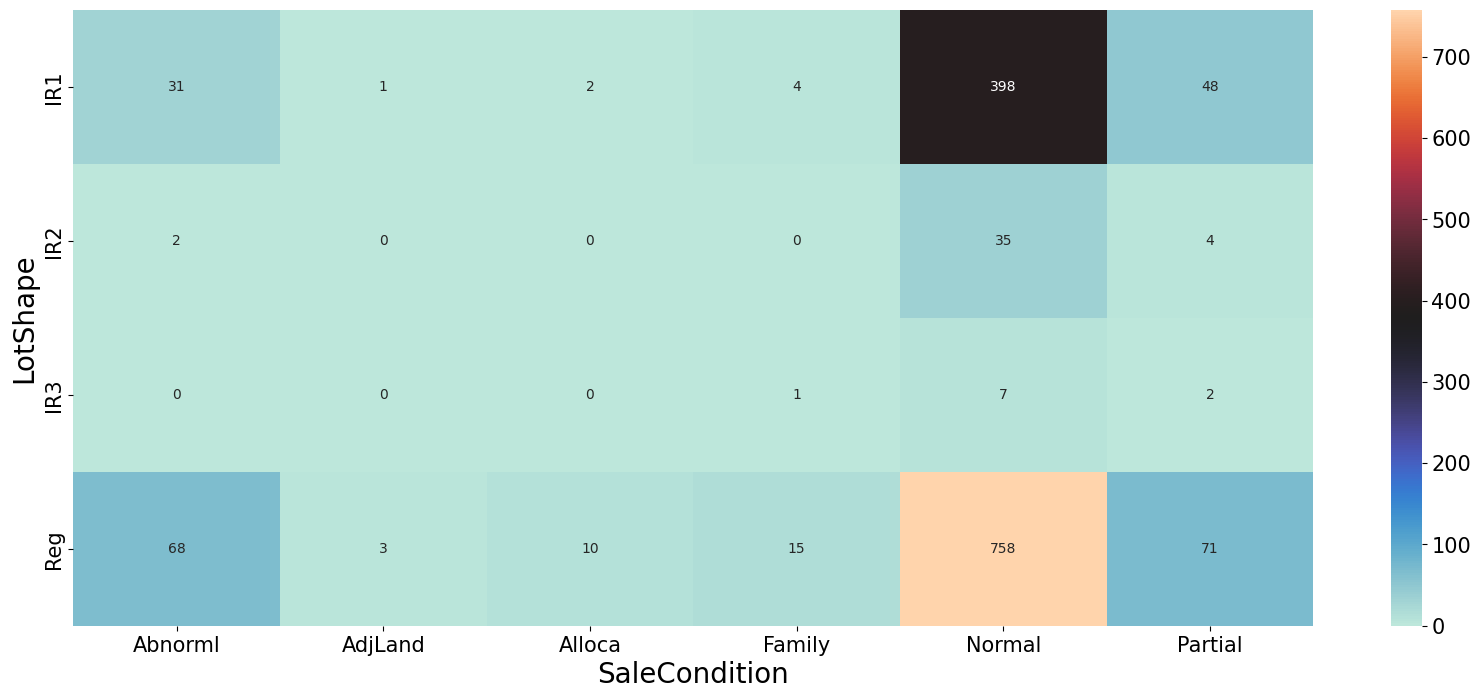

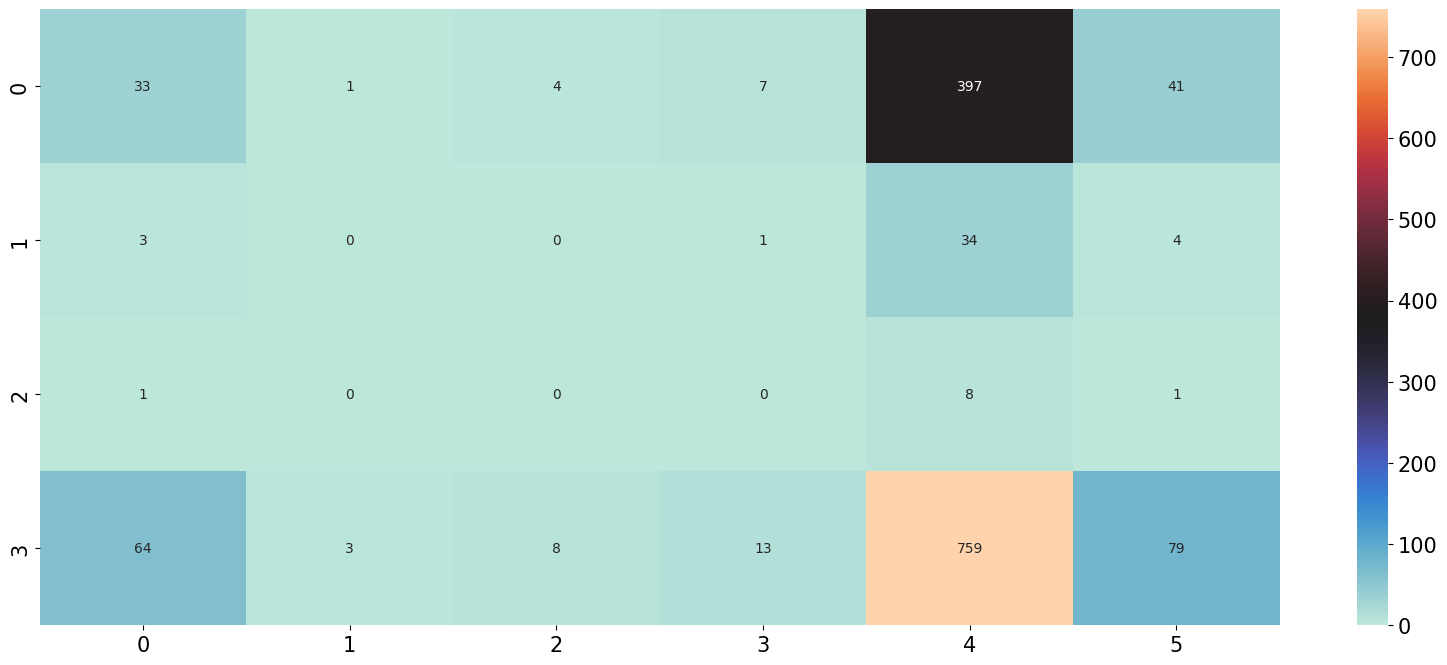

We fail to reject the null hypothesis.


In [121]:
# an example of a fail to reject
contigency_tester('LotShape', 'SaleCondition')

In [122]:
pvalues = {}
for i in nom_housing.columns:
  for j in nom_housing.columns:
    crosstab = pd.crosstab(nom_housing[i], nom_housing[j])
    pvalue_result = st.chi2_contingency(crosstab)[1]
    pvalues.update({f"{i} to {j}": pvalue_result})

In [123]:
pvalues

{'MSZoning to MSZoning': np.float64(0.0),
 'MSZoning to Street': np.float64(1.293331100878627e-19),
 'MSZoning to LotShape': np.float64(1.3596271487657125e-18),
 'MSZoning to LandContour': np.float64(6.221391677574749e-08),
 'MSZoning to Utilities': np.float64(0.9917472273613425),
 'MSZoning to LotConfig': np.float64(0.0008462386541660305),
 'MSZoning to LandSlope': np.float64(0.0033192548652162743),
 'MSZoning to Neighborhood': np.float64(0.0),
 'MSZoning to Condition1': np.float64(0.0012526063553187693),
 'MSZoning to Condition2': np.float64(0.010464552603100549),
 'MSZoning to BldgType': np.float64(1.7470289640148326e-38),
 'MSZoning to HouseStyle': np.float64(6.69732027767283e-33),
 'MSZoning to RoofStyle': np.float64(0.00016049868887920847),
 'MSZoning to RoofMatl': np.float64(0.9999974089619902),
 'MSZoning to Exterior1st': np.float64(1.0801339891685153e-24),
 'MSZoning to Exterior2nd': np.float64(4.408207736287896e-27),
 'MSZoning to ExterQual': np.float64(3.212044230788349e-49)

In [124]:
# let's clean up these results
pval_df = pd.DataFrame.from_dict(pvalues, orient = 'index').rename(columns={0:'values'})
pval_df

values
MSZoning to MSZoning            0.000000e+00
MSZoning to Street              1.293331e-19
MSZoning to LotShape            1.359627e-18
MSZoning to LandContour         6.221392e-08
MSZoning to Utilities           9.917472e-01
...                                      ...
SaleCondition to KitchenQual    1.445136e-36
SaleCondition to Functional     2.120077e-01
SaleCondition to PavedDrive     5.899112e-06
SaleCondition to SaleType       0.000000e+00
SaleCondition to SaleCondition  0.000000e+00

[729 rows x 1 columns]

In [125]:
# these all reject the null hypothesis (there is a relationship between the two variables)
pval_df[pval_df['values'] < 0.05].drop_duplicates()

values
MSZoning to MSZoning           0.000000e+00
MSZoning to Street             1.293331e-19
MSZoning to LotShape           1.359627e-18
MSZoning to LandContour        6.221392e-08
MSZoning to LotConfig          8.462387e-04
...                                     ...
SaleCondition to Neighborhood  5.576778e-43
SaleCondition to BldgType      3.332217e-23
SaleCondition to RoofStyle     6.468740e-08
SaleCondition to Exterior1st   2.028676e-28
SaleCondition to PavedDrive    5.899112e-06

[350 rows x 1 columns]

In [126]:
nom_housing.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [127]:
# simpler to know your target
pvalues = {}
for i in nom_housing.columns:
  crosstab = pd.crosstab(nom_housing[i], nom_housing['SaleCondition'])
  pvalue_result = st.chi2_contingency(crosstab)[1]
  pvalues.update({f"{i} to Sale Condition": pvalue_result})
pvalues

{'MSZoning to Sale Condition': np.float64(9.909275301032864e-18),
 'Street to Sale Condition': np.float64(0.0015941181470109059),
 'LotShape to Sale Condition': np.float64(0.44951400522655577),
 'LandContour to Sale Condition': np.float64(3.127842122859085e-08),
 'Utilities to Sale Condition': np.float64(0.019392451705845106),
 'LotConfig to Sale Condition': np.float64(0.1412358459106945),
 'LandSlope to Sale Condition': np.float64(0.16689881387109506),
 'Neighborhood to Sale Condition': np.float64(5.576778295496307e-43),
 'Condition1 to Sale Condition': np.float64(0.7515056962768671),
 'Condition2 to Sale Condition': np.float64(0.7173338972676411),
 'BldgType to Sale Condition': np.float64(3.332216625027881e-23),
 'HouseStyle to Sale Condition': np.float64(1.626510734741343e-06),
 'RoofStyle to Sale Condition': np.float64(6.46874040763e-08),
 'RoofMatl to Sale Condition': np.float64(0.008029726968023709),
 'Exterior1st to Sale Condition': np.float64(2.028676077157548e-28),
 'Exterior2

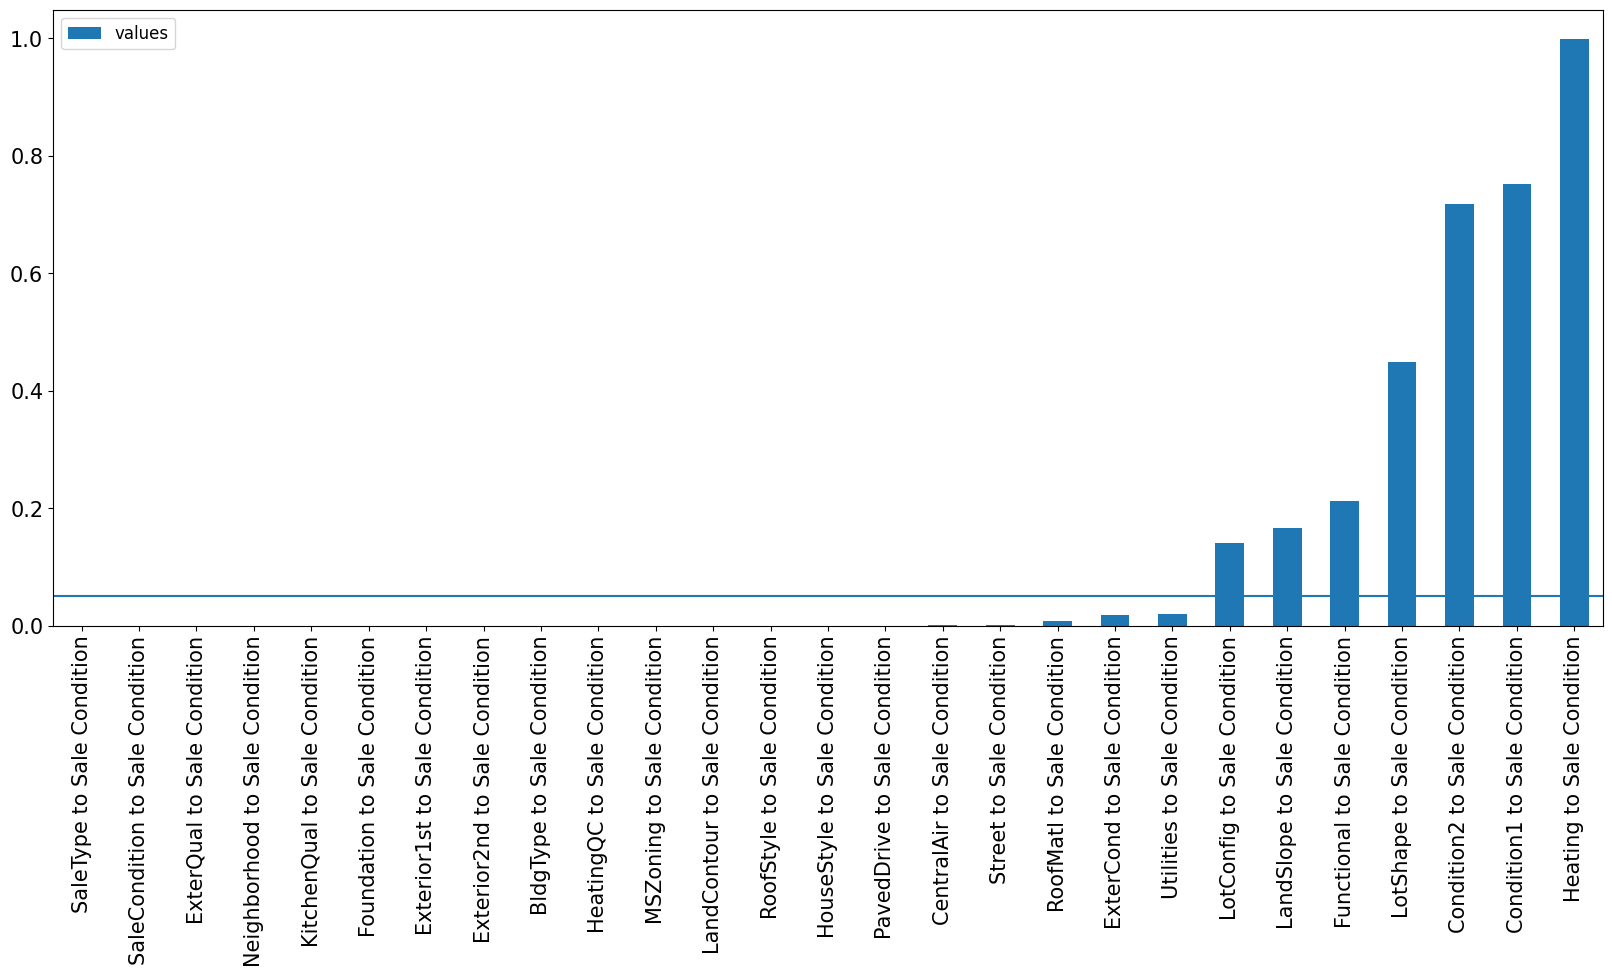

In [130]:
pval_df = pd.DataFrame.from_dict(pvalues, orient = 'index').rename(columns={0:'values'})
pval_df.sort_values(by='values').plot(kind='bar')
plt.axhline(0.05)

<font color = 'orange'>

# <font color='orange'>STOP HERE

## Predict house prices

### Correlation and Simple Linear Regression



In [82]:
#find the highest correlated value
plt.figure(figsize=(4, 14))
highest_corr = df_train.corr()['SalePrice'].sort_values(ascending = False)[:10]
highest_corr

SalePrice            1.000000
OverallQual          0.806088
Total_Square_Feet    0.776413
GrLivArea            0.728957
Total_Bath           0.675634
GarageCars           0.650555
1stFlrSF             0.609405
SqFtPerRoom          0.587587
YearBuilt            0.585239
FullBath             0.583515
Name: SalePrice, dtype: float64

<Figure size 400x1400 with 0 Axes>

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

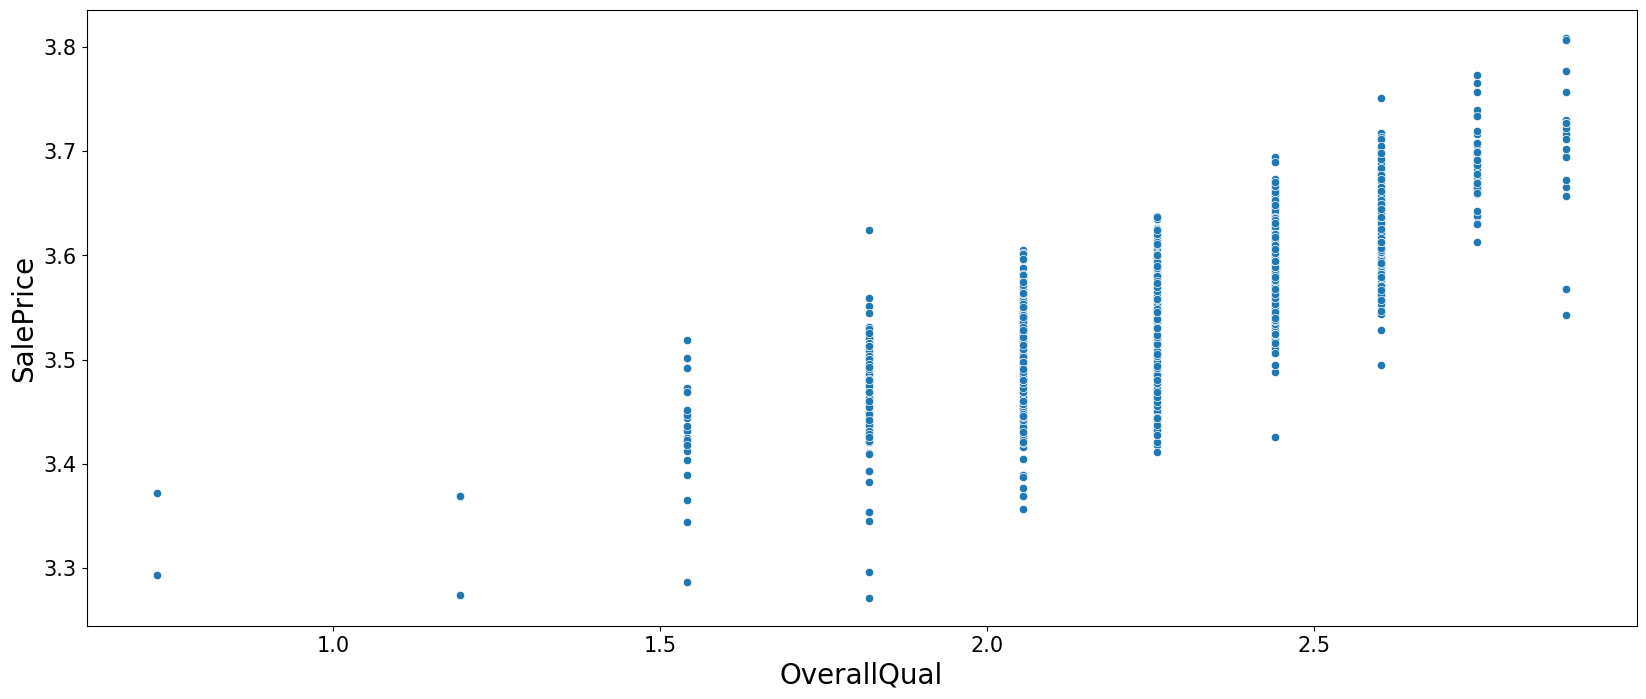

In [83]:
sns.scatterplot(x= 'OverallQual', y = 'SalePrice', data=df_train)

<Axes: xlabel='Total_Square_Feet', ylabel='SalePrice'>

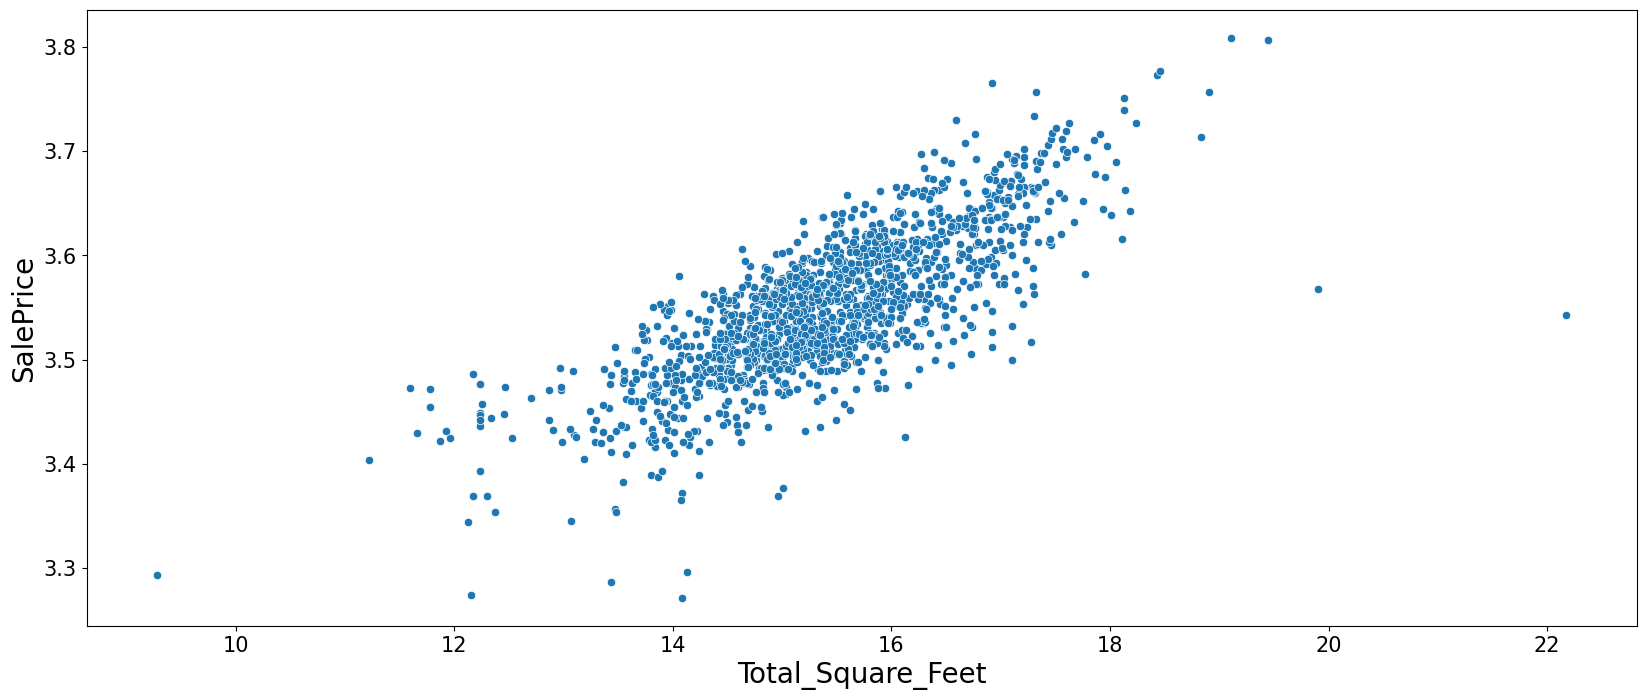

In [84]:
sns.scatterplot(x= 'Total_Square_Feet', y = 'SalePrice', data=df_train)

In [85]:
# target variable is SalePrice
y = df_train['SalePrice']

#target value is...
X = df_train['Total_Square_Feet']

In [86]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.018e+05
Date:                Wed, 02 Jul 2025   Prob (F-statistic):                        0.00
Time:                        15:48:36   Log-Likelihood:                          182.48
No. Observations:                1460   AIC:                                     -363.0
Df Residuals:                    1459   BIC:                                     -357.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [87]:
#note the error [2] above, add a constant
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2213.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          1.24e-294
Time:                        15:48:36   Log-Likelihood:                 2492.4
No. Observations:                1460   AIC:                            -4981.
Df Residuals:                    1458   BIC:                            -4970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.8215      0.01

In [88]:
highest_corr.index

Index(['SalePrice', 'OverallQual', 'Total_Square_Feet', 'GrLivArea',
       'Total_Bath', 'GarageCars', '1stFlrSF', 'SqFtPerRoom', 'YearBuilt',
       'FullBath'],
      dtype='object')

In [89]:
#model results and r_squared
for i in highest_corr.index:
    X = df_train[i]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
#    print(model.summary())
    print(f"{i}:, {model.rsquared_adj}")

SalePrice:, 1.0
OverallQual:, 0.6495370919102863
Total_Square_Feet:, 0.6025446764108009
GrLivArea:, 0.5310564456244624
Total_Bath:, 0.45610798607561
GarageCars:, 0.4228267859539032
1stFlrSF:, 0.37094315794802724
SqFtPerRoom:, 0.3448088734107364
YearBuilt:, 0.3420540422176218
FullBath:, 0.340037199285981


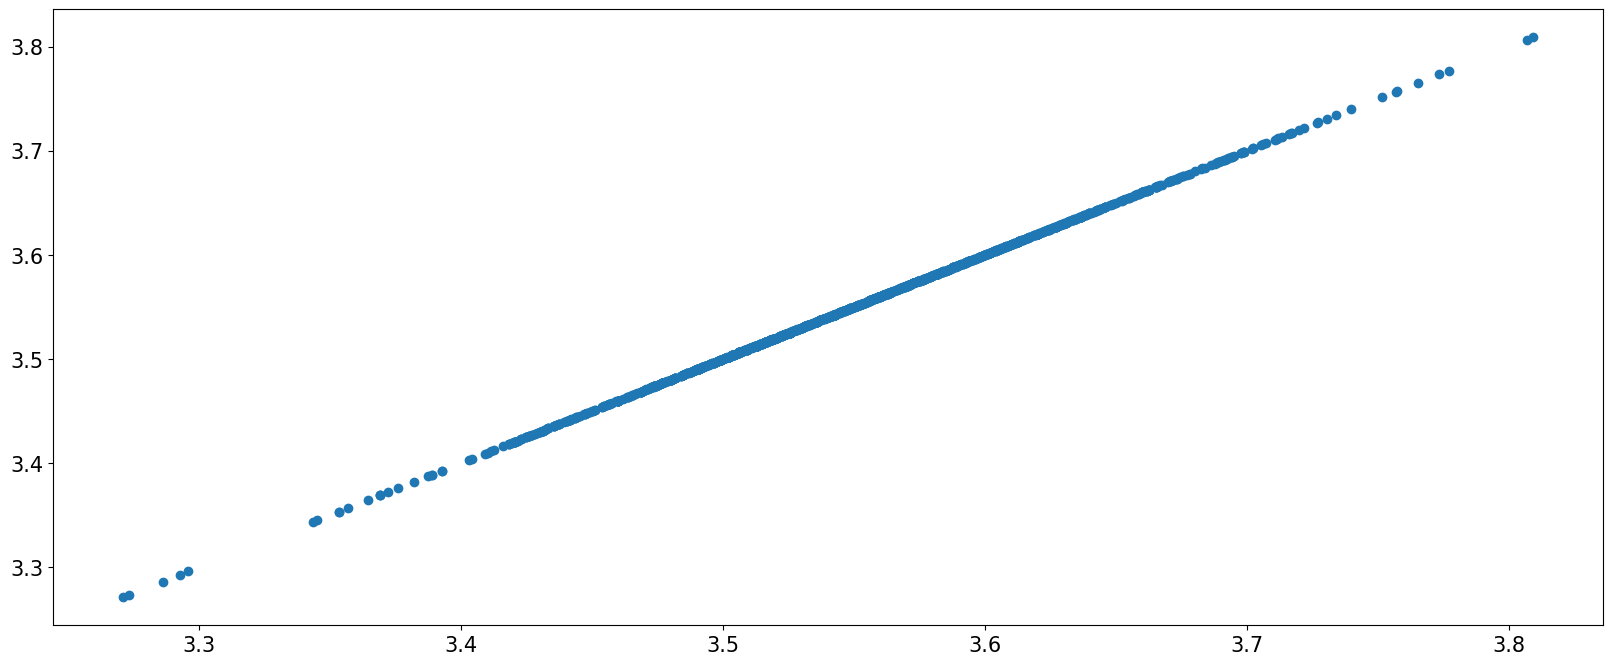

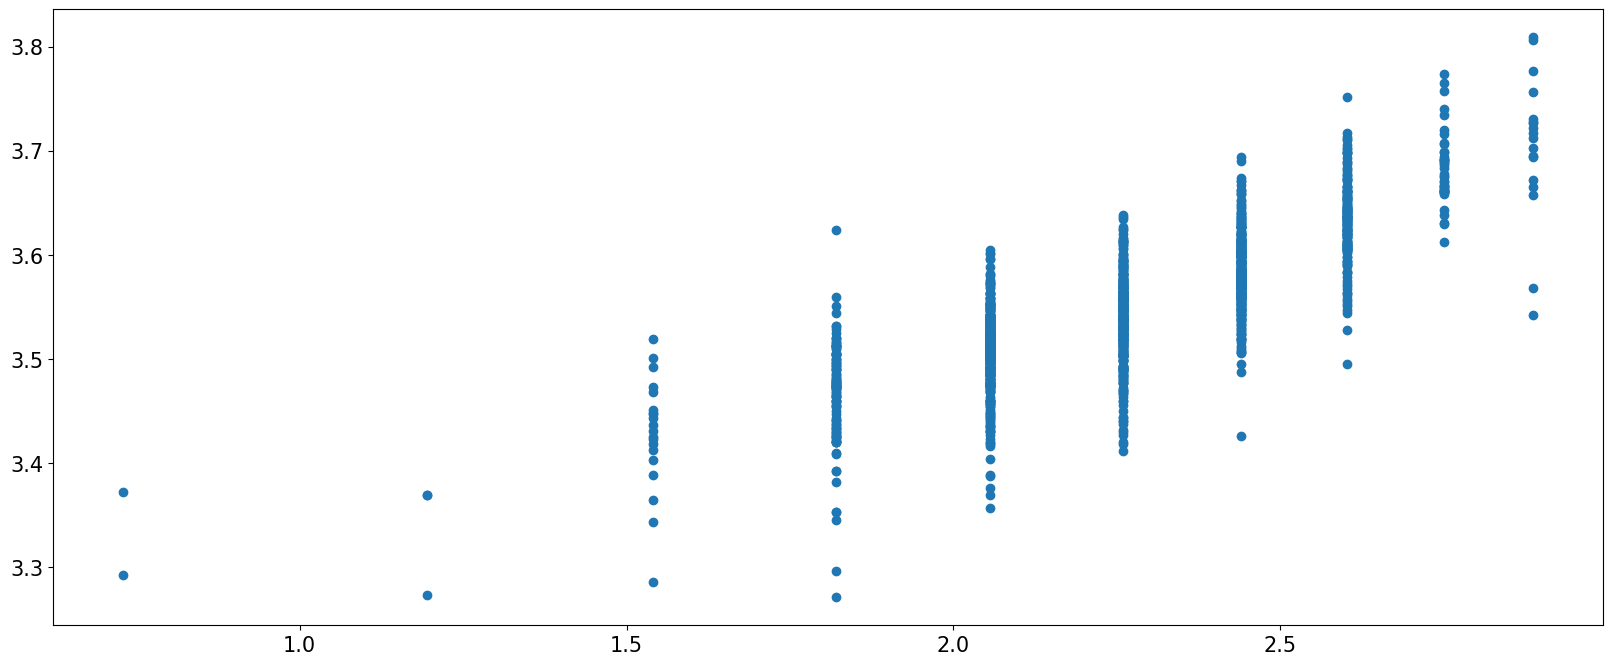

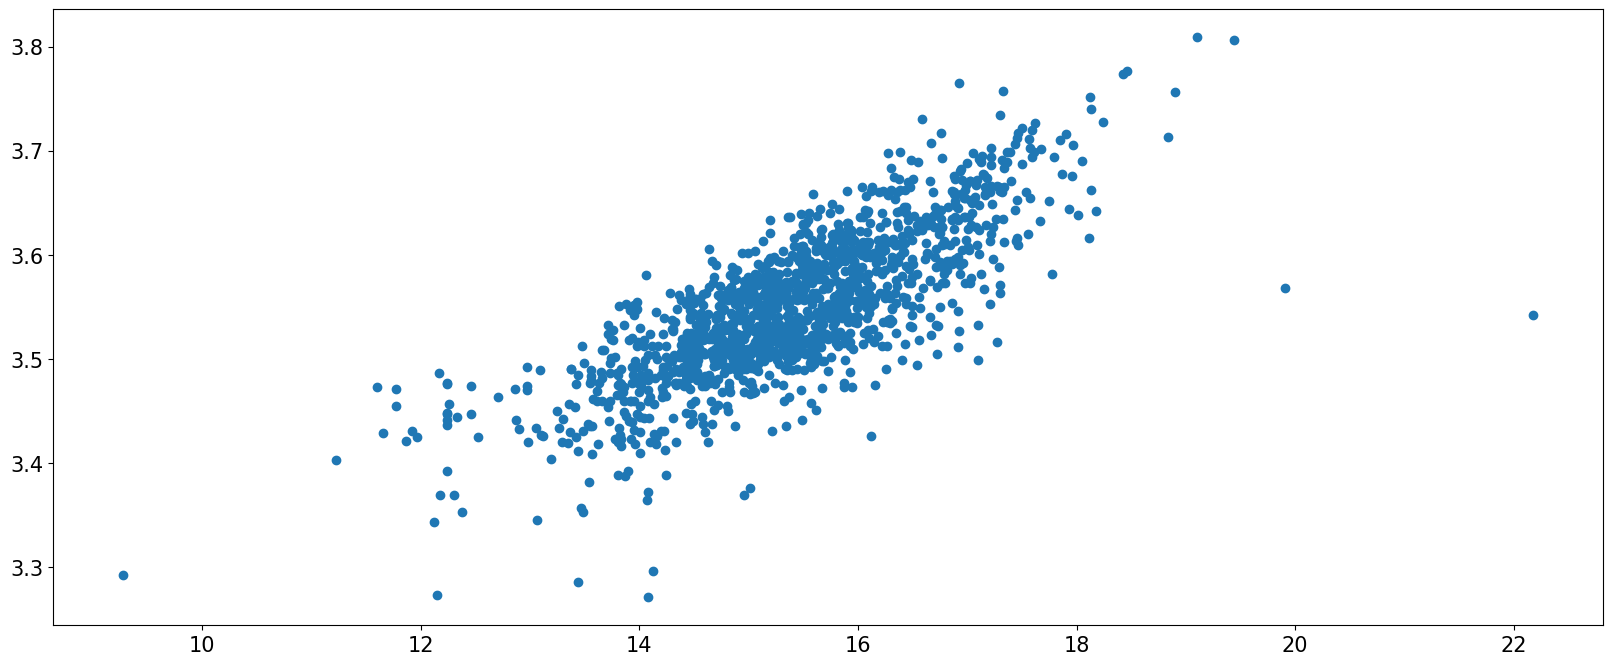

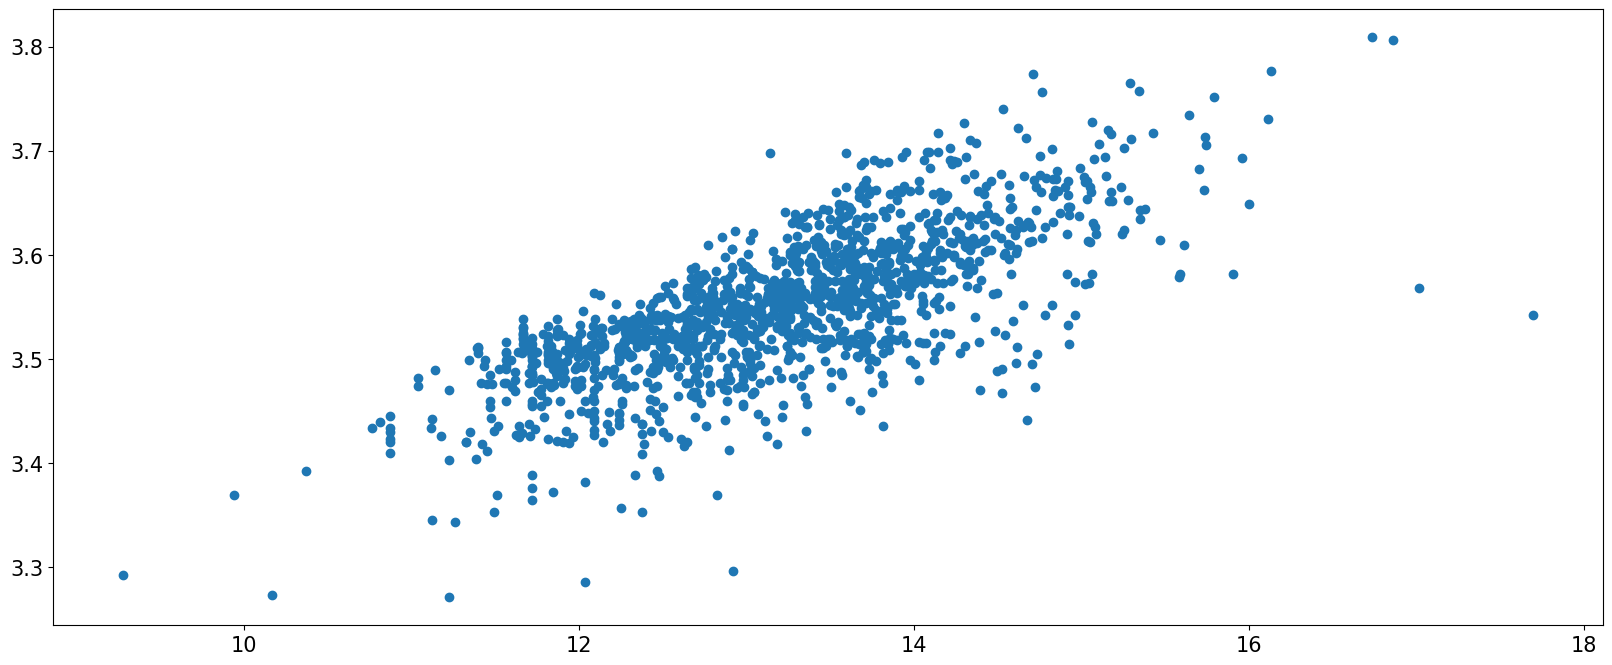

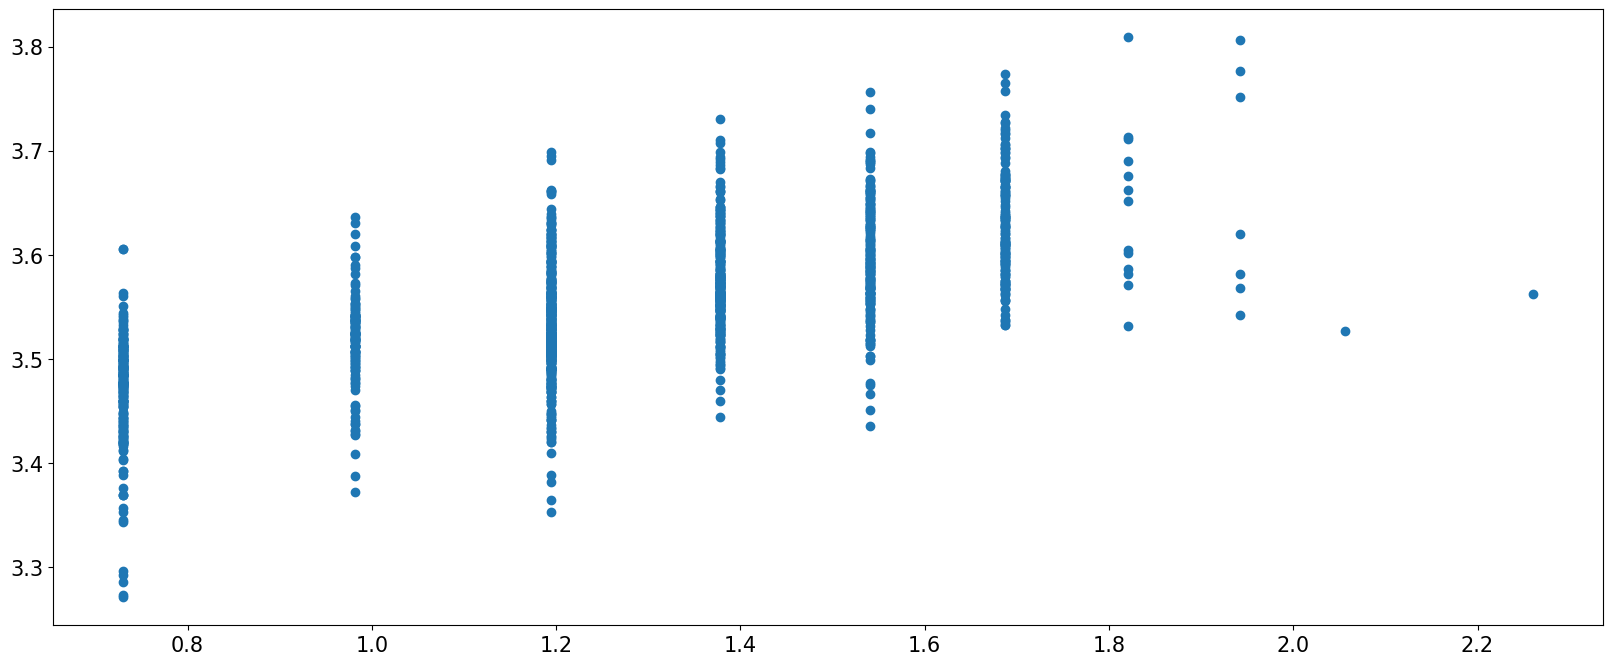

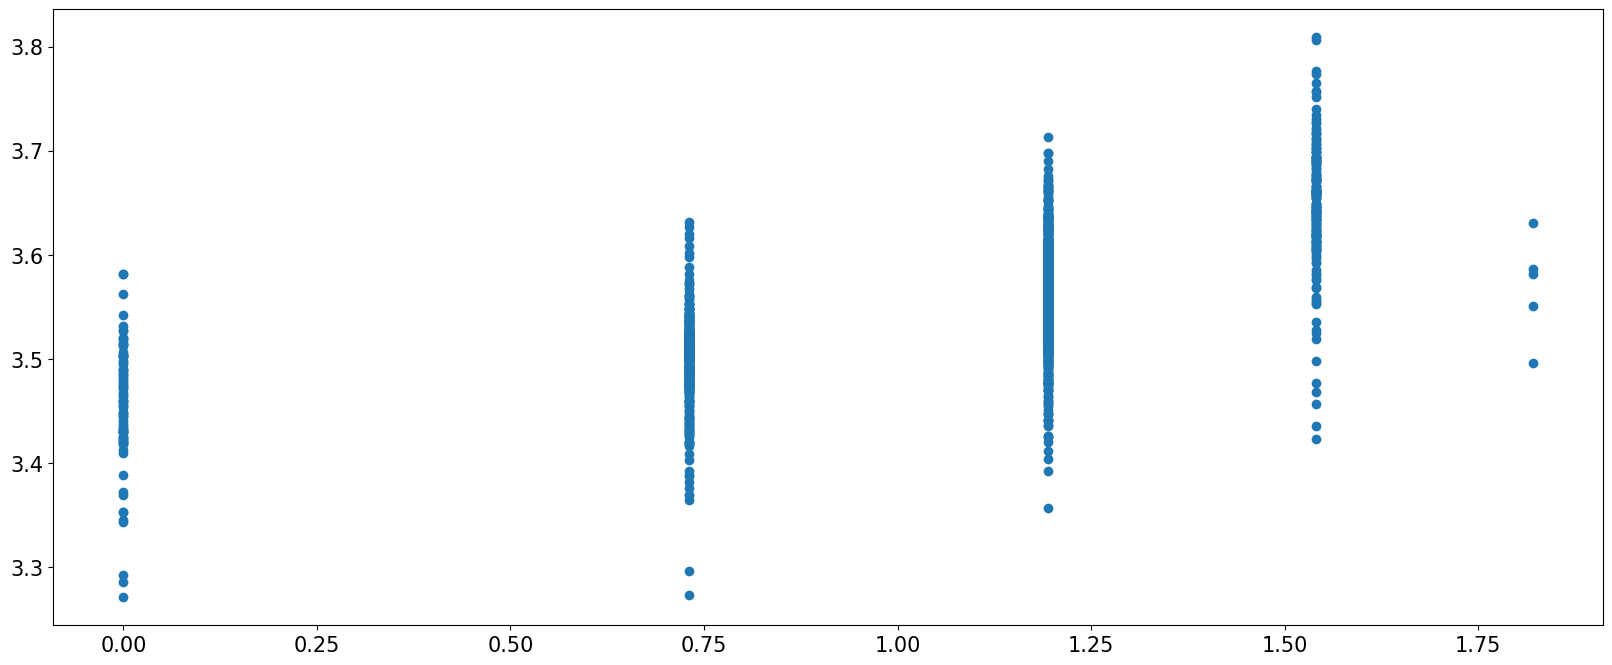

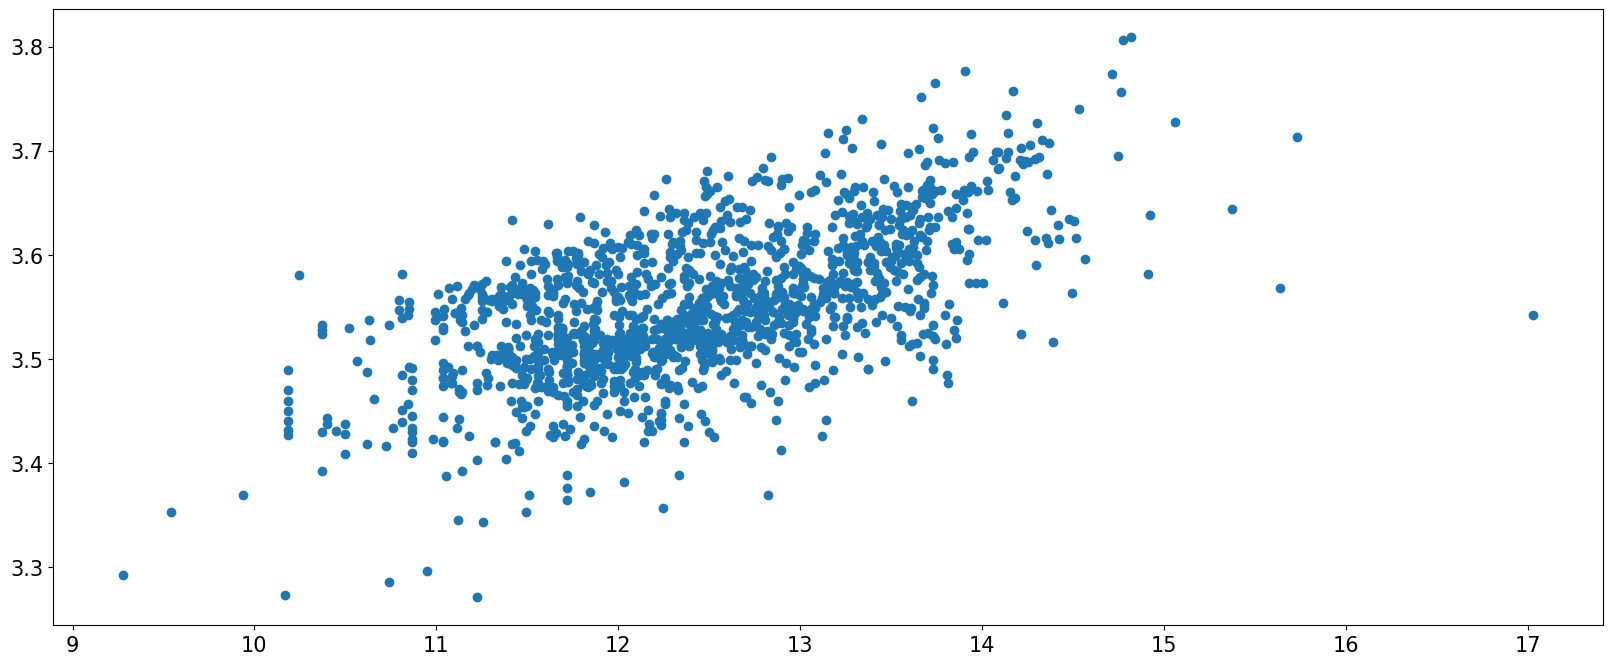

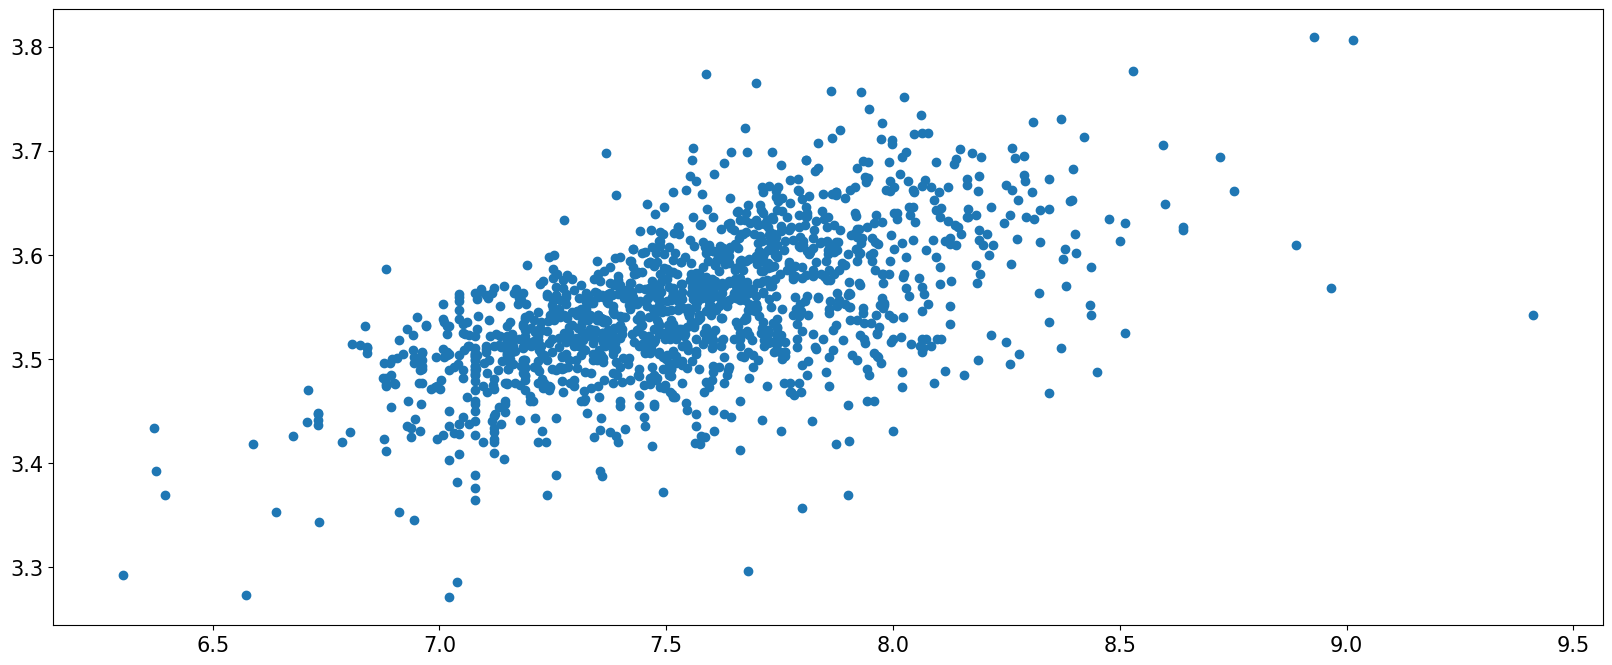

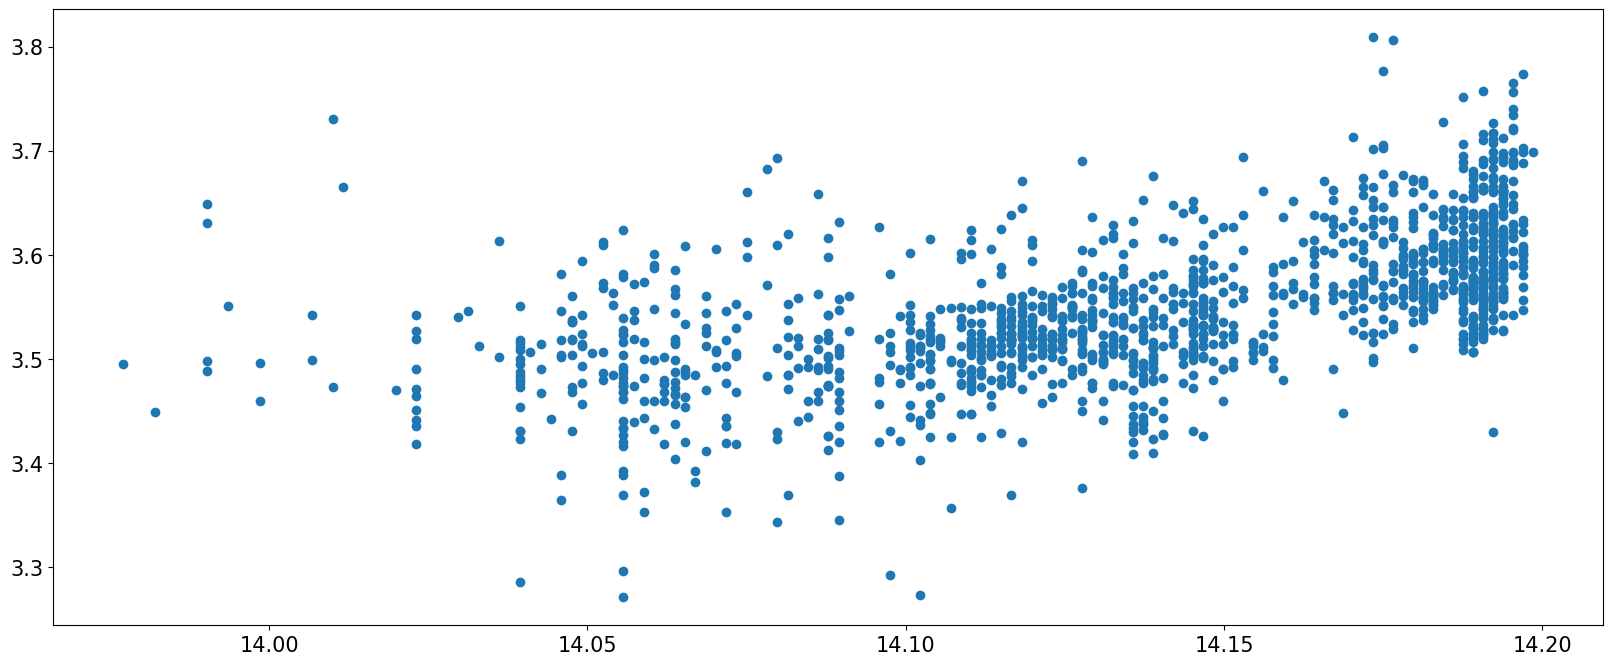

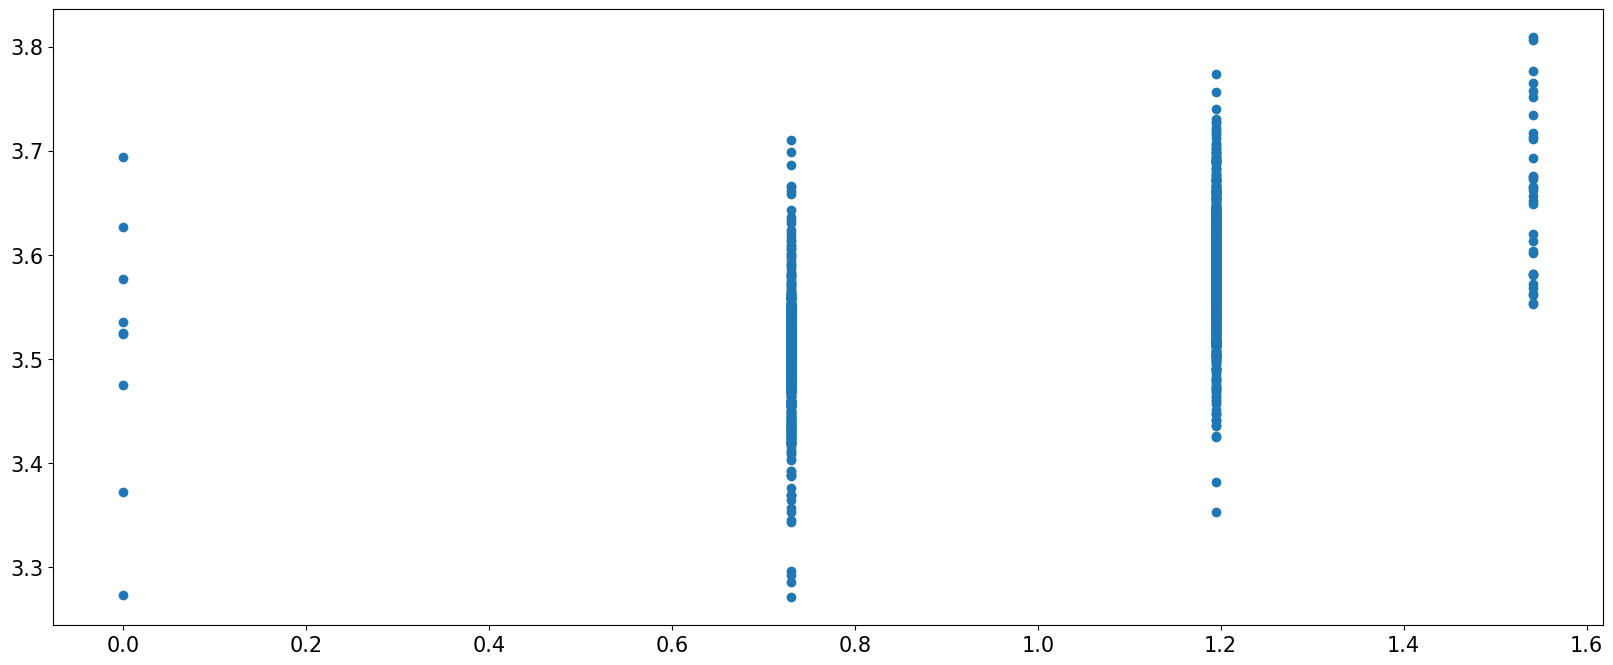

In [90]:
for i in highest_corr.index:
    plt.scatter(df_train[i], df_train['SalePrice'])
    plt.show()

In [91]:
#find the highest correlated value without accounting for abs
plt.figure(figsize=(4, 14))
highest_corr = df_train.corr()['SalePrice'].sort_values(ascending = False)[:20]
highest_corr

SalePrice            1.000000
OverallQual          0.806088
Total_Square_Feet    0.776413
GrLivArea            0.728957
Total_Bath           0.675634
GarageCars           0.650555
1stFlrSF             0.609405
SqFtPerRoom          0.587587
YearBuilt            0.585239
FullBath             0.583515
YearRemodAdd         0.566010
TotRmsAbvGrd         0.539781
Foundation_PConc     0.530551
GarageArea           0.510646
Fireplaces           0.506936
OpenPorchSF          0.454515
TotalBsmtSF          0.452692
MasVnrArea           0.422809
GarageType_Attchd    0.416985
LotArea              0.398697
Name: SalePrice, dtype: float64

<Figure size 400x1400 with 0 Axes>

In [92]:
#find the highest correlated value while accounting for abs
plt.figure(figsize=(4, 14))
highest_corr = np.abs(df_train.corr()['SalePrice']).sort_values(ascending = False)[:20]
highest_corr

SalePrice            1.000000
OverallQual          0.806088
Total_Square_Feet    0.776413
GrLivArea            0.728957
Total_Bath           0.675634
GarageCars           0.650555
1stFlrSF             0.609405
SqFtPerRoom          0.587587
YearBuilt            0.585239
FullBath             0.583515
BsmtQual             0.577796
YearRemodAdd         0.566010
ExterQual            0.540375
TotRmsAbvGrd         0.539781
Foundation_PConc     0.530551
GarageArea           0.510646
Fireplaces           0.506936
KitchenQual          0.506426
OpenPorchSF          0.454515
TotalBsmtSF          0.452692
Name: SalePrice, dtype: float64

<Figure size 400x1400 with 0 Axes>

### Multiple Linear Regression using Statsmodels

In [93]:
X = df_train[highest_corr.index.drop('SalePrice')]
y = df_train['SalePrice']

In [94]:
import statsmodels.api as sm

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X.values

In [ ]:
high_vif = pd.DataFrame()
high_vif['col_name'] = X.columns
high_vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
high_vif

In [ ]:
low_col = high_vif[high_vif['vif'] < 5]
low_col_variables = list(low_col['col_name'][1:].values)
low_col_variables

In [ ]:
X = df_train[low_col_variables]
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

In [ ]:
XT = df_train[low_col_variables]
high_vif = pd.DataFrame()
high_vif['col_name'] = XT.columns
high_vif['vif'] = [variance_inflation_factor(XT.values, i) for i in range(len(XT.columns))]
high_vif



In [ ]:
X = df_train[low_col_variables].drop(columns= ['YearBuilt', 'YearRemodAdd'])
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)